# Anamoly Detection-Fraud Detection

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [2]:
#Import all required libraries for reading data, analysing and visualizing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, IsolationForest # Random forest classifier

from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score, auc
import itertools

from sklearn.cross_validation import train_test_split # to split the data
from sklearn.cross_validation import KFold # For cross vbalidation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import average_precision_score
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, precision_recall_curve
from sklearn.grid_search import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
D:\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [4]:
#Read the credit card data
credit = pd.read_csv('D:\Projects\Kaggle\Fraud Detection\creditcard.csv')

# 1) Simple EDA

In [5]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### There is no null values in the data and hence we dont need to spending time on data cleaning.

In [6]:
#Describe gives statistical information about all columns in the dataset
credit_dec = pd.DataFrame(credit.describe())

In [7]:
credit_dec.head(8)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
pd.DataFrame(data = [credit_dec.iloc[3,:], credit_dec.iloc[7,:]]).T

,min,max
Time,0.000000,172792.000000
V1,-56.407510,2.454930
V2,-72.715728,22.057729
V3,-48.325589,9.382558
V4,-5.683171,16.875344
V5,-113.743307,34.801666
V6,-26.160506,73.301626
V7,-43.557242,120.589494
V8,-73.216718,20.007208
V9,-13.434066,15.594995


The credit dataset has the following info:  
1) Time - seconds elapsed between each transaction and the first transaction in the dataset  
2) V1 to V28 - Features V1, V2, ... V28 are the principal components obtained with PCA  
3) Amount - transaction Amount  
4) Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.  

In [9]:
credit.shape

(284807, 31)

In [10]:
credit[['Class', 'Amount']].groupby(['Class'], as_index=False).count().sort_values(by='Class', ascending=True)

,Class,Amount
0,0,284315
1,1,492


Number of Fraud Txns:  492
Number of non-Fraud Txns:  284315


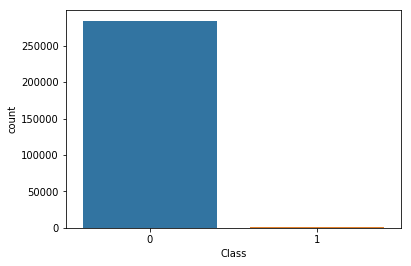

In [11]:
sns.countplot(data=credit, x = 'Class', label='Count')

NFraud, Fraud = len(credit[credit['Class']==0]), len(credit[credit['Class']==1])
print('Number of Fraud Txns: ', Fraud)
print('Number of non-Fraud Txns: ', NFraud)

In [12]:
print('Percentage of Fraudulent transactions:',Fraud/len(credit)*100,'%')
print('Percentage of non-fraudulent txns:', NFraud/len(credit)*100,'%')

Percentage of Fraudulent transactions: 0.1727485630620034 %
Percentage of non-fraudulent txns: 99.82725143693798 %


# 2) Imbalanced Data
Data is very much imbalanced with fraud txns constituting only .17%.

In [13]:
Fraud = credit[credit['Class']==1]
NFraud = credit[credit['Class']==0]

In [14]:
len(Fraud), len(NFraud)

(492, 284315)

In [15]:
Fraud.Amount.max(), Fraud.Amount.min(), NFraud.Amount.max(), NFraud.Amount.min()

(2125.87, 0.0, 25691.16, 0.0)

D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


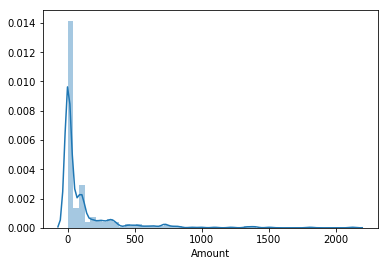

In [16]:
sns.distplot(Fraud.Amount)

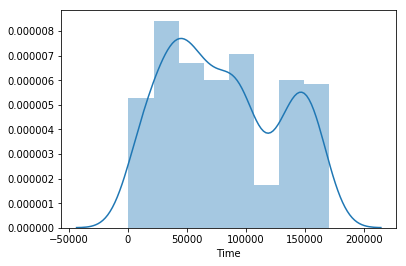

In [17]:
sns.distplot(Fraud.Time)

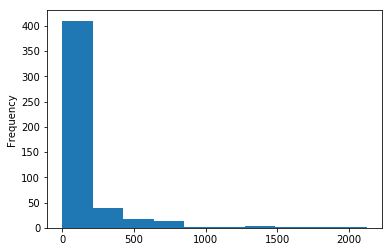

In [18]:
Fraud.Amount.plot.hist()

In [19]:
#Most of the fraud transaction amounts are < 2000. The frequenct amounts are in the range of 0-500

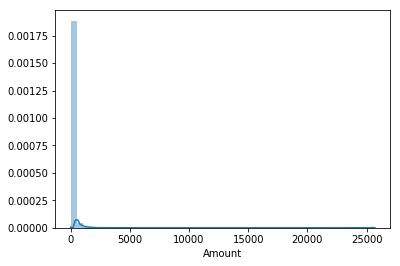

In [20]:
sns.distplot(NFraud.Amount)

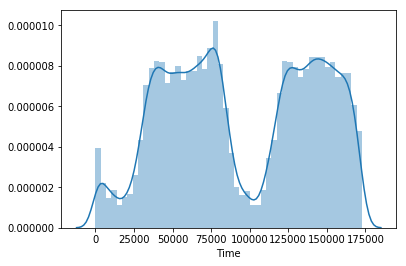

In [21]:
sns.distplot(NFraud.Time)

In [22]:
credit_corr = credit.corr()

In [23]:
credit_corr.Class[(abs(credit_corr.Class) >= 0.02) & (credit_corr.Class !=1)].sort_values()

V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
V3    -0.192961
V7    -0.187257
V18   -0.111485
V1    -0.101347
V9    -0.097733
V5    -0.094974
V6    -0.043643
V20    0.020090
V19    0.034783
V21    0.040413
V2     0.091289
V4     0.133447
V11    0.154876
Name: Class, dtype: float64

In [24]:
new_credit_corr = credit_corr[(abs(credit_corr.Class) >= 0.02) & (credit_corr.Class !=1)]

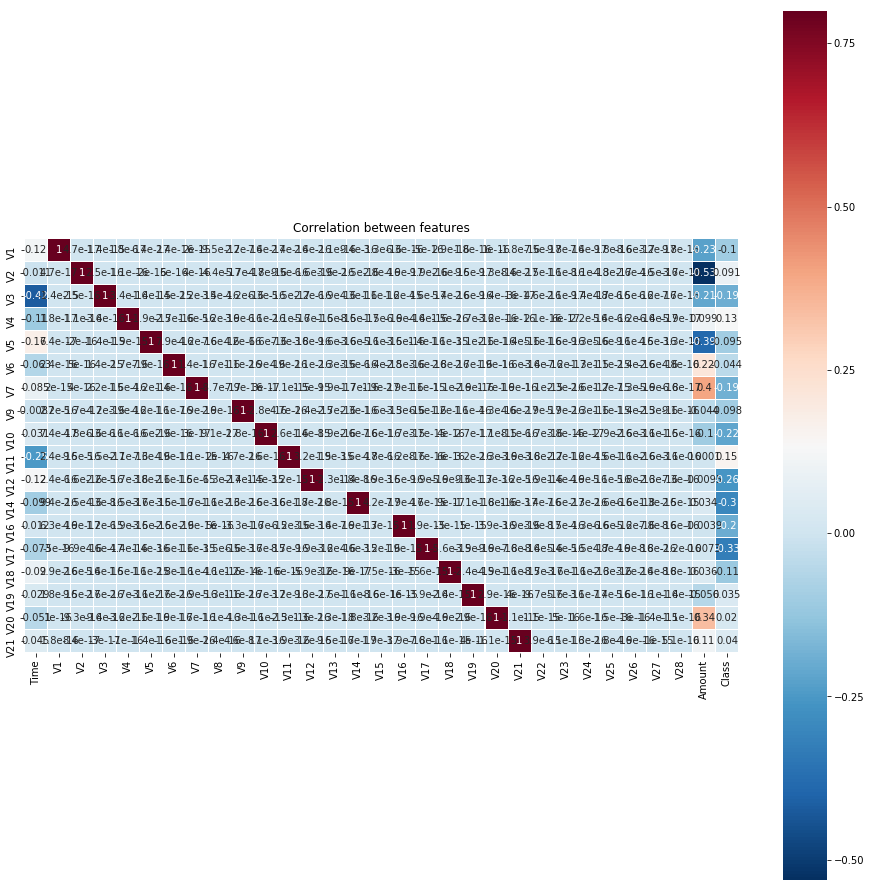

In [25]:
plt.figure(figsize=(16, 16))

sns.heatmap(new_credit_corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='RdBu_r',linecolor="white")
plt.title('Correlation between features');

# 3) PCA Components Graphs and outliers

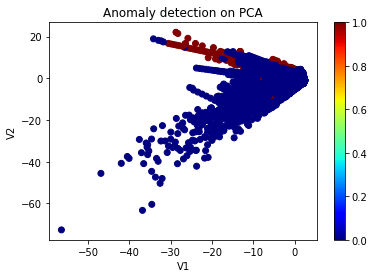

In [27]:
plt.scatter(credit.loc[:,'V1'], credit.loc[:,'V2'], c=credit.Class, cmap='jet')
plt.colorbar()

# title and label
plt.title('Anomaly detection on PCA')
plt.xlabel('V1')
plt.ylabel('V2')

plt.show()

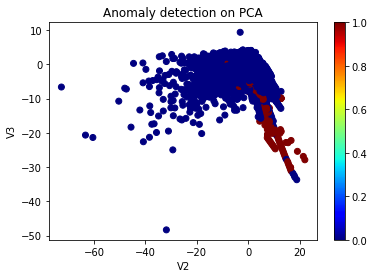

In [28]:
plt.scatter(credit.loc[:,'V2'], credit.loc[:,'V3'], c=credit.Class, cmap='jet')
plt.colorbar()

# title and label
plt.title('Anomaly detection on PCA')
plt.xlabel('V2')
plt.ylabel('V3')

plt.show()

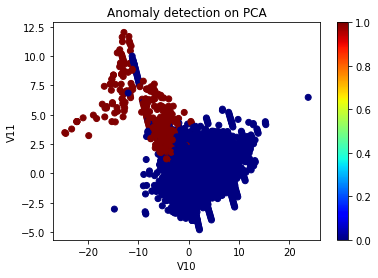

In [29]:
plt.scatter(credit.loc[:,'V10'], credit.loc[:,'V11'], c=credit.Class, cmap='jet')
plt.colorbar()

# title and label
plt.title('Anomaly detection on PCA')
plt.xlabel('V10')
plt.ylabel('V11')

plt.show()

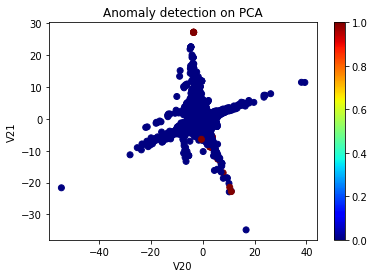

In [30]:
plt.scatter(credit.loc[:,'V20'], credit.loc[:,'V21'], c=credit.Class, cmap='jet')
plt.colorbar()

# title and label
plt.title('Anomaly detection on PCA')
plt.xlabel('V20')
plt.ylabel('V21')

plt.show()

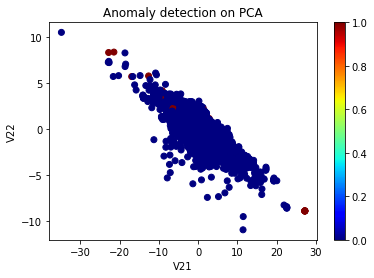

In [31]:
plt.scatter(credit.loc[:,'V21'], credit.loc[:,'V22'], c=credit.Class, cmap='jet')
plt.colorbar()

# title and label
plt.title('Anomaly detection on PCA')
plt.xlabel('V21')
plt.ylabel('V22')

plt.show()

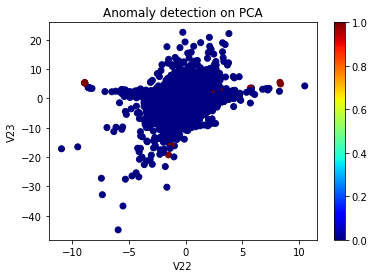

In [32]:
plt.scatter(credit.loc[:,'V22'], credit.loc[:,'V23'], c=credit.Class, cmap='jet')
plt.colorbar()

# title and label
plt.title('Anomaly detection on PCA')
plt.xlabel('V22')
plt.ylabel('V23')

plt.show()

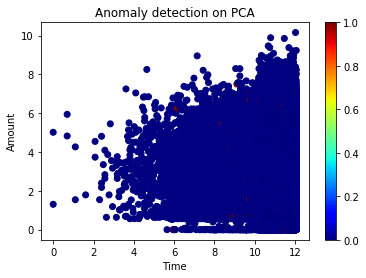

In [33]:
figsize = (12,10)
plt.scatter(np.log1p(credit.loc[:,'Time']), np.log1p(credit.loc[:,'Amount']), c=credit.Class, cmap='jet')
plt.colorbar()

# title and label
plt.title('Anomaly detection on PCA')
plt.xlabel('Time')
plt.ylabel('Amount')

plt.show()

# 4) Machine Learning Models

### Model, Predict & Solve
This problem is a Classification problem. We want to identify relationship between output (Fraud or non-Fraudulent) with 
other variables or features (PCA components). We are also perfoming supervised learning as we are training our model with a given dataset. 

With these two criteria - Supervised Learning plus Classification, we can narrow down our choice of models to a few. These include:


## 4.1) Standard Scaling
The result of standardization (or Z-score normalization) is that the features will be rescaled so that they’ll have the properties of a standard normal distribution with
μ=0 and σ=1
where μ is the mean (average) and σ is the standard deviation from the mean; standard scores (also called z scores) of the samples are calculated as follows:

z=(x−μ)/σ
Standardizing the features so that they are centered around 0 with a standard deviation of 1 is not only important if we are comparing measurements that have different units, but it is also a general requirement for many machine learning algorithms.
Reference: http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#standardization-and-min-max-scaling

In [26]:
from sklearn.preprocessing import StandardScaler

credit['scaledAmount'] = StandardScaler().fit_transform(credit['Amount'].values.reshape(-1, 1))
credit['scaledTime'] = StandardScaler().fit_transform(credit['Time'].values.reshape(-1, 1))

In [27]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaledAmount,scaledTime
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964,-1.996583
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475,-1.996583
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686,-1.996562
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534,-1.996562
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403,-1.996541


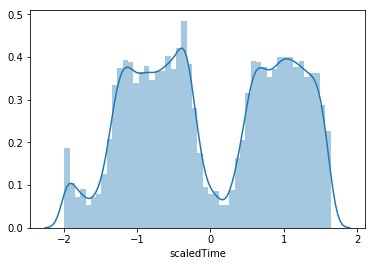

In [28]:
sns.distplot(credit.scaledTime)

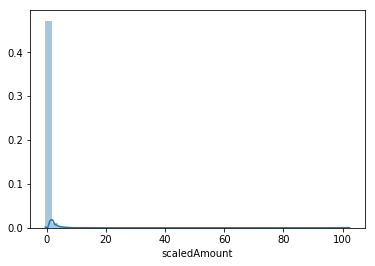

In [29]:
sns.distplot(credit.scaledAmount)

In [30]:
train_data = credit.drop(['Time', 'Amount'], axis=1)

In [31]:
X = train_data.drop('Class', axis=1)
y = train_data.Class

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11)
print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(190820, 30) (190820,) (93987, 30) (93987,)


In [33]:
len(y_train[y_train == 1]), len(y_train[y_train == 0]), len(y_train[y_train == 1])/len(y_train), len(y_train[y_train == 0])/len(y_train)

(315, 190505, 0.0016507703595011005, 0.9983492296404989)

## 4.2 Logistic Regression

The classes are highly imbalanced. Class of 0 indicates that the transaction was considered normal and a class of 1 indicates that the transaction was fraudulent.

Since fraud txns comprises of only .17% of the total transactions, we cannot consider accuracy as an appropriate measure for the model

Logistic Regression Training Score: 
 99.93
Logistic Regression Test Score: 
 99.92
Accuracy: 
 0.9991807377616053
Confusion Matrix: 
 [[93792    18]
 [   59   118]]
Classification Report: 
              precision    recall  f1-score   support

          0       1.00      1.00      1.00     93810
          1       0.87      0.67      0.75       177

avg / total       1.00      1.00      1.00     93987



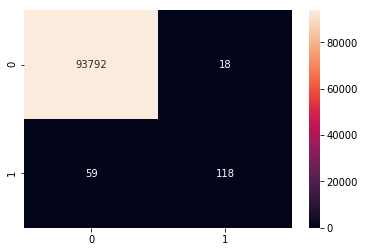

In [34]:
# Logistic Regression
# Create logistic regression object
logreg = LogisticRegression()
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)
log_predicted_prob = logreg.predict_proba(X_test)
logreg_score = round(logreg.score(X_train, y_train) * 100, 2)
logreg_score_test = round(logreg.score(X_test, y_test) * 100, 2)
#Equation coefficient and Intercept
print('Logistic Regression Training Score: \n', logreg_score)
print('Logistic Regression Test Score: \n', logreg_score_test)

print('Accuracy: \n', accuracy_score(y_test,log_predicted))
print('Confusion Matrix: \n', confusion_matrix(y_test,log_predicted))
print('Classification Report: \n', classification_report(y_test,log_predicted))

sns.heatmap(confusion_matrix(y_test,log_predicted),annot=True,fmt="d")

In [35]:
pd.crosstab(y_test, log_predicted,  rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,93792,18,93810
1,59,118,177
All,93851,136,93987


We have split the data into a training and a testing set at a ratio of 4:1, trained a Logistic Regression on the training set, and predicted the outcome on the testing set. The result of this prediction is depicted in the confusion matrix. We can see that almost all non-fraudulent transactions are also recognized as such. About 2/3 of all frauds are detected, but quite many are not recognized. The confusion matrix is a convenient way of illustrating the behavior of a classifier.

- The **Precision** denotes the probability that a transaction that is classified as fraud is truly a fraud.
- The **Recall** (aka. True Positive Rate) is the probability that a true fraud is recognized by the classifier.
- The **Fallout** (aka. False Positive Rate) is the probability that a non-fraud is wrongly classified as a fraud.

These numbers provide a more tangible characterization of a classifier. When tuning the parameters for a classifier, we need to ask ourselves what we expect of a "good" classifier.

- The Precision should be large (close to 1). A precision close to 0 means that a fraud alert will turn out as a mistake in the majority of the cases. This can be annoying for customers.
- The Recall should be close to 1. We want to detect frauds with a high probability. A recall of ~60% like for the classifier above is certainly not good enough - many frauds will go undetected. We definitly aim for something higher, 80% would be quite good! (Note that since frauds are often non-singular events on an account, it can be good enough to detect at least one out of two frauds - with a Recall of 80% this means that the probability that two consecutive frauds go undetected is as low as 4% already!)
- The Fallout should be very low. Customers would not want to receive a fraud alert every week. I speculate that a Fallout less than 0.1% would be adequate - for an average daily number of 3 transactions this would result in 1 wrong alert per year. Here we will actually aim for the even better fallout <3e-4.

In [36]:
def metrics_calc(actual, predicted, predicted_prob):
    # Compute confusion matrix
    from sklearn.metrics import auc
    cm = confusion_matrix(actual, predicted)
    TP = cm[1,1]
    TN = cm[0,0]
    FN = cm[1,0]
    FP = cm[0,1]
    accuracy = (TP+TN)/(TP+FP+TN+FN)
    miscalc_rate = (FP+FN)/(TP+FP+TN+FN)
    tpr = TP/(TP+FN)
    fpr = FP/(FP+TN)
    ppv = TP/(TP+FP)
    prevalence = TP/(TP+FP+TN+FN)  
    null_accuracy = max(predicted.mean(), 1 - predicted.mean())
    f1_score = 2 * (ppv*tpr)/(ppv+tpr)               


    # calculate precision-recall curve
    precision, recall, thresholds = precision_recall_curve(actual, predicted_prob[:,1])
    # calculate precision-recall AUC
    area_under_curve = auc(recall, precision)
    # calculate average precision score
    av_pr_score = average_precision_score(actual, predicted)
    #print('-------------------------------------')
    #print('Recall (TPR) = ', tpr)
    #print('Fallout (FPR) = ', fpr)
    #print('Precision (PPV) = ', ppv)
    #print('F1 Score = ', f1_score)
    #print('Area Under Curve = ', area_under_curve)
    #print('Average Precision Score', av_pr_score)    
    #print('-------------------------------------')
    #print('Accuracy = ', accuracy)
    #print('null_accuracy = ', null_accuracy)
    #print('miscalc_rate = ',miscalc_rate)    

    
    return FN, FP, fpr, tpr, ppv, f1_score, area_under_curve

In [37]:
log_fn, log_fp, log_fpr, log_tpr, log_ppv, log_f1, log_auc = metrics_calc(y_test, log_predicted, log_predicted_prob)

In [38]:
print('False Positive (incorrectly predicted as fraud) =     ',log_fp)
print('False Negative (incorrectly predicted as normal) =     ',log_fn)
print('Precision =     {:.3f}'.format(log_ppv))
print('Recall (TPR) =  {:.3f}'.format(log_tpr))
print('Fallout (FPR) = {:.3e}'.format(log_fpr))
print('F1 = {:.3e}'.format(log_f1))
print('AUC = {:.3e}'.format(log_auc))

False Positive (incorrectly predicted as fraud) =      18
False Negative (incorrectly predicted as normal) =      59
Precision =     0.868
Recall (TPR) =  0.667
Fallout (FPR) = 1.919e-04
F1 = 7.540e-01
AUC = 7.388e-01


f1=0.754 auc=0.739 ap=0.579


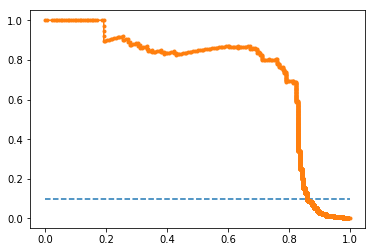

In [39]:
from sklearn.metrics import auc
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, log_predicted_prob[:,1])
# calculate F1 score
f1 = f1_score(y_test, log_predicted)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y_test, log_predicted)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.1, 0.1], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.')
# show the plot
plt.show()

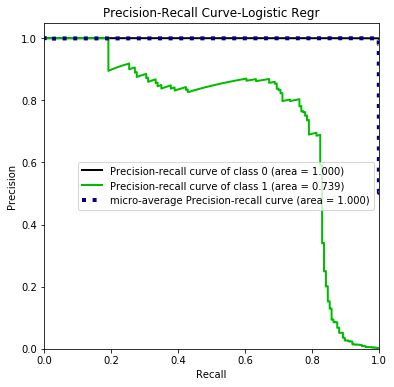

In [40]:
import scikitplot as skplt
skplt.metrics.plot_precision_recall(y_test, log_predicted_prob, title='Precision-Recall Curve-Logistic Regr', figsize=(6,6))
print()

## 4.3) Gaussian Naive Bayes

<img src="Gaussian_Naive_Bayes_Classifier_print.png", width=400, align='left'> 

Gaussian Score: 
 97.78
Gaussian Test Score: 
 97.81
[[91783  2027]
 [   33   144]]
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     93810
          1       0.07      0.81      0.12       177

avg / total       1.00      0.98      0.99     93987



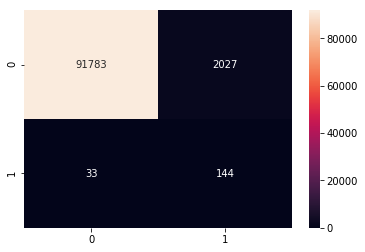

In [41]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
#Predict Output
gauss_predicted = gaussian.predict(X_test)
gauss_predicted_prob = gaussian.predict_proba(X_test)
gauss_score = round(gaussian.score(X_train, y_train) * 100, 2)
gauss_score_test = round(gaussian.score(X_test, y_test) * 100, 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))

sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")


In [42]:
gauss_fn, gauss_fp, gauss_fpr, gauss_tpr, gauss_ppv, gauss_f1, gauss_auc = metrics_calc(y_test, gauss_predicted, gauss_predicted_prob)

In [43]:
print('False Positive (incorrectly predicted as fraud) =     {:.3f}'.format(gauss_fp))
print('False Negative (incorrectly predicted as normal) =     {:.3f}'.format(gauss_fn))
print('Precision =     {:.3f}'.format(gauss_ppv))
print('Recall (TPR) =  {:.3f}'.format(gauss_tpr))
print('Fallout (FPR) = {:.3e}'.format(gauss_fpr))
print('F1 = {:.3e}'.format(gauss_f1))
print('AUC = {:.3e}'.format(gauss_auc))

False Positive (incorrectly predicted as fraud) =     2027.000
False Negative (incorrectly predicted as normal) =     33.000
Precision =     0.066
Recall (TPR) =  0.814
Fallout (FPR) = 2.161e-02
F1 = 1.227e-01
AUC = 4.204e-01


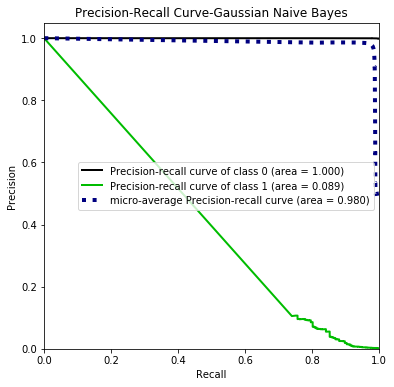

In [44]:
import scikitplot as skplt
skplt.metrics.plot_precision_recall(y_test, gauss_predicted_prob, title='Precision-Recall Curve-Gaussian Naive Bayes', figsize=(6,6))
print()

## 4.4) Decision Tree

[[93765    45]
 [   43   134]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     93810
          1       0.75      0.76      0.75       177

avg / total       1.00      1.00      1.00     93987



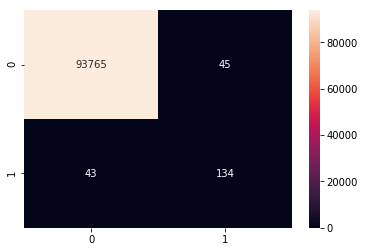

In [45]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
#Predict Output
dtree_predicted = decision_tree.predict(X_test)
dtree_predicted_prob = decision_tree.predict_proba(X_test)
decision_tree_score = round(decision_tree.score(X_train, y_train)* 100, 2)
decision_tree_score_test = round(decision_tree.score(X_test, y_test)* 100, 2)
print(confusion_matrix(y_test,dtree_predicted))
print(classification_report(y_test,dtree_predicted))
sns.heatmap(confusion_matrix(y_test,dtree_predicted),annot=True,fmt="d")


In [46]:
dtree_fn, dtree_fp, dtree_fpr, dtree_tpr, dtree_ppv, dtree_f1, dtree_auc = metrics_calc(y_test, dtree_predicted, dtree_predicted_prob)

print('False Positive (incorrectly predicted as fraud) =     ',dtree_fp)
print('False Negative (incorrectly predicted as normal) =    ',dtree_fn)
print('Precision =     {:.3f}'.format(dtree_ppv))
print('Recall (TPR) =  {:.3f}'.format(dtree_tpr))
print('Fallout (FPR) = {:.3e}'.format(dtree_fpr))
print('F1 = {:.3e}'.format(dtree_f1))
print('AUC = {:.3e}'.format(dtree_auc))

False Positive (incorrectly predicted as fraud) =      45
False Negative (incorrectly predicted as normal) =     43
Precision =     0.749
Recall (TPR) =  0.757
Fallout (FPR) = 4.797e-04
F1 = 7.528e-01
AUC = 7.531e-01


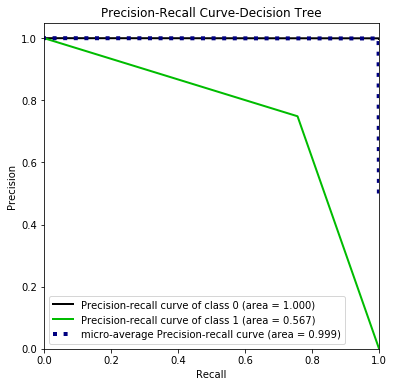

In [47]:
import scikitplot as skplt
skplt.metrics.plot_precision_recall(y_test, dtree_predicted_prob, title='Precision-Recall Curve-Decision Tree', figsize=(6,6))
print()

## 4.5) Random Forest

Accuracy: 
 0.9994999308414994
[[93803     7]
 [   40   137]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     93810
          1       0.95      0.77      0.85       177

avg / total       1.00      1.00      1.00     93987



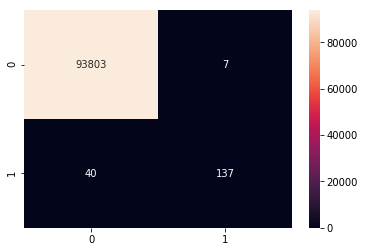

In [48]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)
rf_predicted_prob = random_forest.predict_proba(X_test)

print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")


In [49]:
rf_fn, rf_fp, rf_fpr, rf_tpr, rf_ppv, rf_f1, rf_auc = metrics_calc(y_test, rf_predicted, rf_predicted_prob)

print('False Positive (incorrectly predicted as fraud) =     {:.3f}'.format(rf_fp))
print('False Negative (incorrectly predicted as normal) =     {:.3f}'.format(rf_fn))
print('Precision =     {:.3f}'.format(rf_ppv))
print('Recall (TPR) =  {:.3f}'.format(rf_tpr))
print('Fallout (FPR) = {:.3e}'.format(rf_fpr))
print('F1 = {:.3e}'.format(rf_f1))
print('AUC = {:.3e}'.format(rf_auc))

False Positive (incorrectly predicted as fraud) =     7.000
False Negative (incorrectly predicted as normal) =     40.000
Precision =     0.951
Recall (TPR) =  0.774
Fallout (FPR) = 7.462e-05
F1 = 8.536e-01
AUC = 8.351e-01


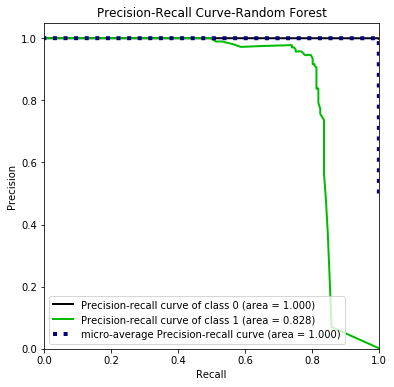

In [50]:
import scikitplot as skplt
skplt.metrics.plot_precision_recall(y_test, rf_predicted_prob, title='Precision-Recall Curve-Random Forest', figsize=(6,6))
print()

## 4.6) Neural Networks

Accuracy: 
 0.9993296945322225
[[93789    21]
 [   42   135]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     93810
          1       0.87      0.76      0.81       177

avg / total       1.00      1.00      1.00     93987



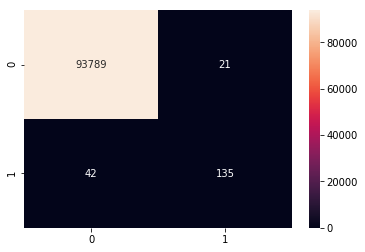

In [51]:
# Neural Networks

neural = MLPClassifier(hidden_layer_sizes=30,
                     activation='relu',
                     solver='adam',
                     alpha=0.001,
                     batch_size='auto',
                     max_iter=200,
                     random_state=1337,
                     tol=0.0001,
                     early_stopping=False,
                     validation_fraction=0.1,
                     beta_1=0.9,
                     beta_2=0.999,
                     epsilon=1e-08,
                     learning_rate='constant',
                     power_t=0.5,
                     momentum=0.8,
                     nesterovs_momentum=True,
                     shuffle=True,
                     learning_rate_init=0.001)
neural.fit(X_train, y_train)
#Predict Output
nn_predicted = neural.predict(X_test)
nn_predicted_prob = neural.predict_proba(X_test)
print('Accuracy: \n', accuracy_score(y_test, nn_predicted))
print(confusion_matrix(y_test,nn_predicted))
print(classification_report(y_test,nn_predicted))

sns.heatmap(confusion_matrix(y_test,nn_predicted),annot=True,fmt="d")

In [52]:
nn_fn, nn_fp, nn_fpr, nn_tpr, nn_ppv, nn_f1, nn_auc = metrics_calc(y_test, nn_predicted, nn_predicted_prob)

print('False Positive (incorrectly predicted as fraud) =     ',nn_fp)
print('False Negative (incorrectly predicted as normal) =     ',nn_fn)
print('Precision =     {:.3f}'.format(nn_ppv))
print('Recall (TPR) =  {:.3f}'.format(nn_tpr))
print('Fallout (FPR) = {:.3e}'.format(nn_fpr))
print('F1 = {:.3e}'.format(nn_f1))
print('AUC = {:.3e}'.format(nn_auc))

False Positive (incorrectly predicted as fraud) =      21
False Negative (incorrectly predicted as normal) =      42
Precision =     0.865
Recall (TPR) =  0.763
Fallout (FPR) = 2.239e-04
F1 = 8.108e-01
AUC = 8.146e-01


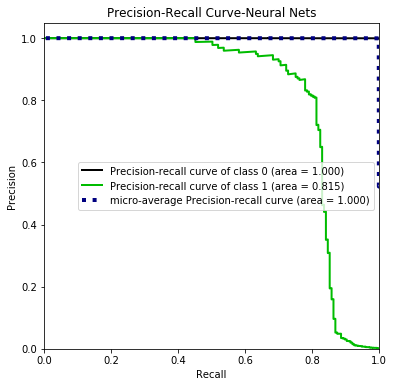

In [53]:
import scikitplot as skplt
skplt.metrics.plot_precision_recall(y_test, nn_predicted_prob, title='Precision-Recall Curve-Neural Nets', figsize=(6,6))
print()

## 4.7) XGBoost
No Normalization of data is required...

## Grid Search - F1 scoring

In [54]:
len(y_train[y_train == 1]), len(y_train[y_train == 0]), len(y_train[y_train == 1])/len(y_train), len(y_train[y_train == 0])/len(y_train)

(315, 190505, 0.0016507703595011005, 0.9983492296404989)

In [55]:
cv_params = {'max_depth': [1,2,3,4,5,6], 'min_child_weight': [1,2,3,4]}    # parameters to be tried in the grid search
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic'}   #other parameters, fixed for the moment 
xgb_clf = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5)

In [56]:
xgb_clf.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6], 'min_child_weight': [1, 2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [57]:
xgb_clf.best_params_

{'max_depth': 4, 'min_child_weight': 2}

In [58]:
xgb_clf.grid_scores_

[mean: 0.82008, std: 0.00827, params: {'max_depth': 1, 'min_child_weight': 1},
 mean: 0.81710, std: 0.00944, params: {'max_depth': 1, 'min_child_weight': 2},
 mean: 0.81877, std: 0.00821, params: {'max_depth': 1, 'min_child_weight': 3},
 mean: 0.80970, std: 0.01497, params: {'max_depth': 1, 'min_child_weight': 4},
 mean: 0.85134, std: 0.01505, params: {'max_depth': 2, 'min_child_weight': 1},
 mean: 0.84727, std: 0.01501, params: {'max_depth': 2, 'min_child_weight': 2},
 mean: 0.85148, std: 0.01721, params: {'max_depth': 2, 'min_child_weight': 3},
 mean: 0.85247, std: 0.02676, params: {'max_depth': 2, 'min_child_weight': 4},
 mean: 0.85125, std: 0.01126, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.85955, std: 0.00858, params: {'max_depth': 3, 'min_child_weight': 2},
 mean: 0.86695, std: 0.00891, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.85295, std: 0.01925, params: {'max_depth': 3, 'min_child_weight': 4},
 mean: 0.85631, std: 0.01213, params: {'max_depth': 

In [59]:
cv_params = {'subsample': [0.8,0.9,1], 'max_delta_step': [0,1,2,4,8]}
fix_params = {'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 4, 'min_child_weight':2}
xgb_clf = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5) 
xgb_clf.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=4, min_child_weight=2, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'subsample': [0.8, 0.9, 1], 'max_delta_step': [0, 1, 2, 4, 8]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [60]:
xgb_clf.best_params_

{'max_delta_step': 0, 'subsample': 1}

In [61]:
xgb_clf.grid_scores_

[mean: 0.85553, std: 0.00923, params: {'max_delta_step': 0, 'subsample': 0.8},
 mean: 0.85035, std: 0.00901, params: {'max_delta_step': 0, 'subsample': 0.9},
 mean: 0.86702, std: 0.01295, params: {'max_delta_step': 0, 'subsample': 1},
 mean: 0.85553, std: 0.00923, params: {'max_delta_step': 1, 'subsample': 0.8},
 mean: 0.85035, std: 0.00901, params: {'max_delta_step': 1, 'subsample': 0.9},
 mean: 0.86702, std: 0.01295, params: {'max_delta_step': 1, 'subsample': 1},
 mean: 0.85553, std: 0.00923, params: {'max_delta_step': 2, 'subsample': 0.8},
 mean: 0.85035, std: 0.00901, params: {'max_delta_step': 2, 'subsample': 0.9},
 mean: 0.86702, std: 0.01295, params: {'max_delta_step': 2, 'subsample': 1},
 mean: 0.85553, std: 0.00923, params: {'max_delta_step': 4, 'subsample': 0.8},
 mean: 0.85035, std: 0.00901, params: {'max_delta_step': 4, 'subsample': 0.9},
 mean: 0.86702, std: 0.01295, params: {'max_delta_step': 4, 'subsample': 1},
 mean: 0.85553, std: 0.00923, params: {'max_delta_step': 8, 

In [62]:
cv_params = {'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]}
fix_params['max_delta_step'] = 0
fix_params['subsample'] = 1
xgb_clf = GridSearchCV(xgb.XGBClassifier(**fix_params), cv_params, scoring = 'f1', cv = 5) 
xgb_clf.fit(X_train, y_train)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `arra

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=4, min_child_weight=2, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=0)

In [63]:
xgb_clf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=4, min_child_weight=2, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [64]:
xgb_clf.best_params_

{'learning_rate': 0.2}

In [65]:
xgb_clf.grid_scores_

[mean: 0.84353, std: 0.02349, params: {'learning_rate': 0.05},
 mean: 0.85434, std: 0.01713, params: {'learning_rate': 0.1},
 mean: 0.86019, std: 0.00960, params: {'learning_rate': 0.15},
 mean: 0.86702, std: 0.01295, params: {'learning_rate': 0.2},
 mean: 0.84857, std: 0.00669, params: {'learning_rate': 0.25},
 mean: 0.86163, std: 0.01508, params: {'learning_rate': 0.3},
 mean: 0.86085, std: 0.01426, params: {'learning_rate': 0.35}]

In [66]:
fix_params['learning_rate'] = 0.2
params_final =  fix_params
print(params_final)

{'learning_rate': 0.2, 'n_estimators': 100, 'objective': 'binary:logistic', 'max_depth': 4, 'min_child_weight': 2, 'max_delta_step': 0, 'subsample': 1}


In [67]:
xgb_final_clf = xgb.XGBClassifier(**params_final)

In [68]:
xgb_final_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=4, min_child_weight=2, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [69]:
xgb_predicted = xgb_final_clf.predict(X_test)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [70]:
xgb_predicted_prob = xgb_final_clf.predict_proba(X_test)

In [71]:
len(xgb_predicted[xgb_predicted==1]), len(xgb_predicted[xgb_predicted==0])

(145, 93842)

Accuracy: 
 0.9995531296881484
[[93805     5]
 [   37   140]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00     93810
          1       0.97      0.79      0.87       177

avg / total       1.00      1.00      1.00     93987



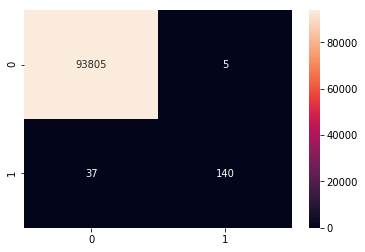

In [72]:
print('Accuracy: \n', accuracy_score(y_test, xgb_predicted))
print(confusion_matrix(y_test,xgb_predicted))
print(classification_report(y_test,xgb_predicted))

sns.heatmap(confusion_matrix(y_test,xgb_predicted),annot=True,fmt="d")

In [73]:
xgb_fn, xgb_fp, xgb_fpr, xgb_tpr, xgb_ppv, xgb_f1, xgb_auc = metrics_calc(y_test, xgb_predicted, xgb_predicted_prob)

print('False Positive (incorrectly predicted as fraud) =     ',xgb_fp)
print('False Negative (incorrectly predicted as normal) =     ',xgb_fn)
print('Precision =     {:.3f}'.format(xgb_ppv))
print('Recall (TPR) =  {:.3f}'.format(xgb_tpr))
print('Fallout (FPR) = {:.3e}'.format(xgb_fpr))
print('F1 = {:.3e}'.format(xgb_f1))
print('AUC = {:.3e}'.format(xgb_auc))

False Positive (incorrectly predicted as fraud) =      5
False Negative (incorrectly predicted as normal) =      37
Precision =     0.966
Recall (TPR) =  0.791
Fallout (FPR) = 5.330e-05
F1 = 8.696e-01
AUC = 8.413e-01


# Classification Metrics

Reference: http://pages.cs.wisc.edu/~jdavis/davisgoadrichcamera2.pdf
When evaluating binary decision problems, it is recommended to use Receiver Operator Characteristic (ROC) curves, which show how the number of correctly classified positive examples varies with the number of incorrectly classified negative examples. However, ROC curves can present an overly optimistic view of an algorithm’s performance if there is a large skew in the class distribution. Drummond and Holte (2000;2004) have recommended using cost curves to addressthis issue. Cost curves are an excellent alternative to ROC curves.

Precision-Recall (PR) curves, often used in Information Retrieval (Manning & Schutze, 1999; Raghavan et al., 1989), have been cited as an alternative to ROC curves for tasks with a large skew in the class distribution (Bockhorst & Craven, 2005; Bunescu et al., 2004; Davis et al., 2005; Goadrich et al., 2004; Kok & Domingos, 2005; Singla & Domingos, 2005). An important difference between ROC space and PR space is the visual representation of the curves. Looking at PR curves can expose differences between algorithms that are not apparent in ROC space. 

In a binary decision problem, a classifier labels examples as either positive or negative. The decision made by the classifier can be represented in a structure known as a confusion matrix or contingency table. The confusion matrix has four categories: True positives (TP) are examples correctly labeled as positives. False positives (FP) refer to negative examples incorrectly labeled as positive. True negatives (TN) correspond to negatives correctly labeled as negative. Finally, false negatives (FN) refer to positive examples incorrectly labeled as negative.

The confusion matrix can be used to construct a point in either ROC space or PR space. Given the confusion matrix, we are able to define the metrics used in each space as in Figure 2(b). In ROC space, one plots the False Positive Rate (FPR) on the x-axis and the True Positive Rate (TPR) on the y-axis. The FPR measures the fraction of negative examples that are misclassified as positive. The TPR measures the fraction of positive examples that are correctly labeled. In PR space, one plots Recall on the x-axis and Precision on the y-axis. Recall is the same as TPR, whereas Precision measures that fraction of examples classified as
positive that are truly positive. Figure 2(b) gives the definitions for each metric. We will treat the metrics as functions that act on the underlying confusion matrix which defines a point in either ROC space or PR space. Thus, given a confusion matrix A, RECALL(A) returns the Recall associated with A.

https://scikit-learn.org/stable/modules/model_evaluation.html


- Accuracy: How often the classifier is correct = (T P + T N) / (T P + F P + T N + F N)  
- Misclassification Rate: How often the classifier is incorrect = (F P + F N) / (T P + F P + T N + F N)  
- True Positive Rate/Recall/Sensitivity : When it's actually yes, how often does it predict yes?  T P / (T P + F N)  
- Precision or positive predictive value (PPV): When it predicts yes, how often is it correct?  T P / (T P + F P)  
- Fallout/False Positive Rate: When it's actually no, how often does it predict yes? F P / (F P + T N)  
- Prevalence: How often does the yes condition actually occur in our sample? T P / (T P + F P + T N + F N)  
- Null Error Rate: This is how often you would be wrong if you always predicted the majority class. 
- Cohen's Kappa: This is essentially a measure of how well the classifier performed as compared to how well it would have performed simply by chance.
- F Score: This is a weighted average of the true positive rate (recall) and precision 2 * Precision * Recall / (Precision + Recall)

<b> Accuracy Paradox </b> https://en.wikipedia.org/wiki/Accuracy_paradox 

The accuracy paradox for predictive analytics states that predictive models with a given level of accuracy may have greater predictive power than models with higher accuracy. It may be better to avoid the accuracy metric in favor of other metrics such as precision and recall.

<b> Receiver Operating Characteristic </b> https://en.wikipedia.org/wiki/Receiver_operating_characteristic

A receiver operating characteristic curve, i.e., ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

# Precision Recall Curve
https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

The Precision-Recall Plot Is More Informative than the ROC Plot When Evaluating Binary Classifiers on Imbalanced Datasets, 2015. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4349800/



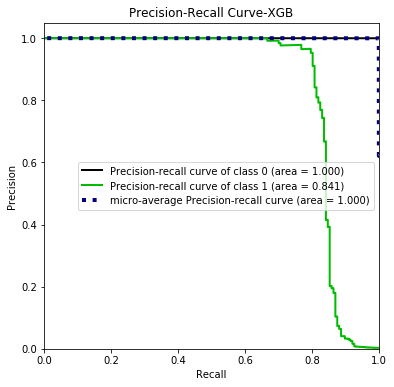

In [74]:
import scikitplot as skplt
skplt.metrics.plot_precision_recall(y_test, xgb_predicted_prob, title='Precision-Recall Curve-XGB', figsize=(6,6))
print()

# 5) LGBM Classifier

In [75]:
len(y_train[y_train == 1]), len(y_train[y_train == 0]), len(y_train[y_train == 1])/len(y_train), len(y_train[y_train == 0])/len(y_train)

(315, 190505, 0.0016507703595011005, 0.9983492296404989)

In [76]:
len(y_test[y_test == 1]), len(y_test[y_test == 0]), len(y_test[y_test == 1])/len(y_test), len(y_test[y_test == 0])/len(y_test)

(177, 93810, 0.0018832391713747645, 0.9981167608286252)

In [77]:
from sklearn import ensemble

# Importing modules
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix, mean_squared_error

# Imputing missing values and scaling values
from sklearn.preprocessing import Imputer, MinMaxScaler

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GroupKFold
# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import lightgbm as lgb

In [78]:
lgbmodel = lgb.LGBMClassifier(
    num_leaves=31,
    learning_rate=0.03,
    n_estimators=1000,
    subsample=.9,
    colsample_bytree=.9,
    random_state=42
)
lgbmodel.fit(
    X_train, y_train, 
    verbose=100
)

lgb_pred = lgbmodel.predict(X_test)
lgb_pred_proba = lgbmodel.predict_proba(X_test)


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [79]:
lgb_fn, lgb_fp, lgb_fpr, lgb_tpr, lgb_ppv, lgb_f1, lgb_auc = metrics_calc(y_test, lgb_pred, lgb_pred_proba)

print('False Positive (incorrectly predicted as fraud) =     ',lgb_fp)
print('False Negative (incorrectly predicted as normal) =     ',lgb_fn)
print('Precision =     {:.3f}'.format(lgb_ppv))
print('Recall (TPR) =  {:.3f}'.format(lgb_tpr))
print('Fallout (FPR) = {:.3e}'.format(lgb_fpr))
print('F1 = {:.3e}'.format(lgb_f1))
print('AUC = {:.3e}'.format(lgb_auc))

False Positive (incorrectly predicted as fraud) =      2
False Negative (incorrectly predicted as normal) =      36
Precision =     0.986
Recall (TPR) =  0.797
Fallout (FPR) = 2.132e-05
F1 = 8.813e-01
AUC = 8.479e-01


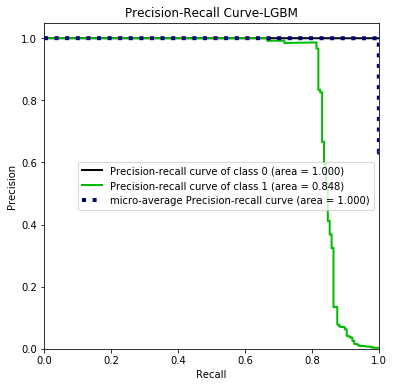

In [80]:
import scikitplot as skplt
skplt.metrics.plot_precision_recall(y_test, lgb_pred_proba, title='Precision-Recall Curve-LGBM', figsize=(6,6))
print()

### Observation

There were total of 93987 transactions in test dataset. This included 93810 non fraud and 177 fraud.
- True Positive(TP) : Out of 93810 normal txns, 93808 were correctly predicted as NORMAL
- False Negative (FN) : Out of 93810 normal txns, 2 were incorrectly predicted as FRAUD. 
- False Positive (FP) : Out of 177 fraudulent txns, 36 were incorrectly predicted as NORMAL
- True Negative (TN) : Out of 177 fraudulent txns, 141 were correctly predicted as FRAUD. 

# 6) LightGBM classifier hyperparameter optimization via scikit-learn's GridSearchCV

In [81]:
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 20, num_leaves = 38)


param_grid = {
    'n_estimators': [x for x in range(20, 36, 2)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 5)

[1]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.598347
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.90157	valid_0's binary_logloss: 0.520717
[3]	valid_0's auc: 0.913088	valid_0's binary_logloss: 0.455959
[4]	valid_0's auc: 0.913273	valid_0's binary_logloss: 0.401218
[5]	valid_0's auc: 0.912989	valid_0's binary_logloss: 0.354463
[6]	valid_0's auc: 0.918334	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.91858	valid_0's binary_logloss: 0.279292
[8]	valid_0's auc: 0.918572	valid_0's binary_logloss: 0.248851
[9]	valid_0's auc: 0.918597	valid_0's binary_logloss: 0.222182
[10]	valid_0's auc: 0.918422	valid_0's binary_logloss: 0.198704
[11]	valid_0's auc: 0.918434	valid_0's binary_logloss: 0.17799
[12]	valid_0's auc: 0.918407	valid_0's binary_logloss: 0.15965
[13]	valid_0's auc: 0.918344	valid_0's binary_logloss: 0.143385
[14]	valid_0's auc: 0.918327	valid_0's binary_logloss: 0.128914
Early stopping, best iteration is:
[9]	valid_0's auc: 0.

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.598348
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.883076	valid_0's binary_logloss: 0.520717
[3]	valid_0's auc: 0.900974	valid_0's binary_logloss: 0.455972
[4]	valid_0's auc: 0.900796	valid_0's binary_logloss: 0.401265
[5]	valid_0's auc: 0.906183	valid_0's binary_logloss: 0.354529
[6]	valid_0's auc: 0.91174	valid_0's binary_logloss: 0.314264
[7]	valid_0's auc: 0.910866	valid_0's binary_logloss: 0.279353
[8]	valid_0's auc: 0.911002	valid_0's binary_logloss: 0.248896
[9]	valid_0's auc: 0.911893	valid_0's binary_logloss: 0.222213
[10]	valid_0's auc: 0.91187	valid_0's binary_logloss: 0.198742
[11]	valid_0's auc: 0.911825	valid_0's binary_logloss: 0.178004
[12]	valid_0's auc: 0.911762	valid_0's binary_logloss: 0.159673
[13]	valid_0's auc: 0.917237	valid_0's binary_logloss: 0.143396
[14]	valid_0's auc: 0.917207	valid_0's binary_logloss: 0.128917
[15]	valid_0's auc: 0.917236	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.598356
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.890976	valid_0's binary_logloss: 0.520722
[3]	valid_0's auc: 0.900014	valid_0's binary_logloss: 0.455982
[4]	valid_0's auc: 0.89981	valid_0's binary_logloss: 0.401256
[5]	valid_0's auc: 0.910195	valid_0's binary_logloss: 0.354514
[6]	valid_0's auc: 0.914087	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.913826	valid_0's binary_logloss: 0.279304
[8]	valid_0's auc: 0.905266	valid_0's binary_logloss: 0.248826
[9]	valid_0's auc: 0.913704	valid_0's binary_logloss: 0.222129
[10]	valid_0's auc: 0.909438	valid_0's binary_logloss: 0.198649
[11]	valid_0's auc: 0.905128	valid_0's binary_logloss: 0.177937
Early stopping, best iteration is:
[6]	valid_0's auc: 0.914087	valid_0's binary_logloss: 0.314217


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.598347
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.90157	valid_0's binary_logloss: 0.520717
[3]	valid_0's auc: 0.913088	valid_0's binary_logloss: 0.455959
[4]	valid_0's auc: 0.913273	valid_0's binary_logloss: 0.401218
[5]	valid_0's auc: 0.912989	valid_0's binary_logloss: 0.354463
[6]	valid_0's auc: 0.918334	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.91858	valid_0's binary_logloss: 0.279292
[8]	valid_0's auc: 0.918572	valid_0's binary_logloss: 0.248851
[9]	valid_0's auc: 0.918597	valid_0's binary_logloss: 0.222182
[10]	valid_0's auc: 0.918422	valid_0's binary_logloss: 0.198704
[11]	valid_0's auc: 0.918434	valid_0's binary_logloss: 0.17799
[12]	valid_0's auc: 0.918407	valid_0's binary_logloss: 0.15965
[13]	valid_0's auc: 0.918344	valid_0's binary_logloss: 0.143385
[14]	valid_0's auc: 0.918327	valid_0's binary_logloss: 0.128914
Early stopping, best iteration is:
[9]	valid_0's auc: 0.

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.598348
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.883076	valid_0's binary_logloss: 0.520717
[3]	valid_0's auc: 0.900974	valid_0's binary_logloss: 0.455972
[4]	valid_0's auc: 0.900796	valid_0's binary_logloss: 0.401265
[5]	valid_0's auc: 0.906183	valid_0's binary_logloss: 0.354529
[6]	valid_0's auc: 0.91174	valid_0's binary_logloss: 0.314264
[7]	valid_0's auc: 0.910866	valid_0's binary_logloss: 0.279353
[8]	valid_0's auc: 0.911002	valid_0's binary_logloss: 0.248896
[9]	valid_0's auc: 0.911893	valid_0's binary_logloss: 0.222213
[10]	valid_0's auc: 0.91187	valid_0's binary_logloss: 0.198742
[11]	valid_0's auc: 0.911825	valid_0's binary_logloss: 0.178004
[12]	valid_0's auc: 0.911762	valid_0's binary_logloss: 0.159673
[13]	valid_0's auc: 0.917237	valid_0's binary_logloss: 0.143396
[14]	valid_0's auc: 0.917207	valid_0's binary_logloss: 0.128917
[15]	valid_0's auc: 0.917236	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.598356
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.890976	valid_0's binary_logloss: 0.520722
[3]	valid_0's auc: 0.900014	valid_0's binary_logloss: 0.455982
[4]	valid_0's auc: 0.89981	valid_0's binary_logloss: 0.401256
[5]	valid_0's auc: 0.910195	valid_0's binary_logloss: 0.354514
[6]	valid_0's auc: 0.914087	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.913826	valid_0's binary_logloss: 0.279304
[8]	valid_0's auc: 0.905266	valid_0's binary_logloss: 0.248826
[9]	valid_0's auc: 0.913704	valid_0's binary_logloss: 0.222129
[10]	valid_0's auc: 0.909438	valid_0's binary_logloss: 0.198649
[11]	valid_0's auc: 0.905128	valid_0's binary_logloss: 0.177937
Early stopping, best iteration is:
[6]	valid_0's auc: 0.914087	valid_0's binary_logloss: 0.314217


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.598347
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.90157	valid_0's binary_logloss: 0.520717
[3]	valid_0's auc: 0.913088	valid_0's binary_logloss: 0.455959
[4]	valid_0's auc: 0.913273	valid_0's binary_logloss: 0.401218
[5]	valid_0's auc: 0.912989	valid_0's binary_logloss: 0.354463
[6]	valid_0's auc: 0.918334	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.91858	valid_0's binary_logloss: 0.279292
[8]	valid_0's auc: 0.918572	valid_0's binary_logloss: 0.248851
[9]	valid_0's auc: 0.918597	valid_0's binary_logloss: 0.222182
[10]	valid_0's auc: 0.918422	valid_0's binary_logloss: 0.198704
[11]	valid_0's auc: 0.918434	valid_0's binary_logloss: 0.17799
[12]	valid_0's auc: 0.918407	valid_0's binary_logloss: 0.15965
[13]	valid_0's auc: 0.918344	valid_0's binary_logloss: 0.143385
[14]	valid_0's auc: 0.918327	valid_0's binary_logloss: 0.128914
Early stopping, best iteration is:
[9]	valid_0's auc: 0.

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.598348
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.883076	valid_0's binary_logloss: 0.520717
[3]	valid_0's auc: 0.900974	valid_0's binary_logloss: 0.455972
[4]	valid_0's auc: 0.900796	valid_0's binary_logloss: 0.401265
[5]	valid_0's auc: 0.906183	valid_0's binary_logloss: 0.354529
[6]	valid_0's auc: 0.91174	valid_0's binary_logloss: 0.314264
[7]	valid_0's auc: 0.910866	valid_0's binary_logloss: 0.279353
[8]	valid_0's auc: 0.911002	valid_0's binary_logloss: 0.248896
[9]	valid_0's auc: 0.911893	valid_0's binary_logloss: 0.222213
[10]	valid_0's auc: 0.91187	valid_0's binary_logloss: 0.198742
[11]	valid_0's auc: 0.911825	valid_0's binary_logloss: 0.178004
[12]	valid_0's auc: 0.911762	valid_0's binary_logloss: 0.159673
[13]	valid_0's auc: 0.917237	valid_0's binary_logloss: 0.143396
[14]	valid_0's auc: 0.917207	valid_0's binary_logloss: 0.128917
[15]	valid_0's auc: 0.917236	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.598356
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.890976	valid_0's binary_logloss: 0.520722
[3]	valid_0's auc: 0.900014	valid_0's binary_logloss: 0.455982
[4]	valid_0's auc: 0.89981	valid_0's binary_logloss: 0.401256
[5]	valid_0's auc: 0.910195	valid_0's binary_logloss: 0.354514
[6]	valid_0's auc: 0.914087	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.913826	valid_0's binary_logloss: 0.279304
[8]	valid_0's auc: 0.905266	valid_0's binary_logloss: 0.248826
[9]	valid_0's auc: 0.913704	valid_0's binary_logloss: 0.222129
[10]	valid_0's auc: 0.909438	valid_0's binary_logloss: 0.198649
[11]	valid_0's auc: 0.905128	valid_0's binary_logloss: 0.177937
Early stopping, best iteration is:
[6]	valid_0's auc: 0.914087	valid_0's binary_logloss: 0.314217


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.598347
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.90157	valid_0's binary_logloss: 0.520717
[3]	valid_0's auc: 0.913088	valid_0's binary_logloss: 0.455959
[4]	valid_0's auc: 0.913273	valid_0's binary_logloss: 0.401218
[5]	valid_0's auc: 0.912989	valid_0's binary_logloss: 0.354463
[6]	valid_0's auc: 0.918334	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.91858	valid_0's binary_logloss: 0.279292
[8]	valid_0's auc: 0.918572	valid_0's binary_logloss: 0.248851
[9]	valid_0's auc: 0.918597	valid_0's binary_logloss: 0.222182
[10]	valid_0's auc: 0.918422	valid_0's binary_logloss: 0.198704
[11]	valid_0's auc: 0.918434	valid_0's binary_logloss: 0.17799
[12]	valid_0's auc: 0.918407	valid_0's binary_logloss: 0.15965
[13]	valid_0's auc: 0.918344	valid_0's binary_logloss: 0.143385
[14]	valid_0's auc: 0.918327	valid_0's binary_logloss: 0.128914
Early stopping, best iteration is:
[9]	valid_0's auc: 0.

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.598348
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.883076	valid_0's binary_logloss: 0.520717
[3]	valid_0's auc: 0.900974	valid_0's binary_logloss: 0.455972
[4]	valid_0's auc: 0.900796	valid_0's binary_logloss: 0.401265
[5]	valid_0's auc: 0.906183	valid_0's binary_logloss: 0.354529
[6]	valid_0's auc: 0.91174	valid_0's binary_logloss: 0.314264
[7]	valid_0's auc: 0.910866	valid_0's binary_logloss: 0.279353
[8]	valid_0's auc: 0.911002	valid_0's binary_logloss: 0.248896
[9]	valid_0's auc: 0.911893	valid_0's binary_logloss: 0.222213
[10]	valid_0's auc: 0.91187	valid_0's binary_logloss: 0.198742
[11]	valid_0's auc: 0.911825	valid_0's binary_logloss: 0.178004
[12]	valid_0's auc: 0.911762	valid_0's binary_logloss: 0.159673
[13]	valid_0's auc: 0.917237	valid_0's binary_logloss: 0.143396
[14]	valid_0's auc: 0.917207	valid_0's binary_logloss: 0.128917
[15]	valid_0's auc: 0.917236	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.598356
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.890976	valid_0's binary_logloss: 0.520722
[3]	valid_0's auc: 0.900014	valid_0's binary_logloss: 0.455982
[4]	valid_0's auc: 0.89981	valid_0's binary_logloss: 0.401256
[5]	valid_0's auc: 0.910195	valid_0's binary_logloss: 0.354514
[6]	valid_0's auc: 0.914087	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.913826	valid_0's binary_logloss: 0.279304
[8]	valid_0's auc: 0.905266	valid_0's binary_logloss: 0.248826
[9]	valid_0's auc: 0.913704	valid_0's binary_logloss: 0.222129
[10]	valid_0's auc: 0.909438	valid_0's binary_logloss: 0.198649
[11]	valid_0's auc: 0.905128	valid_0's binary_logloss: 0.177937
Early stopping, best iteration is:
[6]	valid_0's auc: 0.914087	valid_0's binary_logloss: 0.314217


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.598347
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.90157	valid_0's binary_logloss: 0.520717
[3]	valid_0's auc: 0.913088	valid_0's binary_logloss: 0.455959
[4]	valid_0's auc: 0.913273	valid_0's binary_logloss: 0.401218
[5]	valid_0's auc: 0.912989	valid_0's binary_logloss: 0.354463
[6]	valid_0's auc: 0.918334	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.91858	valid_0's binary_logloss: 0.279292
[8]	valid_0's auc: 0.918572	valid_0's binary_logloss: 0.248851
[9]	valid_0's auc: 0.918597	valid_0's binary_logloss: 0.222182
[10]	valid_0's auc: 0.918422	valid_0's binary_logloss: 0.198704
[11]	valid_0's auc: 0.918434	valid_0's binary_logloss: 0.17799
[12]	valid_0's auc: 0.918407	valid_0's binary_logloss: 0.15965
[13]	valid_0's auc: 0.918344	valid_0's binary_logloss: 0.143385
[14]	valid_0's auc: 0.918327	valid_0's binary_logloss: 0.128914
Early stopping, best iteration is:
[9]	valid_0's auc: 0.

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.598348
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.883076	valid_0's binary_logloss: 0.520717
[3]	valid_0's auc: 0.900974	valid_0's binary_logloss: 0.455972
[4]	valid_0's auc: 0.900796	valid_0's binary_logloss: 0.401265
[5]	valid_0's auc: 0.906183	valid_0's binary_logloss: 0.354529
[6]	valid_0's auc: 0.91174	valid_0's binary_logloss: 0.314264
[7]	valid_0's auc: 0.910866	valid_0's binary_logloss: 0.279353
[8]	valid_0's auc: 0.911002	valid_0's binary_logloss: 0.248896
[9]	valid_0's auc: 0.911893	valid_0's binary_logloss: 0.222213
[10]	valid_0's auc: 0.91187	valid_0's binary_logloss: 0.198742
[11]	valid_0's auc: 0.911825	valid_0's binary_logloss: 0.178004
[12]	valid_0's auc: 0.911762	valid_0's binary_logloss: 0.159673
[13]	valid_0's auc: 0.917237	valid_0's binary_logloss: 0.143396
[14]	valid_0's auc: 0.917207	valid_0's binary_logloss: 0.128917
[15]	valid_0's auc: 0.917236	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.598356
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.890976	valid_0's binary_logloss: 0.520722
[3]	valid_0's auc: 0.900014	valid_0's binary_logloss: 0.455982
[4]	valid_0's auc: 0.89981	valid_0's binary_logloss: 0.401256
[5]	valid_0's auc: 0.910195	valid_0's binary_logloss: 0.354514
[6]	valid_0's auc: 0.914087	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.913826	valid_0's binary_logloss: 0.279304
[8]	valid_0's auc: 0.905266	valid_0's binary_logloss: 0.248826
[9]	valid_0's auc: 0.913704	valid_0's binary_logloss: 0.222129
[10]	valid_0's auc: 0.909438	valid_0's binary_logloss: 0.198649
[11]	valid_0's auc: 0.905128	valid_0's binary_logloss: 0.177937
Early stopping, best iteration is:
[6]	valid_0's auc: 0.914087	valid_0's binary_logloss: 0.314217


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.598347
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.90157	valid_0's binary_logloss: 0.520717
[3]	valid_0's auc: 0.913088	valid_0's binary_logloss: 0.455959
[4]	valid_0's auc: 0.913273	valid_0's binary_logloss: 0.401218
[5]	valid_0's auc: 0.912989	valid_0's binary_logloss: 0.354463
[6]	valid_0's auc: 0.918334	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.91858	valid_0's binary_logloss: 0.279292
[8]	valid_0's auc: 0.918572	valid_0's binary_logloss: 0.248851
[9]	valid_0's auc: 0.918597	valid_0's binary_logloss: 0.222182
[10]	valid_0's auc: 0.918422	valid_0's binary_logloss: 0.198704
[11]	valid_0's auc: 0.918434	valid_0's binary_logloss: 0.17799
[12]	valid_0's auc: 0.918407	valid_0's binary_logloss: 0.15965
[13]	valid_0's auc: 0.918344	valid_0's binary_logloss: 0.143385
[14]	valid_0's auc: 0.918327	valid_0's binary_logloss: 0.128914
Early stopping, best iteration is:
[9]	valid_0's auc: 0.

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.598348
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.883076	valid_0's binary_logloss: 0.520717
[3]	valid_0's auc: 0.900974	valid_0's binary_logloss: 0.455972
[4]	valid_0's auc: 0.900796	valid_0's binary_logloss: 0.401265
[5]	valid_0's auc: 0.906183	valid_0's binary_logloss: 0.354529
[6]	valid_0's auc: 0.91174	valid_0's binary_logloss: 0.314264
[7]	valid_0's auc: 0.910866	valid_0's binary_logloss: 0.279353
[8]	valid_0's auc: 0.911002	valid_0's binary_logloss: 0.248896
[9]	valid_0's auc: 0.911893	valid_0's binary_logloss: 0.222213
[10]	valid_0's auc: 0.91187	valid_0's binary_logloss: 0.198742
[11]	valid_0's auc: 0.911825	valid_0's binary_logloss: 0.178004
[12]	valid_0's auc: 0.911762	valid_0's binary_logloss: 0.159673
[13]	valid_0's auc: 0.917237	valid_0's binary_logloss: 0.143396
[14]	valid_0's auc: 0.917207	valid_0's binary_logloss: 0.128917
[15]	valid_0's auc: 0.917236	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.598356
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.890976	valid_0's binary_logloss: 0.520722
[3]	valid_0's auc: 0.900014	valid_0's binary_logloss: 0.455982
[4]	valid_0's auc: 0.89981	valid_0's binary_logloss: 0.401256
[5]	valid_0's auc: 0.910195	valid_0's binary_logloss: 0.354514
[6]	valid_0's auc: 0.914087	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.913826	valid_0's binary_logloss: 0.279304
[8]	valid_0's auc: 0.905266	valid_0's binary_logloss: 0.248826
[9]	valid_0's auc: 0.913704	valid_0's binary_logloss: 0.222129
[10]	valid_0's auc: 0.909438	valid_0's binary_logloss: 0.198649
[11]	valid_0's auc: 0.905128	valid_0's binary_logloss: 0.177937
Early stopping, best iteration is:
[6]	valid_0's auc: 0.914087	valid_0's binary_logloss: 0.314217


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.598347
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.90157	valid_0's binary_logloss: 0.520717
[3]	valid_0's auc: 0.913088	valid_0's binary_logloss: 0.455959
[4]	valid_0's auc: 0.913273	valid_0's binary_logloss: 0.401218
[5]	valid_0's auc: 0.912989	valid_0's binary_logloss: 0.354463
[6]	valid_0's auc: 0.918334	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.91858	valid_0's binary_logloss: 0.279292
[8]	valid_0's auc: 0.918572	valid_0's binary_logloss: 0.248851
[9]	valid_0's auc: 0.918597	valid_0's binary_logloss: 0.222182
[10]	valid_0's auc: 0.918422	valid_0's binary_logloss: 0.198704
[11]	valid_0's auc: 0.918434	valid_0's binary_logloss: 0.17799
[12]	valid_0's auc: 0.918407	valid_0's binary_logloss: 0.15965
[13]	valid_0's auc: 0.918344	valid_0's binary_logloss: 0.143385
[14]	valid_0's auc: 0.918327	valid_0's binary_logloss: 0.128914
Early stopping, best iteration is:
[9]	valid_0's auc: 0.

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.598348
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.883076	valid_0's binary_logloss: 0.520717
[3]	valid_0's auc: 0.900974	valid_0's binary_logloss: 0.455972
[4]	valid_0's auc: 0.900796	valid_0's binary_logloss: 0.401265
[5]	valid_0's auc: 0.906183	valid_0's binary_logloss: 0.354529
[6]	valid_0's auc: 0.91174	valid_0's binary_logloss: 0.314264
[7]	valid_0's auc: 0.910866	valid_0's binary_logloss: 0.279353
[8]	valid_0's auc: 0.911002	valid_0's binary_logloss: 0.248896
[9]	valid_0's auc: 0.911893	valid_0's binary_logloss: 0.222213
[10]	valid_0's auc: 0.91187	valid_0's binary_logloss: 0.198742
[11]	valid_0's auc: 0.911825	valid_0's binary_logloss: 0.178004
[12]	valid_0's auc: 0.911762	valid_0's binary_logloss: 0.159673
[13]	valid_0's auc: 0.917237	valid_0's binary_logloss: 0.143396
[14]	valid_0's auc: 0.917207	valid_0's binary_logloss: 0.128917
[15]	valid_0's auc: 0.917236	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.598356
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.890976	valid_0's binary_logloss: 0.520722
[3]	valid_0's auc: 0.900014	valid_0's binary_logloss: 0.455982
[4]	valid_0's auc: 0.89981	valid_0's binary_logloss: 0.401256
[5]	valid_0's auc: 0.910195	valid_0's binary_logloss: 0.354514
[6]	valid_0's auc: 0.914087	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.913826	valid_0's binary_logloss: 0.279304
[8]	valid_0's auc: 0.905266	valid_0's binary_logloss: 0.248826
[9]	valid_0's auc: 0.913704	valid_0's binary_logloss: 0.222129
[10]	valid_0's auc: 0.909438	valid_0's binary_logloss: 0.198649
[11]	valid_0's auc: 0.905128	valid_0's binary_logloss: 0.177937
Early stopping, best iteration is:
[6]	valid_0's auc: 0.914087	valid_0's binary_logloss: 0.314217


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.598347
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.90157	valid_0's binary_logloss: 0.520717
[3]	valid_0's auc: 0.913088	valid_0's binary_logloss: 0.455959
[4]	valid_0's auc: 0.913273	valid_0's binary_logloss: 0.401218
[5]	valid_0's auc: 0.912989	valid_0's binary_logloss: 0.354463
[6]	valid_0's auc: 0.918334	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.91858	valid_0's binary_logloss: 0.279292
[8]	valid_0's auc: 0.918572	valid_0's binary_logloss: 0.248851
[9]	valid_0's auc: 0.918597	valid_0's binary_logloss: 0.222182
[10]	valid_0's auc: 0.918422	valid_0's binary_logloss: 0.198704
[11]	valid_0's auc: 0.918434	valid_0's binary_logloss: 0.17799
[12]	valid_0's auc: 0.918407	valid_0's binary_logloss: 0.15965
[13]	valid_0's auc: 0.918344	valid_0's binary_logloss: 0.143385
[14]	valid_0's auc: 0.918327	valid_0's binary_logloss: 0.128914
Early stopping, best iteration is:
[9]	valid_0's auc: 0.

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.598348
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.883076	valid_0's binary_logloss: 0.520717
[3]	valid_0's auc: 0.900974	valid_0's binary_logloss: 0.455972
[4]	valid_0's auc: 0.900796	valid_0's binary_logloss: 0.401265
[5]	valid_0's auc: 0.906183	valid_0's binary_logloss: 0.354529
[6]	valid_0's auc: 0.91174	valid_0's binary_logloss: 0.314264
[7]	valid_0's auc: 0.910866	valid_0's binary_logloss: 0.279353
[8]	valid_0's auc: 0.911002	valid_0's binary_logloss: 0.248896
[9]	valid_0's auc: 0.911893	valid_0's binary_logloss: 0.222213
[10]	valid_0's auc: 0.91187	valid_0's binary_logloss: 0.198742
[11]	valid_0's auc: 0.911825	valid_0's binary_logloss: 0.178004
[12]	valid_0's auc: 0.911762	valid_0's binary_logloss: 0.159673
[13]	valid_0's auc: 0.917237	valid_0's binary_logloss: 0.143396
[14]	valid_0's auc: 0.917207	valid_0's binary_logloss: 0.128917
[15]	valid_0's auc: 0.917236	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.598356
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.890976	valid_0's binary_logloss: 0.520722
[3]	valid_0's auc: 0.900014	valid_0's binary_logloss: 0.455982
[4]	valid_0's auc: 0.89981	valid_0's binary_logloss: 0.401256
[5]	valid_0's auc: 0.910195	valid_0's binary_logloss: 0.354514
[6]	valid_0's auc: 0.914087	valid_0's binary_logloss: 0.314217
[7]	valid_0's auc: 0.913826	valid_0's binary_logloss: 0.279304
[8]	valid_0's auc: 0.905266	valid_0's binary_logloss: 0.248826
[9]	valid_0's auc: 0.913704	valid_0's binary_logloss: 0.222129
[10]	valid_0's auc: 0.909438	valid_0's binary_logloss: 0.198649
[11]	valid_0's auc: 0.905128	valid_0's binary_logloss: 0.177937
Early stopping, best iteration is:
[6]	valid_0's auc: 0.914087	valid_0's binary_logloss: 0.314217


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.576196
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901601	valid_0's binary_logloss: 0.485042
[3]	valid_0's auc: 0.913135	valid_0's binary_logloss: 0.412062
[4]	valid_0's auc: 0.913293	valid_0's binary_logloss: 0.352447
[5]	valid_0's auc: 0.918628	valid_0's binary_logloss: 0.303096
[6]	valid_0's auc: 0.918601	valid_0's binary_logloss: 0.261781
[7]	valid_0's auc: 0.918606	valid_0's binary_logloss: 0.226871
[8]	valid_0's auc: 0.918628	valid_0's binary_logloss: 0.197189
[9]	valid_0's auc: 0.918447	valid_0's binary_logloss: 0.171835
[10]	valid_0's auc: 0.918458	valid_0's binary_logloss: 0.150059
[11]	valid_0's auc: 0.9184	valid_0's binary_logloss: 0.131281
[12]	valid_0's auc: 0.918341	valid_0's binary_logloss: 0.115051
[13]	valid_0's auc: 0.918234	valid_0's binary_logloss: 0.10097
Early stopping, best iteration is:
[8]	valid_0's auc: 0.918628	valid_0's binary_logloss: 0.197189


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.576198
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.883677	valid_0's binary_logloss: 0.485073
[3]	valid_0's auc: 0.901225	valid_0's binary_logloss: 0.412078
[4]	valid_0's auc: 0.900724	valid_0's binary_logloss: 0.352494
[5]	valid_0's auc: 0.897263	valid_0's binary_logloss: 0.303136
[6]	valid_0's auc: 0.911528	valid_0's binary_logloss: 0.261827
[7]	valid_0's auc: 0.912431	valid_0's binary_logloss: 0.226924
[8]	valid_0's auc: 0.911757	valid_0's binary_logloss: 0.19723
[9]	valid_0's auc: 0.921989	valid_0's binary_logloss: 0.171873
[10]	valid_0's auc: 0.922219	valid_0's binary_logloss: 0.150085
[11]	valid_0's auc: 0.922256	valid_0's binary_logloss: 0.131299
[12]	valid_0's auc: 0.922149	valid_0's binary_logloss: 0.115046
[13]	valid_0's auc: 0.922316	valid_0's binary_logloss: 0.100974
[14]	valid_0's auc: 0.922313	valid_0's binary_logloss: 0.0887344
[15]	valid_0's auc: 0.922265	valid_0's binary_loglos

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.576208
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.89094	valid_0's binary_logloss: 0.485082
[3]	valid_0's auc: 0.910063	valid_0's binary_logloss: 0.412094
[4]	valid_0's auc: 0.914383	valid_0's binary_logloss: 0.352476
[5]	valid_0's auc: 0.913525	valid_0's binary_logloss: 0.303079
[6]	valid_0's auc: 0.913974	valid_0's binary_logloss: 0.26176
[7]	valid_0's auc: 0.9137	valid_0's binary_logloss: 0.226833
[8]	valid_0's auc: 0.905233	valid_0's binary_logloss: 0.197173
[9]	valid_0's auc: 0.900598	valid_0's binary_logloss: 0.171798
Early stopping, best iteration is:
[4]	valid_0's auc: 0.914383	valid_0's binary_logloss: 0.352476


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.576196
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901601	valid_0's binary_logloss: 0.485042
[3]	valid_0's auc: 0.913135	valid_0's binary_logloss: 0.412062
[4]	valid_0's auc: 0.913293	valid_0's binary_logloss: 0.352447
[5]	valid_0's auc: 0.918628	valid_0's binary_logloss: 0.303096
[6]	valid_0's auc: 0.918601	valid_0's binary_logloss: 0.261781
[7]	valid_0's auc: 0.918606	valid_0's binary_logloss: 0.226871
[8]	valid_0's auc: 0.918628	valid_0's binary_logloss: 0.197189
[9]	valid_0's auc: 0.918447	valid_0's binary_logloss: 0.171835
[10]	valid_0's auc: 0.918458	valid_0's binary_logloss: 0.150059
[11]	valid_0's auc: 0.9184	valid_0's binary_logloss: 0.131281
[12]	valid_0's auc: 0.918341	valid_0's binary_logloss: 0.115051
[13]	valid_0's auc: 0.918234	valid_0's binary_logloss: 0.10097
Early stopping, best iteration is:
[8]	valid_0's auc: 0.918628	valid_0's binary_logloss: 0.197189


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.576198
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.883677	valid_0's binary_logloss: 0.485073
[3]	valid_0's auc: 0.901225	valid_0's binary_logloss: 0.412078
[4]	valid_0's auc: 0.900724	valid_0's binary_logloss: 0.352494
[5]	valid_0's auc: 0.897263	valid_0's binary_logloss: 0.303136
[6]	valid_0's auc: 0.911528	valid_0's binary_logloss: 0.261827
[7]	valid_0's auc: 0.912431	valid_0's binary_logloss: 0.226924
[8]	valid_0's auc: 0.911757	valid_0's binary_logloss: 0.19723
[9]	valid_0's auc: 0.921989	valid_0's binary_logloss: 0.171873
[10]	valid_0's auc: 0.922219	valid_0's binary_logloss: 0.150085
[11]	valid_0's auc: 0.922256	valid_0's binary_logloss: 0.131299
[12]	valid_0's auc: 0.922149	valid_0's binary_logloss: 0.115046
[13]	valid_0's auc: 0.922316	valid_0's binary_logloss: 0.100974
[14]	valid_0's auc: 0.922313	valid_0's binary_logloss: 0.0887344
[15]	valid_0's auc: 0.922265	valid_0's binary_loglos

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.576208
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.89094	valid_0's binary_logloss: 0.485082
[3]	valid_0's auc: 0.910063	valid_0's binary_logloss: 0.412094
[4]	valid_0's auc: 0.914383	valid_0's binary_logloss: 0.352476
[5]	valid_0's auc: 0.913525	valid_0's binary_logloss: 0.303079
[6]	valid_0's auc: 0.913974	valid_0's binary_logloss: 0.26176
[7]	valid_0's auc: 0.9137	valid_0's binary_logloss: 0.226833
[8]	valid_0's auc: 0.905233	valid_0's binary_logloss: 0.197173
[9]	valid_0's auc: 0.900598	valid_0's binary_logloss: 0.171798
Early stopping, best iteration is:
[4]	valid_0's auc: 0.914383	valid_0's binary_logloss: 0.352476


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.576196
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901601	valid_0's binary_logloss: 0.485042
[3]	valid_0's auc: 0.913135	valid_0's binary_logloss: 0.412062
[4]	valid_0's auc: 0.913293	valid_0's binary_logloss: 0.352447
[5]	valid_0's auc: 0.918628	valid_0's binary_logloss: 0.303096
[6]	valid_0's auc: 0.918601	valid_0's binary_logloss: 0.261781
[7]	valid_0's auc: 0.918606	valid_0's binary_logloss: 0.226871
[8]	valid_0's auc: 0.918628	valid_0's binary_logloss: 0.197189
[9]	valid_0's auc: 0.918447	valid_0's binary_logloss: 0.171835
[10]	valid_0's auc: 0.918458	valid_0's binary_logloss: 0.150059
[11]	valid_0's auc: 0.9184	valid_0's binary_logloss: 0.131281
[12]	valid_0's auc: 0.918341	valid_0's binary_logloss: 0.115051
[13]	valid_0's auc: 0.918234	valid_0's binary_logloss: 0.10097
Early stopping, best iteration is:
[8]	valid_0's auc: 0.918628	valid_0's binary_logloss: 0.197189


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.576198
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.883677	valid_0's binary_logloss: 0.485073
[3]	valid_0's auc: 0.901225	valid_0's binary_logloss: 0.412078
[4]	valid_0's auc: 0.900724	valid_0's binary_logloss: 0.352494
[5]	valid_0's auc: 0.897263	valid_0's binary_logloss: 0.303136
[6]	valid_0's auc: 0.911528	valid_0's binary_logloss: 0.261827
[7]	valid_0's auc: 0.912431	valid_0's binary_logloss: 0.226924
[8]	valid_0's auc: 0.911757	valid_0's binary_logloss: 0.19723
[9]	valid_0's auc: 0.921989	valid_0's binary_logloss: 0.171873
[10]	valid_0's auc: 0.922219	valid_0's binary_logloss: 0.150085
[11]	valid_0's auc: 0.922256	valid_0's binary_logloss: 0.131299
[12]	valid_0's auc: 0.922149	valid_0's binary_logloss: 0.115046
[13]	valid_0's auc: 0.922316	valid_0's binary_logloss: 0.100974
[14]	valid_0's auc: 0.922313	valid_0's binary_logloss: 0.0887344
[15]	valid_0's auc: 0.922265	valid_0's binary_loglos

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.576208
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.89094	valid_0's binary_logloss: 0.485082
[3]	valid_0's auc: 0.910063	valid_0's binary_logloss: 0.412094
[4]	valid_0's auc: 0.914383	valid_0's binary_logloss: 0.352476
[5]	valid_0's auc: 0.913525	valid_0's binary_logloss: 0.303079
[6]	valid_0's auc: 0.913974	valid_0's binary_logloss: 0.26176
[7]	valid_0's auc: 0.9137	valid_0's binary_logloss: 0.226833
[8]	valid_0's auc: 0.905233	valid_0's binary_logloss: 0.197173
[9]	valid_0's auc: 0.900598	valid_0's binary_logloss: 0.171798
Early stopping, best iteration is:
[4]	valid_0's auc: 0.914383	valid_0's binary_logloss: 0.352476


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.576196
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901601	valid_0's binary_logloss: 0.485042
[3]	valid_0's auc: 0.913135	valid_0's binary_logloss: 0.412062
[4]	valid_0's auc: 0.913293	valid_0's binary_logloss: 0.352447
[5]	valid_0's auc: 0.918628	valid_0's binary_logloss: 0.303096
[6]	valid_0's auc: 0.918601	valid_0's binary_logloss: 0.261781
[7]	valid_0's auc: 0.918606	valid_0's binary_logloss: 0.226871
[8]	valid_0's auc: 0.918628	valid_0's binary_logloss: 0.197189
[9]	valid_0's auc: 0.918447	valid_0's binary_logloss: 0.171835
[10]	valid_0's auc: 0.918458	valid_0's binary_logloss: 0.150059
[11]	valid_0's auc: 0.9184	valid_0's binary_logloss: 0.131281
[12]	valid_0's auc: 0.918341	valid_0's binary_logloss: 0.115051
[13]	valid_0's auc: 0.918234	valid_0's binary_logloss: 0.10097
Early stopping, best iteration is:
[8]	valid_0's auc: 0.918628	valid_0's binary_logloss: 0.197189


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.576198
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.883677	valid_0's binary_logloss: 0.485073
[3]	valid_0's auc: 0.901225	valid_0's binary_logloss: 0.412078
[4]	valid_0's auc: 0.900724	valid_0's binary_logloss: 0.352494
[5]	valid_0's auc: 0.897263	valid_0's binary_logloss: 0.303136
[6]	valid_0's auc: 0.911528	valid_0's binary_logloss: 0.261827
[7]	valid_0's auc: 0.912431	valid_0's binary_logloss: 0.226924
[8]	valid_0's auc: 0.911757	valid_0's binary_logloss: 0.19723
[9]	valid_0's auc: 0.921989	valid_0's binary_logloss: 0.171873
[10]	valid_0's auc: 0.922219	valid_0's binary_logloss: 0.150085
[11]	valid_0's auc: 0.922256	valid_0's binary_logloss: 0.131299
[12]	valid_0's auc: 0.922149	valid_0's binary_logloss: 0.115046
[13]	valid_0's auc: 0.922316	valid_0's binary_logloss: 0.100974
[14]	valid_0's auc: 0.922313	valid_0's binary_logloss: 0.0887344
[15]	valid_0's auc: 0.922265	valid_0's binary_loglos

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.576208
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.89094	valid_0's binary_logloss: 0.485082
[3]	valid_0's auc: 0.910063	valid_0's binary_logloss: 0.412094
[4]	valid_0's auc: 0.914383	valid_0's binary_logloss: 0.352476
[5]	valid_0's auc: 0.913525	valid_0's binary_logloss: 0.303079
[6]	valid_0's auc: 0.913974	valid_0's binary_logloss: 0.26176
[7]	valid_0's auc: 0.9137	valid_0's binary_logloss: 0.226833
[8]	valid_0's auc: 0.905233	valid_0's binary_logloss: 0.197173
[9]	valid_0's auc: 0.900598	valid_0's binary_logloss: 0.171798
Early stopping, best iteration is:
[4]	valid_0's auc: 0.914383	valid_0's binary_logloss: 0.352476


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.576196
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901601	valid_0's binary_logloss: 0.485042
[3]	valid_0's auc: 0.913135	valid_0's binary_logloss: 0.412062
[4]	valid_0's auc: 0.913293	valid_0's binary_logloss: 0.352447
[5]	valid_0's auc: 0.918628	valid_0's binary_logloss: 0.303096
[6]	valid_0's auc: 0.918601	valid_0's binary_logloss: 0.261781
[7]	valid_0's auc: 0.918606	valid_0's binary_logloss: 0.226871
[8]	valid_0's auc: 0.918628	valid_0's binary_logloss: 0.197189
[9]	valid_0's auc: 0.918447	valid_0's binary_logloss: 0.171835
[10]	valid_0's auc: 0.918458	valid_0's binary_logloss: 0.150059
[11]	valid_0's auc: 0.9184	valid_0's binary_logloss: 0.131281
[12]	valid_0's auc: 0.918341	valid_0's binary_logloss: 0.115051
[13]	valid_0's auc: 0.918234	valid_0's binary_logloss: 0.10097
Early stopping, best iteration is:
[8]	valid_0's auc: 0.918628	valid_0's binary_logloss: 0.197189


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.576198
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.883677	valid_0's binary_logloss: 0.485073
[3]	valid_0's auc: 0.901225	valid_0's binary_logloss: 0.412078
[4]	valid_0's auc: 0.900724	valid_0's binary_logloss: 0.352494
[5]	valid_0's auc: 0.897263	valid_0's binary_logloss: 0.303136
[6]	valid_0's auc: 0.911528	valid_0's binary_logloss: 0.261827
[7]	valid_0's auc: 0.912431	valid_0's binary_logloss: 0.226924
[8]	valid_0's auc: 0.911757	valid_0's binary_logloss: 0.19723
[9]	valid_0's auc: 0.921989	valid_0's binary_logloss: 0.171873
[10]	valid_0's auc: 0.922219	valid_0's binary_logloss: 0.150085
[11]	valid_0's auc: 0.922256	valid_0's binary_logloss: 0.131299
[12]	valid_0's auc: 0.922149	valid_0's binary_logloss: 0.115046
[13]	valid_0's auc: 0.922316	valid_0's binary_logloss: 0.100974
[14]	valid_0's auc: 0.922313	valid_0's binary_logloss: 0.0887344
[15]	valid_0's auc: 0.922265	valid_0's binary_loglos

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.576208
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.89094	valid_0's binary_logloss: 0.485082
[3]	valid_0's auc: 0.910063	valid_0's binary_logloss: 0.412094
[4]	valid_0's auc: 0.914383	valid_0's binary_logloss: 0.352476
[5]	valid_0's auc: 0.913525	valid_0's binary_logloss: 0.303079
[6]	valid_0's auc: 0.913974	valid_0's binary_logloss: 0.26176
[7]	valid_0's auc: 0.9137	valid_0's binary_logloss: 0.226833
[8]	valid_0's auc: 0.905233	valid_0's binary_logloss: 0.197173
[9]	valid_0's auc: 0.900598	valid_0's binary_logloss: 0.171798
Early stopping, best iteration is:
[4]	valid_0's auc: 0.914383	valid_0's binary_logloss: 0.352476


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.576196
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901601	valid_0's binary_logloss: 0.485042
[3]	valid_0's auc: 0.913135	valid_0's binary_logloss: 0.412062
[4]	valid_0's auc: 0.913293	valid_0's binary_logloss: 0.352447
[5]	valid_0's auc: 0.918628	valid_0's binary_logloss: 0.303096
[6]	valid_0's auc: 0.918601	valid_0's binary_logloss: 0.261781
[7]	valid_0's auc: 0.918606	valid_0's binary_logloss: 0.226871
[8]	valid_0's auc: 0.918628	valid_0's binary_logloss: 0.197189
[9]	valid_0's auc: 0.918447	valid_0's binary_logloss: 0.171835
[10]	valid_0's auc: 0.918458	valid_0's binary_logloss: 0.150059
[11]	valid_0's auc: 0.9184	valid_0's binary_logloss: 0.131281
[12]	valid_0's auc: 0.918341	valid_0's binary_logloss: 0.115051
[13]	valid_0's auc: 0.918234	valid_0's binary_logloss: 0.10097
Early stopping, best iteration is:
[8]	valid_0's auc: 0.918628	valid_0's binary_logloss: 0.197189


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.576198
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.883677	valid_0's binary_logloss: 0.485073
[3]	valid_0's auc: 0.901225	valid_0's binary_logloss: 0.412078
[4]	valid_0's auc: 0.900724	valid_0's binary_logloss: 0.352494
[5]	valid_0's auc: 0.897263	valid_0's binary_logloss: 0.303136
[6]	valid_0's auc: 0.911528	valid_0's binary_logloss: 0.261827
[7]	valid_0's auc: 0.912431	valid_0's binary_logloss: 0.226924
[8]	valid_0's auc: 0.911757	valid_0's binary_logloss: 0.19723
[9]	valid_0's auc: 0.921989	valid_0's binary_logloss: 0.171873
[10]	valid_0's auc: 0.922219	valid_0's binary_logloss: 0.150085
[11]	valid_0's auc: 0.922256	valid_0's binary_logloss: 0.131299
[12]	valid_0's auc: 0.922149	valid_0's binary_logloss: 0.115046
[13]	valid_0's auc: 0.922316	valid_0's binary_logloss: 0.100974
[14]	valid_0's auc: 0.922313	valid_0's binary_logloss: 0.0887344
[15]	valid_0's auc: 0.922265	valid_0's binary_loglos

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.576208
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.89094	valid_0's binary_logloss: 0.485082
[3]	valid_0's auc: 0.910063	valid_0's binary_logloss: 0.412094
[4]	valid_0's auc: 0.914383	valid_0's binary_logloss: 0.352476
[5]	valid_0's auc: 0.913525	valid_0's binary_logloss: 0.303079
[6]	valid_0's auc: 0.913974	valid_0's binary_logloss: 0.26176
[7]	valid_0's auc: 0.9137	valid_0's binary_logloss: 0.226833
[8]	valid_0's auc: 0.905233	valid_0's binary_logloss: 0.197173
[9]	valid_0's auc: 0.900598	valid_0's binary_logloss: 0.171798
Early stopping, best iteration is:
[4]	valid_0's auc: 0.914383	valid_0's binary_logloss: 0.352476


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.576196
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901601	valid_0's binary_logloss: 0.485042
[3]	valid_0's auc: 0.913135	valid_0's binary_logloss: 0.412062
[4]	valid_0's auc: 0.913293	valid_0's binary_logloss: 0.352447
[5]	valid_0's auc: 0.918628	valid_0's binary_logloss: 0.303096
[6]	valid_0's auc: 0.918601	valid_0's binary_logloss: 0.261781
[7]	valid_0's auc: 0.918606	valid_0's binary_logloss: 0.226871
[8]	valid_0's auc: 0.918628	valid_0's binary_logloss: 0.197189
[9]	valid_0's auc: 0.918447	valid_0's binary_logloss: 0.171835
[10]	valid_0's auc: 0.918458	valid_0's binary_logloss: 0.150059
[11]	valid_0's auc: 0.9184	valid_0's binary_logloss: 0.131281
[12]	valid_0's auc: 0.918341	valid_0's binary_logloss: 0.115051
[13]	valid_0's auc: 0.918234	valid_0's binary_logloss: 0.10097
Early stopping, best iteration is:
[8]	valid_0's auc: 0.918628	valid_0's binary_logloss: 0.197189


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.576198
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.883677	valid_0's binary_logloss: 0.485073
[3]	valid_0's auc: 0.901225	valid_0's binary_logloss: 0.412078
[4]	valid_0's auc: 0.900724	valid_0's binary_logloss: 0.352494
[5]	valid_0's auc: 0.897263	valid_0's binary_logloss: 0.303136
[6]	valid_0's auc: 0.911528	valid_0's binary_logloss: 0.261827
[7]	valid_0's auc: 0.912431	valid_0's binary_logloss: 0.226924
[8]	valid_0's auc: 0.911757	valid_0's binary_logloss: 0.19723
[9]	valid_0's auc: 0.921989	valid_0's binary_logloss: 0.171873
[10]	valid_0's auc: 0.922219	valid_0's binary_logloss: 0.150085
[11]	valid_0's auc: 0.922256	valid_0's binary_logloss: 0.131299
[12]	valid_0's auc: 0.922149	valid_0's binary_logloss: 0.115046
[13]	valid_0's auc: 0.922316	valid_0's binary_logloss: 0.100974
[14]	valid_0's auc: 0.922313	valid_0's binary_logloss: 0.0887344
[15]	valid_0's auc: 0.922265	valid_0's binary_loglos

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.576208
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.89094	valid_0's binary_logloss: 0.485082
[3]	valid_0's auc: 0.910063	valid_0's binary_logloss: 0.412094
[4]	valid_0's auc: 0.914383	valid_0's binary_logloss: 0.352476
[5]	valid_0's auc: 0.913525	valid_0's binary_logloss: 0.303079
[6]	valid_0's auc: 0.913974	valid_0's binary_logloss: 0.26176
[7]	valid_0's auc: 0.9137	valid_0's binary_logloss: 0.226833
[8]	valid_0's auc: 0.905233	valid_0's binary_logloss: 0.197173
[9]	valid_0's auc: 0.900598	valid_0's binary_logloss: 0.171798
Early stopping, best iteration is:
[4]	valid_0's auc: 0.914383	valid_0's binary_logloss: 0.352476


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.576196
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901601	valid_0's binary_logloss: 0.485042
[3]	valid_0's auc: 0.913135	valid_0's binary_logloss: 0.412062
[4]	valid_0's auc: 0.913293	valid_0's binary_logloss: 0.352447
[5]	valid_0's auc: 0.918628	valid_0's binary_logloss: 0.303096
[6]	valid_0's auc: 0.918601	valid_0's binary_logloss: 0.261781
[7]	valid_0's auc: 0.918606	valid_0's binary_logloss: 0.226871
[8]	valid_0's auc: 0.918628	valid_0's binary_logloss: 0.197189
[9]	valid_0's auc: 0.918447	valid_0's binary_logloss: 0.171835
[10]	valid_0's auc: 0.918458	valid_0's binary_logloss: 0.150059
[11]	valid_0's auc: 0.9184	valid_0's binary_logloss: 0.131281
[12]	valid_0's auc: 0.918341	valid_0's binary_logloss: 0.115051
[13]	valid_0's auc: 0.918234	valid_0's binary_logloss: 0.10097
Early stopping, best iteration is:
[8]	valid_0's auc: 0.918628	valid_0's binary_logloss: 0.197189


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.576198
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.883677	valid_0's binary_logloss: 0.485073
[3]	valid_0's auc: 0.901225	valid_0's binary_logloss: 0.412078
[4]	valid_0's auc: 0.900724	valid_0's binary_logloss: 0.352494
[5]	valid_0's auc: 0.897263	valid_0's binary_logloss: 0.303136
[6]	valid_0's auc: 0.911528	valid_0's binary_logloss: 0.261827
[7]	valid_0's auc: 0.912431	valid_0's binary_logloss: 0.226924
[8]	valid_0's auc: 0.911757	valid_0's binary_logloss: 0.19723
[9]	valid_0's auc: 0.921989	valid_0's binary_logloss: 0.171873
[10]	valid_0's auc: 0.922219	valid_0's binary_logloss: 0.150085
[11]	valid_0's auc: 0.922256	valid_0's binary_logloss: 0.131299
[12]	valid_0's auc: 0.922149	valid_0's binary_logloss: 0.115046
[13]	valid_0's auc: 0.922316	valid_0's binary_logloss: 0.100974
[14]	valid_0's auc: 0.922313	valid_0's binary_logloss: 0.0887344
[15]	valid_0's auc: 0.922265	valid_0's binary_loglos

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.576208
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.89094	valid_0's binary_logloss: 0.485082
[3]	valid_0's auc: 0.910063	valid_0's binary_logloss: 0.412094
[4]	valid_0's auc: 0.914383	valid_0's binary_logloss: 0.352476
[5]	valid_0's auc: 0.913525	valid_0's binary_logloss: 0.303079
[6]	valid_0's auc: 0.913974	valid_0's binary_logloss: 0.26176
[7]	valid_0's auc: 0.9137	valid_0's binary_logloss: 0.226833
[8]	valid_0's auc: 0.905233	valid_0's binary_logloss: 0.197173
[9]	valid_0's auc: 0.900598	valid_0's binary_logloss: 0.171798
Early stopping, best iteration is:
[4]	valid_0's auc: 0.914383	valid_0's binary_logloss: 0.352476


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889057	valid_0's binary_logloss: 0.55466
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906093	valid_0's binary_logloss: 0.451945
[3]	valid_0's auc: 0.907522	valid_0's binary_logloss: 0.372824
[4]	valid_0's auc: 0.907621	valid_0's binary_logloss: 0.310303
[5]	valid_0's auc: 0.915012	valid_0's binary_logloss: 0.259946
[6]	valid_0's auc: 0.915224	valid_0's binary_logloss: 0.218926
[7]	valid_0's auc: 0.915216	valid_0's binary_logloss: 0.185147
[8]	valid_0's auc: 0.91517	valid_0's binary_logloss: 0.157127
[9]	valid_0's auc: 0.914954	valid_0's binary_logloss: 0.133715
[10]	valid_0's auc: 0.914884	valid_0's binary_logloss: 0.114075
[11]	valid_0's auc: 0.914866	valid_0's binary_logloss: 0.0975451
Early stopping, best iteration is:
[6]	valid_0's auc: 0.915224	valid_0's binary_logloss: 0.218926


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.554663
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.883683	valid_0's binary_logloss: 0.451996
[3]	valid_0's auc: 0.904327	valid_0's binary_logloss: 0.372857
[4]	valid_0's auc: 0.909855	valid_0's binary_logloss: 0.310309
[5]	valid_0's auc: 0.916882	valid_0's binary_logloss: 0.25998
[6]	valid_0's auc: 0.91668	valid_0's binary_logloss: 0.218936
[7]	valid_0's auc: 0.91699	valid_0's binary_logloss: 0.185163
[8]	valid_0's auc: 0.916621	valid_0's binary_logloss: 0.157137
[9]	valid_0's auc: 0.916903	valid_0's binary_logloss: 0.133737
[10]	valid_0's auc: 0.916889	valid_0's binary_logloss: 0.114097
[11]	valid_0's auc: 0.92244	valid_0's binary_logloss: 0.097552
[12]	valid_0's auc: 0.922334	valid_0's binary_logloss: 0.0835602
[13]	valid_0's auc: 0.92262	valid_0's binary_logloss: 0.0717096
[14]	valid_0's auc: 0.922703	valid_0's binary_logloss: 0.0616292
[15]	valid_0's auc: 0.922643	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.554674
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901119	valid_0's binary_logloss: 0.451984
[3]	valid_0's auc: 0.900805	valid_0's binary_logloss: 0.372855
[4]	valid_0's auc: 0.909633	valid_0's binary_logloss: 0.310286
[5]	valid_0's auc: 0.903726	valid_0's binary_logloss: 0.259923
[6]	valid_0's auc: 0.904698	valid_0's binary_logloss: 0.218906
[7]	valid_0's auc: 0.90036	valid_0's binary_logloss: 0.185095
[8]	valid_0's auc: 0.905634	valid_0's binary_logloss: 0.157061
[9]	valid_0's auc: 0.905643	valid_0's binary_logloss: 0.133672
Early stopping, best iteration is:
[4]	valid_0's auc: 0.909633	valid_0's binary_logloss: 0.310286


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889057	valid_0's binary_logloss: 0.55466
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906093	valid_0's binary_logloss: 0.451945
[3]	valid_0's auc: 0.907522	valid_0's binary_logloss: 0.372824
[4]	valid_0's auc: 0.907621	valid_0's binary_logloss: 0.310303
[5]	valid_0's auc: 0.915012	valid_0's binary_logloss: 0.259946
[6]	valid_0's auc: 0.915224	valid_0's binary_logloss: 0.218926
[7]	valid_0's auc: 0.915216	valid_0's binary_logloss: 0.185147
[8]	valid_0's auc: 0.91517	valid_0's binary_logloss: 0.157127
[9]	valid_0's auc: 0.914954	valid_0's binary_logloss: 0.133715
[10]	valid_0's auc: 0.914884	valid_0's binary_logloss: 0.114075
[11]	valid_0's auc: 0.914866	valid_0's binary_logloss: 0.0975451
Early stopping, best iteration is:
[6]	valid_0's auc: 0.915224	valid_0's binary_logloss: 0.218926


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.554663
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.883683	valid_0's binary_logloss: 0.451996
[3]	valid_0's auc: 0.904327	valid_0's binary_logloss: 0.372857
[4]	valid_0's auc: 0.909855	valid_0's binary_logloss: 0.310309
[5]	valid_0's auc: 0.916882	valid_0's binary_logloss: 0.25998
[6]	valid_0's auc: 0.91668	valid_0's binary_logloss: 0.218936
[7]	valid_0's auc: 0.91699	valid_0's binary_logloss: 0.185163
[8]	valid_0's auc: 0.916621	valid_0's binary_logloss: 0.157137
[9]	valid_0's auc: 0.916903	valid_0's binary_logloss: 0.133737
[10]	valid_0's auc: 0.916889	valid_0's binary_logloss: 0.114097
[11]	valid_0's auc: 0.92244	valid_0's binary_logloss: 0.097552
[12]	valid_0's auc: 0.922334	valid_0's binary_logloss: 0.0835602
[13]	valid_0's auc: 0.92262	valid_0's binary_logloss: 0.0717096
[14]	valid_0's auc: 0.922703	valid_0's binary_logloss: 0.0616292
[15]	valid_0's auc: 0.922643	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.554674
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901119	valid_0's binary_logloss: 0.451984
[3]	valid_0's auc: 0.900805	valid_0's binary_logloss: 0.372855
[4]	valid_0's auc: 0.909633	valid_0's binary_logloss: 0.310286
[5]	valid_0's auc: 0.903726	valid_0's binary_logloss: 0.259923
[6]	valid_0's auc: 0.904698	valid_0's binary_logloss: 0.218906
[7]	valid_0's auc: 0.90036	valid_0's binary_logloss: 0.185095
[8]	valid_0's auc: 0.905634	valid_0's binary_logloss: 0.157061
[9]	valid_0's auc: 0.905643	valid_0's binary_logloss: 0.133672
Early stopping, best iteration is:
[4]	valid_0's auc: 0.909633	valid_0's binary_logloss: 0.310286


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889057	valid_0's binary_logloss: 0.55466
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906093	valid_0's binary_logloss: 0.451945
[3]	valid_0's auc: 0.907522	valid_0's binary_logloss: 0.372824
[4]	valid_0's auc: 0.907621	valid_0's binary_logloss: 0.310303
[5]	valid_0's auc: 0.915012	valid_0's binary_logloss: 0.259946
[6]	valid_0's auc: 0.915224	valid_0's binary_logloss: 0.218926
[7]	valid_0's auc: 0.915216	valid_0's binary_logloss: 0.185147
[8]	valid_0's auc: 0.91517	valid_0's binary_logloss: 0.157127
[9]	valid_0's auc: 0.914954	valid_0's binary_logloss: 0.133715
[10]	valid_0's auc: 0.914884	valid_0's binary_logloss: 0.114075
[11]	valid_0's auc: 0.914866	valid_0's binary_logloss: 0.0975451
Early stopping, best iteration is:
[6]	valid_0's auc: 0.915224	valid_0's binary_logloss: 0.218926


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.554663
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.883683	valid_0's binary_logloss: 0.451996
[3]	valid_0's auc: 0.904327	valid_0's binary_logloss: 0.372857
[4]	valid_0's auc: 0.909855	valid_0's binary_logloss: 0.310309
[5]	valid_0's auc: 0.916882	valid_0's binary_logloss: 0.25998
[6]	valid_0's auc: 0.91668	valid_0's binary_logloss: 0.218936
[7]	valid_0's auc: 0.91699	valid_0's binary_logloss: 0.185163
[8]	valid_0's auc: 0.916621	valid_0's binary_logloss: 0.157137
[9]	valid_0's auc: 0.916903	valid_0's binary_logloss: 0.133737
[10]	valid_0's auc: 0.916889	valid_0's binary_logloss: 0.114097
[11]	valid_0's auc: 0.92244	valid_0's binary_logloss: 0.097552
[12]	valid_0's auc: 0.922334	valid_0's binary_logloss: 0.0835602
[13]	valid_0's auc: 0.92262	valid_0's binary_logloss: 0.0717096
[14]	valid_0's auc: 0.922703	valid_0's binary_logloss: 0.0616292
[15]	valid_0's auc: 0.922643	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.554674
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901119	valid_0's binary_logloss: 0.451984
[3]	valid_0's auc: 0.900805	valid_0's binary_logloss: 0.372855
[4]	valid_0's auc: 0.909633	valid_0's binary_logloss: 0.310286
[5]	valid_0's auc: 0.903726	valid_0's binary_logloss: 0.259923
[6]	valid_0's auc: 0.904698	valid_0's binary_logloss: 0.218906
[7]	valid_0's auc: 0.90036	valid_0's binary_logloss: 0.185095
[8]	valid_0's auc: 0.905634	valid_0's binary_logloss: 0.157061
[9]	valid_0's auc: 0.905643	valid_0's binary_logloss: 0.133672
Early stopping, best iteration is:
[4]	valid_0's auc: 0.909633	valid_0's binary_logloss: 0.310286


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889057	valid_0's binary_logloss: 0.55466
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906093	valid_0's binary_logloss: 0.451945
[3]	valid_0's auc: 0.907522	valid_0's binary_logloss: 0.372824
[4]	valid_0's auc: 0.907621	valid_0's binary_logloss: 0.310303
[5]	valid_0's auc: 0.915012	valid_0's binary_logloss: 0.259946
[6]	valid_0's auc: 0.915224	valid_0's binary_logloss: 0.218926
[7]	valid_0's auc: 0.915216	valid_0's binary_logloss: 0.185147
[8]	valid_0's auc: 0.91517	valid_0's binary_logloss: 0.157127
[9]	valid_0's auc: 0.914954	valid_0's binary_logloss: 0.133715
[10]	valid_0's auc: 0.914884	valid_0's binary_logloss: 0.114075
[11]	valid_0's auc: 0.914866	valid_0's binary_logloss: 0.0975451
Early stopping, best iteration is:
[6]	valid_0's auc: 0.915224	valid_0's binary_logloss: 0.218926


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.554663
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.883683	valid_0's binary_logloss: 0.451996
[3]	valid_0's auc: 0.904327	valid_0's binary_logloss: 0.372857
[4]	valid_0's auc: 0.909855	valid_0's binary_logloss: 0.310309
[5]	valid_0's auc: 0.916882	valid_0's binary_logloss: 0.25998
[6]	valid_0's auc: 0.91668	valid_0's binary_logloss: 0.218936
[7]	valid_0's auc: 0.91699	valid_0's binary_logloss: 0.185163
[8]	valid_0's auc: 0.916621	valid_0's binary_logloss: 0.157137
[9]	valid_0's auc: 0.916903	valid_0's binary_logloss: 0.133737
[10]	valid_0's auc: 0.916889	valid_0's binary_logloss: 0.114097
[11]	valid_0's auc: 0.92244	valid_0's binary_logloss: 0.097552
[12]	valid_0's auc: 0.922334	valid_0's binary_logloss: 0.0835602
[13]	valid_0's auc: 0.92262	valid_0's binary_logloss: 0.0717096
[14]	valid_0's auc: 0.922703	valid_0's binary_logloss: 0.0616292
[15]	valid_0's auc: 0.922643	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.554674
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901119	valid_0's binary_logloss: 0.451984
[3]	valid_0's auc: 0.900805	valid_0's binary_logloss: 0.372855
[4]	valid_0's auc: 0.909633	valid_0's binary_logloss: 0.310286
[5]	valid_0's auc: 0.903726	valid_0's binary_logloss: 0.259923
[6]	valid_0's auc: 0.904698	valid_0's binary_logloss: 0.218906
[7]	valid_0's auc: 0.90036	valid_0's binary_logloss: 0.185095
[8]	valid_0's auc: 0.905634	valid_0's binary_logloss: 0.157061
[9]	valid_0's auc: 0.905643	valid_0's binary_logloss: 0.133672
Early stopping, best iteration is:
[4]	valid_0's auc: 0.909633	valid_0's binary_logloss: 0.310286


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889057	valid_0's binary_logloss: 0.55466
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906093	valid_0's binary_logloss: 0.451945
[3]	valid_0's auc: 0.907522	valid_0's binary_logloss: 0.372824
[4]	valid_0's auc: 0.907621	valid_0's binary_logloss: 0.310303
[5]	valid_0's auc: 0.915012	valid_0's binary_logloss: 0.259946
[6]	valid_0's auc: 0.915224	valid_0's binary_logloss: 0.218926
[7]	valid_0's auc: 0.915216	valid_0's binary_logloss: 0.185147
[8]	valid_0's auc: 0.91517	valid_0's binary_logloss: 0.157127
[9]	valid_0's auc: 0.914954	valid_0's binary_logloss: 0.133715
[10]	valid_0's auc: 0.914884	valid_0's binary_logloss: 0.114075
[11]	valid_0's auc: 0.914866	valid_0's binary_logloss: 0.0975451
Early stopping, best iteration is:
[6]	valid_0's auc: 0.915224	valid_0's binary_logloss: 0.218926


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.554663
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.883683	valid_0's binary_logloss: 0.451996
[3]	valid_0's auc: 0.904327	valid_0's binary_logloss: 0.372857
[4]	valid_0's auc: 0.909855	valid_0's binary_logloss: 0.310309
[5]	valid_0's auc: 0.916882	valid_0's binary_logloss: 0.25998
[6]	valid_0's auc: 0.91668	valid_0's binary_logloss: 0.218936
[7]	valid_0's auc: 0.91699	valid_0's binary_logloss: 0.185163
[8]	valid_0's auc: 0.916621	valid_0's binary_logloss: 0.157137
[9]	valid_0's auc: 0.916903	valid_0's binary_logloss: 0.133737
[10]	valid_0's auc: 0.916889	valid_0's binary_logloss: 0.114097
[11]	valid_0's auc: 0.92244	valid_0's binary_logloss: 0.097552
[12]	valid_0's auc: 0.922334	valid_0's binary_logloss: 0.0835602
[13]	valid_0's auc: 0.92262	valid_0's binary_logloss: 0.0717096
[14]	valid_0's auc: 0.922703	valid_0's binary_logloss: 0.0616292
[15]	valid_0's auc: 0.922643	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.554674
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901119	valid_0's binary_logloss: 0.451984
[3]	valid_0's auc: 0.900805	valid_0's binary_logloss: 0.372855
[4]	valid_0's auc: 0.909633	valid_0's binary_logloss: 0.310286
[5]	valid_0's auc: 0.903726	valid_0's binary_logloss: 0.259923
[6]	valid_0's auc: 0.904698	valid_0's binary_logloss: 0.218906
[7]	valid_0's auc: 0.90036	valid_0's binary_logloss: 0.185095
[8]	valid_0's auc: 0.905634	valid_0's binary_logloss: 0.157061
[9]	valid_0's auc: 0.905643	valid_0's binary_logloss: 0.133672
Early stopping, best iteration is:
[4]	valid_0's auc: 0.909633	valid_0's binary_logloss: 0.310286


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889057	valid_0's binary_logloss: 0.55466
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906093	valid_0's binary_logloss: 0.451945
[3]	valid_0's auc: 0.907522	valid_0's binary_logloss: 0.372824
[4]	valid_0's auc: 0.907621	valid_0's binary_logloss: 0.310303
[5]	valid_0's auc: 0.915012	valid_0's binary_logloss: 0.259946
[6]	valid_0's auc: 0.915224	valid_0's binary_logloss: 0.218926
[7]	valid_0's auc: 0.915216	valid_0's binary_logloss: 0.185147
[8]	valid_0's auc: 0.91517	valid_0's binary_logloss: 0.157127
[9]	valid_0's auc: 0.914954	valid_0's binary_logloss: 0.133715
[10]	valid_0's auc: 0.914884	valid_0's binary_logloss: 0.114075
[11]	valid_0's auc: 0.914866	valid_0's binary_logloss: 0.0975451
Early stopping, best iteration is:
[6]	valid_0's auc: 0.915224	valid_0's binary_logloss: 0.218926


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.554663
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.883683	valid_0's binary_logloss: 0.451996
[3]	valid_0's auc: 0.904327	valid_0's binary_logloss: 0.372857
[4]	valid_0's auc: 0.909855	valid_0's binary_logloss: 0.310309
[5]	valid_0's auc: 0.916882	valid_0's binary_logloss: 0.25998
[6]	valid_0's auc: 0.91668	valid_0's binary_logloss: 0.218936
[7]	valid_0's auc: 0.91699	valid_0's binary_logloss: 0.185163
[8]	valid_0's auc: 0.916621	valid_0's binary_logloss: 0.157137
[9]	valid_0's auc: 0.916903	valid_0's binary_logloss: 0.133737
[10]	valid_0's auc: 0.916889	valid_0's binary_logloss: 0.114097
[11]	valid_0's auc: 0.92244	valid_0's binary_logloss: 0.097552
[12]	valid_0's auc: 0.922334	valid_0's binary_logloss: 0.0835602
[13]	valid_0's auc: 0.92262	valid_0's binary_logloss: 0.0717096
[14]	valid_0's auc: 0.922703	valid_0's binary_logloss: 0.0616292
[15]	valid_0's auc: 0.922643	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.554674
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901119	valid_0's binary_logloss: 0.451984
[3]	valid_0's auc: 0.900805	valid_0's binary_logloss: 0.372855
[4]	valid_0's auc: 0.909633	valid_0's binary_logloss: 0.310286
[5]	valid_0's auc: 0.903726	valid_0's binary_logloss: 0.259923
[6]	valid_0's auc: 0.904698	valid_0's binary_logloss: 0.218906
[7]	valid_0's auc: 0.90036	valid_0's binary_logloss: 0.185095
[8]	valid_0's auc: 0.905634	valid_0's binary_logloss: 0.157061
[9]	valid_0's auc: 0.905643	valid_0's binary_logloss: 0.133672
Early stopping, best iteration is:
[4]	valid_0's auc: 0.909633	valid_0's binary_logloss: 0.310286


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889057	valid_0's binary_logloss: 0.55466
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906093	valid_0's binary_logloss: 0.451945
[3]	valid_0's auc: 0.907522	valid_0's binary_logloss: 0.372824
[4]	valid_0's auc: 0.907621	valid_0's binary_logloss: 0.310303
[5]	valid_0's auc: 0.915012	valid_0's binary_logloss: 0.259946
[6]	valid_0's auc: 0.915224	valid_0's binary_logloss: 0.218926
[7]	valid_0's auc: 0.915216	valid_0's binary_logloss: 0.185147
[8]	valid_0's auc: 0.91517	valid_0's binary_logloss: 0.157127
[9]	valid_0's auc: 0.914954	valid_0's binary_logloss: 0.133715
[10]	valid_0's auc: 0.914884	valid_0's binary_logloss: 0.114075
[11]	valid_0's auc: 0.914866	valid_0's binary_logloss: 0.0975451
Early stopping, best iteration is:
[6]	valid_0's auc: 0.915224	valid_0's binary_logloss: 0.218926


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.554663
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.883683	valid_0's binary_logloss: 0.451996
[3]	valid_0's auc: 0.904327	valid_0's binary_logloss: 0.372857
[4]	valid_0's auc: 0.909855	valid_0's binary_logloss: 0.310309
[5]	valid_0's auc: 0.916882	valid_0's binary_logloss: 0.25998
[6]	valid_0's auc: 0.91668	valid_0's binary_logloss: 0.218936
[7]	valid_0's auc: 0.91699	valid_0's binary_logloss: 0.185163
[8]	valid_0's auc: 0.916621	valid_0's binary_logloss: 0.157137
[9]	valid_0's auc: 0.916903	valid_0's binary_logloss: 0.133737
[10]	valid_0's auc: 0.916889	valid_0's binary_logloss: 0.114097
[11]	valid_0's auc: 0.92244	valid_0's binary_logloss: 0.097552
[12]	valid_0's auc: 0.922334	valid_0's binary_logloss: 0.0835602
[13]	valid_0's auc: 0.92262	valid_0's binary_logloss: 0.0717096
[14]	valid_0's auc: 0.922703	valid_0's binary_logloss: 0.0616292
[15]	valid_0's auc: 0.922643	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.554674
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901119	valid_0's binary_logloss: 0.451984
[3]	valid_0's auc: 0.900805	valid_0's binary_logloss: 0.372855
[4]	valid_0's auc: 0.909633	valid_0's binary_logloss: 0.310286
[5]	valid_0's auc: 0.903726	valid_0's binary_logloss: 0.259923
[6]	valid_0's auc: 0.904698	valid_0's binary_logloss: 0.218906
[7]	valid_0's auc: 0.90036	valid_0's binary_logloss: 0.185095
[8]	valid_0's auc: 0.905634	valid_0's binary_logloss: 0.157061
[9]	valid_0's auc: 0.905643	valid_0's binary_logloss: 0.133672
Early stopping, best iteration is:
[4]	valid_0's auc: 0.909633	valid_0's binary_logloss: 0.310286


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889057	valid_0's binary_logloss: 0.55466
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906093	valid_0's binary_logloss: 0.451945
[3]	valid_0's auc: 0.907522	valid_0's binary_logloss: 0.372824
[4]	valid_0's auc: 0.907621	valid_0's binary_logloss: 0.310303
[5]	valid_0's auc: 0.915012	valid_0's binary_logloss: 0.259946
[6]	valid_0's auc: 0.915224	valid_0's binary_logloss: 0.218926
[7]	valid_0's auc: 0.915216	valid_0's binary_logloss: 0.185147
[8]	valid_0's auc: 0.91517	valid_0's binary_logloss: 0.157127
[9]	valid_0's auc: 0.914954	valid_0's binary_logloss: 0.133715
[10]	valid_0's auc: 0.914884	valid_0's binary_logloss: 0.114075
[11]	valid_0's auc: 0.914866	valid_0's binary_logloss: 0.0975451
Early stopping, best iteration is:
[6]	valid_0's auc: 0.915224	valid_0's binary_logloss: 0.218926


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.554663
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.883683	valid_0's binary_logloss: 0.451996
[3]	valid_0's auc: 0.904327	valid_0's binary_logloss: 0.372857
[4]	valid_0's auc: 0.909855	valid_0's binary_logloss: 0.310309
[5]	valid_0's auc: 0.916882	valid_0's binary_logloss: 0.25998
[6]	valid_0's auc: 0.91668	valid_0's binary_logloss: 0.218936
[7]	valid_0's auc: 0.91699	valid_0's binary_logloss: 0.185163
[8]	valid_0's auc: 0.916621	valid_0's binary_logloss: 0.157137
[9]	valid_0's auc: 0.916903	valid_0's binary_logloss: 0.133737
[10]	valid_0's auc: 0.916889	valid_0's binary_logloss: 0.114097
[11]	valid_0's auc: 0.92244	valid_0's binary_logloss: 0.097552
[12]	valid_0's auc: 0.922334	valid_0's binary_logloss: 0.0835602
[13]	valid_0's auc: 0.92262	valid_0's binary_logloss: 0.0717096
[14]	valid_0's auc: 0.922703	valid_0's binary_logloss: 0.0616292
[15]	valid_0's auc: 0.922643	valid_0's binary_logloss:

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.554674
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901119	valid_0's binary_logloss: 0.451984
[3]	valid_0's auc: 0.900805	valid_0's binary_logloss: 0.372855
[4]	valid_0's auc: 0.909633	valid_0's binary_logloss: 0.310286
[5]	valid_0's auc: 0.903726	valid_0's binary_logloss: 0.259923
[6]	valid_0's auc: 0.904698	valid_0's binary_logloss: 0.218906
[7]	valid_0's auc: 0.90036	valid_0's binary_logloss: 0.185095
[8]	valid_0's auc: 0.905634	valid_0's binary_logloss: 0.157061
[9]	valid_0's auc: 0.905643	valid_0's binary_logloss: 0.133672
Early stopping, best iteration is:
[4]	valid_0's auc: 0.909633	valid_0's binary_logloss: 0.310286


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889057	valid_0's binary_logloss: 0.533734
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906093	valid_0's binary_logloss: 0.421205
[3]	valid_0's auc: 0.910014	valid_0's binary_logloss: 0.337623
[4]	valid_0's auc: 0.915279	valid_0's binary_logloss: 0.273623
[5]	valid_0's auc: 0.920957	valid_0's binary_logloss: 0.223507
[6]	valid_0's auc: 0.920885	valid_0's binary_logloss: 0.183658
[7]	valid_0's auc: 0.92064	valid_0's binary_logloss: 0.151657
[8]	valid_0's auc: 0.920632	valid_0's binary_logloss: 0.12572
[9]	valid_0's auc: 0.920756	valid_0's binary_logloss: 0.104555
[10]	valid_0's auc: 0.920696	valid_0's binary_logloss: 0.0872147
Early stopping, best iteration is:
[5]	valid_0's auc: 0.920957	valid_0's binary_logloss: 0.223507


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.533737
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.895401	valid_0's binary_logloss: 0.421242
[3]	valid_0's auc: 0.90417	valid_0's binary_logloss: 0.337723
[4]	valid_0's auc: 0.921379	valid_0's binary_logloss: 0.273673
[5]	valid_0's auc: 0.918211	valid_0's binary_logloss: 0.223536
[6]	valid_0's auc: 0.913658	valid_0's binary_logloss: 0.183702
[7]	valid_0's auc: 0.91392	valid_0's binary_logloss: 0.151699
[8]	valid_0's auc: 0.919342	valid_0's binary_logloss: 0.125752
[9]	valid_0's auc: 0.919327	valid_0's binary_logloss: 0.104587
Early stopping, best iteration is:
[4]	valid_0's auc: 0.921379	valid_0's binary_logloss: 0.273673


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.53375
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901415	valid_0's binary_logloss: 0.421253
[3]	valid_0's auc: 0.900787	valid_0's binary_logloss: 0.337714
[4]	valid_0's auc: 0.909617	valid_0's binary_logloss: 0.273655
[5]	valid_0's auc: 0.903722	valid_0's binary_logloss: 0.223484
[6]	valid_0's auc: 0.904661	valid_0's binary_logloss: 0.183614
[7]	valid_0's auc: 0.900505	valid_0's binary_logloss: 0.151607
[8]	valid_0's auc: 0.905782	valid_0's binary_logloss: 0.12566
[9]	valid_0's auc: 0.905821	valid_0's binary_logloss: 0.104482
Early stopping, best iteration is:
[4]	valid_0's auc: 0.909617	valid_0's binary_logloss: 0.273655


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889057	valid_0's binary_logloss: 0.533734
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906093	valid_0's binary_logloss: 0.421205
[3]	valid_0's auc: 0.910014	valid_0's binary_logloss: 0.337623
[4]	valid_0's auc: 0.915279	valid_0's binary_logloss: 0.273623
[5]	valid_0's auc: 0.920957	valid_0's binary_logloss: 0.223507
[6]	valid_0's auc: 0.920885	valid_0's binary_logloss: 0.183658
[7]	valid_0's auc: 0.92064	valid_0's binary_logloss: 0.151657
[8]	valid_0's auc: 0.920632	valid_0's binary_logloss: 0.12572
[9]	valid_0's auc: 0.920756	valid_0's binary_logloss: 0.104555
[10]	valid_0's auc: 0.920696	valid_0's binary_logloss: 0.0872147
Early stopping, best iteration is:
[5]	valid_0's auc: 0.920957	valid_0's binary_logloss: 0.223507


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.533737
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.895401	valid_0's binary_logloss: 0.421242
[3]	valid_0's auc: 0.90417	valid_0's binary_logloss: 0.337723
[4]	valid_0's auc: 0.921379	valid_0's binary_logloss: 0.273673
[5]	valid_0's auc: 0.918211	valid_0's binary_logloss: 0.223536
[6]	valid_0's auc: 0.913658	valid_0's binary_logloss: 0.183702
[7]	valid_0's auc: 0.91392	valid_0's binary_logloss: 0.151699
[8]	valid_0's auc: 0.919342	valid_0's binary_logloss: 0.125752
[9]	valid_0's auc: 0.919327	valid_0's binary_logloss: 0.104587
Early stopping, best iteration is:
[4]	valid_0's auc: 0.921379	valid_0's binary_logloss: 0.273673


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.53375
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901415	valid_0's binary_logloss: 0.421253
[3]	valid_0's auc: 0.900787	valid_0's binary_logloss: 0.337714
[4]	valid_0's auc: 0.909617	valid_0's binary_logloss: 0.273655
[5]	valid_0's auc: 0.903722	valid_0's binary_logloss: 0.223484
[6]	valid_0's auc: 0.904661	valid_0's binary_logloss: 0.183614
[7]	valid_0's auc: 0.900505	valid_0's binary_logloss: 0.151607
[8]	valid_0's auc: 0.905782	valid_0's binary_logloss: 0.12566
[9]	valid_0's auc: 0.905821	valid_0's binary_logloss: 0.104482
Early stopping, best iteration is:
[4]	valid_0's auc: 0.909617	valid_0's binary_logloss: 0.273655


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889057	valid_0's binary_logloss: 0.533734
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906093	valid_0's binary_logloss: 0.421205
[3]	valid_0's auc: 0.910014	valid_0's binary_logloss: 0.337623
[4]	valid_0's auc: 0.915279	valid_0's binary_logloss: 0.273623
[5]	valid_0's auc: 0.920957	valid_0's binary_logloss: 0.223507
[6]	valid_0's auc: 0.920885	valid_0's binary_logloss: 0.183658
[7]	valid_0's auc: 0.92064	valid_0's binary_logloss: 0.151657
[8]	valid_0's auc: 0.920632	valid_0's binary_logloss: 0.12572
[9]	valid_0's auc: 0.920756	valid_0's binary_logloss: 0.104555
[10]	valid_0's auc: 0.920696	valid_0's binary_logloss: 0.0872147
Early stopping, best iteration is:
[5]	valid_0's auc: 0.920957	valid_0's binary_logloss: 0.223507


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.533737
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.895401	valid_0's binary_logloss: 0.421242
[3]	valid_0's auc: 0.90417	valid_0's binary_logloss: 0.337723
[4]	valid_0's auc: 0.921379	valid_0's binary_logloss: 0.273673
[5]	valid_0's auc: 0.918211	valid_0's binary_logloss: 0.223536
[6]	valid_0's auc: 0.913658	valid_0's binary_logloss: 0.183702
[7]	valid_0's auc: 0.91392	valid_0's binary_logloss: 0.151699
[8]	valid_0's auc: 0.919342	valid_0's binary_logloss: 0.125752
[9]	valid_0's auc: 0.919327	valid_0's binary_logloss: 0.104587
Early stopping, best iteration is:
[4]	valid_0's auc: 0.921379	valid_0's binary_logloss: 0.273673


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.53375
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901415	valid_0's binary_logloss: 0.421253
[3]	valid_0's auc: 0.900787	valid_0's binary_logloss: 0.337714
[4]	valid_0's auc: 0.909617	valid_0's binary_logloss: 0.273655
[5]	valid_0's auc: 0.903722	valid_0's binary_logloss: 0.223484
[6]	valid_0's auc: 0.904661	valid_0's binary_logloss: 0.183614
[7]	valid_0's auc: 0.900505	valid_0's binary_logloss: 0.151607
[8]	valid_0's auc: 0.905782	valid_0's binary_logloss: 0.12566
[9]	valid_0's auc: 0.905821	valid_0's binary_logloss: 0.104482
Early stopping, best iteration is:
[4]	valid_0's auc: 0.909617	valid_0's binary_logloss: 0.273655


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889057	valid_0's binary_logloss: 0.533734
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906093	valid_0's binary_logloss: 0.421205
[3]	valid_0's auc: 0.910014	valid_0's binary_logloss: 0.337623
[4]	valid_0's auc: 0.915279	valid_0's binary_logloss: 0.273623
[5]	valid_0's auc: 0.920957	valid_0's binary_logloss: 0.223507
[6]	valid_0's auc: 0.920885	valid_0's binary_logloss: 0.183658
[7]	valid_0's auc: 0.92064	valid_0's binary_logloss: 0.151657
[8]	valid_0's auc: 0.920632	valid_0's binary_logloss: 0.12572
[9]	valid_0's auc: 0.920756	valid_0's binary_logloss: 0.104555
[10]	valid_0's auc: 0.920696	valid_0's binary_logloss: 0.0872147
Early stopping, best iteration is:
[5]	valid_0's auc: 0.920957	valid_0's binary_logloss: 0.223507


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.533737
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.895401	valid_0's binary_logloss: 0.421242
[3]	valid_0's auc: 0.90417	valid_0's binary_logloss: 0.337723
[4]	valid_0's auc: 0.921379	valid_0's binary_logloss: 0.273673
[5]	valid_0's auc: 0.918211	valid_0's binary_logloss: 0.223536
[6]	valid_0's auc: 0.913658	valid_0's binary_logloss: 0.183702
[7]	valid_0's auc: 0.91392	valid_0's binary_logloss: 0.151699
[8]	valid_0's auc: 0.919342	valid_0's binary_logloss: 0.125752
[9]	valid_0's auc: 0.919327	valid_0's binary_logloss: 0.104587
Early stopping, best iteration is:
[4]	valid_0's auc: 0.921379	valid_0's binary_logloss: 0.273673


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.53375
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901415	valid_0's binary_logloss: 0.421253
[3]	valid_0's auc: 0.900787	valid_0's binary_logloss: 0.337714
[4]	valid_0's auc: 0.909617	valid_0's binary_logloss: 0.273655
[5]	valid_0's auc: 0.903722	valid_0's binary_logloss: 0.223484
[6]	valid_0's auc: 0.904661	valid_0's binary_logloss: 0.183614
[7]	valid_0's auc: 0.900505	valid_0's binary_logloss: 0.151607
[8]	valid_0's auc: 0.905782	valid_0's binary_logloss: 0.12566
[9]	valid_0's auc: 0.905821	valid_0's binary_logloss: 0.104482
Early stopping, best iteration is:
[4]	valid_0's auc: 0.909617	valid_0's binary_logloss: 0.273655


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889057	valid_0's binary_logloss: 0.533734
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906093	valid_0's binary_logloss: 0.421205
[3]	valid_0's auc: 0.910014	valid_0's binary_logloss: 0.337623
[4]	valid_0's auc: 0.915279	valid_0's binary_logloss: 0.273623
[5]	valid_0's auc: 0.920957	valid_0's binary_logloss: 0.223507
[6]	valid_0's auc: 0.920885	valid_0's binary_logloss: 0.183658
[7]	valid_0's auc: 0.92064	valid_0's binary_logloss: 0.151657
[8]	valid_0's auc: 0.920632	valid_0's binary_logloss: 0.12572
[9]	valid_0's auc: 0.920756	valid_0's binary_logloss: 0.104555
[10]	valid_0's auc: 0.920696	valid_0's binary_logloss: 0.0872147
Early stopping, best iteration is:
[5]	valid_0's auc: 0.920957	valid_0's binary_logloss: 0.223507


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.533737
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.895401	valid_0's binary_logloss: 0.421242
[3]	valid_0's auc: 0.90417	valid_0's binary_logloss: 0.337723
[4]	valid_0's auc: 0.921379	valid_0's binary_logloss: 0.273673
[5]	valid_0's auc: 0.918211	valid_0's binary_logloss: 0.223536
[6]	valid_0's auc: 0.913658	valid_0's binary_logloss: 0.183702
[7]	valid_0's auc: 0.91392	valid_0's binary_logloss: 0.151699
[8]	valid_0's auc: 0.919342	valid_0's binary_logloss: 0.125752
[9]	valid_0's auc: 0.919327	valid_0's binary_logloss: 0.104587
Early stopping, best iteration is:
[4]	valid_0's auc: 0.921379	valid_0's binary_logloss: 0.273673


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.53375
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901415	valid_0's binary_logloss: 0.421253
[3]	valid_0's auc: 0.900787	valid_0's binary_logloss: 0.337714
[4]	valid_0's auc: 0.909617	valid_0's binary_logloss: 0.273655
[5]	valid_0's auc: 0.903722	valid_0's binary_logloss: 0.223484
[6]	valid_0's auc: 0.904661	valid_0's binary_logloss: 0.183614
[7]	valid_0's auc: 0.900505	valid_0's binary_logloss: 0.151607
[8]	valid_0's auc: 0.905782	valid_0's binary_logloss: 0.12566
[9]	valid_0's auc: 0.905821	valid_0's binary_logloss: 0.104482
Early stopping, best iteration is:
[4]	valid_0's auc: 0.909617	valid_0's binary_logloss: 0.273655


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889057	valid_0's binary_logloss: 0.533734
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906093	valid_0's binary_logloss: 0.421205
[3]	valid_0's auc: 0.910014	valid_0's binary_logloss: 0.337623
[4]	valid_0's auc: 0.915279	valid_0's binary_logloss: 0.273623
[5]	valid_0's auc: 0.920957	valid_0's binary_logloss: 0.223507
[6]	valid_0's auc: 0.920885	valid_0's binary_logloss: 0.183658
[7]	valid_0's auc: 0.92064	valid_0's binary_logloss: 0.151657
[8]	valid_0's auc: 0.920632	valid_0's binary_logloss: 0.12572
[9]	valid_0's auc: 0.920756	valid_0's binary_logloss: 0.104555
[10]	valid_0's auc: 0.920696	valid_0's binary_logloss: 0.0872147
Early stopping, best iteration is:
[5]	valid_0's auc: 0.920957	valid_0's binary_logloss: 0.223507


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.533737
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.895401	valid_0's binary_logloss: 0.421242
[3]	valid_0's auc: 0.90417	valid_0's binary_logloss: 0.337723
[4]	valid_0's auc: 0.921379	valid_0's binary_logloss: 0.273673
[5]	valid_0's auc: 0.918211	valid_0's binary_logloss: 0.223536
[6]	valid_0's auc: 0.913658	valid_0's binary_logloss: 0.183702
[7]	valid_0's auc: 0.91392	valid_0's binary_logloss: 0.151699
[8]	valid_0's auc: 0.919342	valid_0's binary_logloss: 0.125752
[9]	valid_0's auc: 0.919327	valid_0's binary_logloss: 0.104587
Early stopping, best iteration is:
[4]	valid_0's auc: 0.921379	valid_0's binary_logloss: 0.273673


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.53375
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901415	valid_0's binary_logloss: 0.421253
[3]	valid_0's auc: 0.900787	valid_0's binary_logloss: 0.337714
[4]	valid_0's auc: 0.909617	valid_0's binary_logloss: 0.273655
[5]	valid_0's auc: 0.903722	valid_0's binary_logloss: 0.223484
[6]	valid_0's auc: 0.904661	valid_0's binary_logloss: 0.183614
[7]	valid_0's auc: 0.900505	valid_0's binary_logloss: 0.151607
[8]	valid_0's auc: 0.905782	valid_0's binary_logloss: 0.12566
[9]	valid_0's auc: 0.905821	valid_0's binary_logloss: 0.104482
Early stopping, best iteration is:
[4]	valid_0's auc: 0.909617	valid_0's binary_logloss: 0.273655


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889057	valid_0's binary_logloss: 0.533734
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906093	valid_0's binary_logloss: 0.421205
[3]	valid_0's auc: 0.910014	valid_0's binary_logloss: 0.337623
[4]	valid_0's auc: 0.915279	valid_0's binary_logloss: 0.273623
[5]	valid_0's auc: 0.920957	valid_0's binary_logloss: 0.223507
[6]	valid_0's auc: 0.920885	valid_0's binary_logloss: 0.183658
[7]	valid_0's auc: 0.92064	valid_0's binary_logloss: 0.151657
[8]	valid_0's auc: 0.920632	valid_0's binary_logloss: 0.12572
[9]	valid_0's auc: 0.920756	valid_0's binary_logloss: 0.104555
[10]	valid_0's auc: 0.920696	valid_0's binary_logloss: 0.0872147
Early stopping, best iteration is:
[5]	valid_0's auc: 0.920957	valid_0's binary_logloss: 0.223507


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.533737
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.895401	valid_0's binary_logloss: 0.421242
[3]	valid_0's auc: 0.90417	valid_0's binary_logloss: 0.337723
[4]	valid_0's auc: 0.921379	valid_0's binary_logloss: 0.273673
[5]	valid_0's auc: 0.918211	valid_0's binary_logloss: 0.223536
[6]	valid_0's auc: 0.913658	valid_0's binary_logloss: 0.183702
[7]	valid_0's auc: 0.91392	valid_0's binary_logloss: 0.151699
[8]	valid_0's auc: 0.919342	valid_0's binary_logloss: 0.125752
[9]	valid_0's auc: 0.919327	valid_0's binary_logloss: 0.104587
Early stopping, best iteration is:
[4]	valid_0's auc: 0.921379	valid_0's binary_logloss: 0.273673


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.53375
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901415	valid_0's binary_logloss: 0.421253
[3]	valid_0's auc: 0.900787	valid_0's binary_logloss: 0.337714
[4]	valid_0's auc: 0.909617	valid_0's binary_logloss: 0.273655
[5]	valid_0's auc: 0.903722	valid_0's binary_logloss: 0.223484
[6]	valid_0's auc: 0.904661	valid_0's binary_logloss: 0.183614
[7]	valid_0's auc: 0.900505	valid_0's binary_logloss: 0.151607
[8]	valid_0's auc: 0.905782	valid_0's binary_logloss: 0.12566
[9]	valid_0's auc: 0.905821	valid_0's binary_logloss: 0.104482
Early stopping, best iteration is:
[4]	valid_0's auc: 0.909617	valid_0's binary_logloss: 0.273655


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889057	valid_0's binary_logloss: 0.533734
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.906093	valid_0's binary_logloss: 0.421205
[3]	valid_0's auc: 0.910014	valid_0's binary_logloss: 0.337623
[4]	valid_0's auc: 0.915279	valid_0's binary_logloss: 0.273623
[5]	valid_0's auc: 0.920957	valid_0's binary_logloss: 0.223507
[6]	valid_0's auc: 0.920885	valid_0's binary_logloss: 0.183658
[7]	valid_0's auc: 0.92064	valid_0's binary_logloss: 0.151657
[8]	valid_0's auc: 0.920632	valid_0's binary_logloss: 0.12572
[9]	valid_0's auc: 0.920756	valid_0's binary_logloss: 0.104555
[10]	valid_0's auc: 0.920696	valid_0's binary_logloss: 0.0872147
Early stopping, best iteration is:
[5]	valid_0's auc: 0.920957	valid_0's binary_logloss: 0.223507


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.533737
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.895401	valid_0's binary_logloss: 0.421242
[3]	valid_0's auc: 0.90417	valid_0's binary_logloss: 0.337723
[4]	valid_0's auc: 0.921379	valid_0's binary_logloss: 0.273673
[5]	valid_0's auc: 0.918211	valid_0's binary_logloss: 0.223536
[6]	valid_0's auc: 0.913658	valid_0's binary_logloss: 0.183702
[7]	valid_0's auc: 0.91392	valid_0's binary_logloss: 0.151699
[8]	valid_0's auc: 0.919342	valid_0's binary_logloss: 0.125752
[9]	valid_0's auc: 0.919327	valid_0's binary_logloss: 0.104587
Early stopping, best iteration is:
[4]	valid_0's auc: 0.921379	valid_0's binary_logloss: 0.273673


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.53375
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901415	valid_0's binary_logloss: 0.421253
[3]	valid_0's auc: 0.900787	valid_0's binary_logloss: 0.337714
[4]	valid_0's auc: 0.909617	valid_0's binary_logloss: 0.273655
[5]	valid_0's auc: 0.903722	valid_0's binary_logloss: 0.223484
[6]	valid_0's auc: 0.904661	valid_0's binary_logloss: 0.183614
[7]	valid_0's auc: 0.900505	valid_0's binary_logloss: 0.151607
[8]	valid_0's auc: 0.905782	valid_0's binary_logloss: 0.12566
[9]	valid_0's auc: 0.905821	valid_0's binary_logloss: 0.104482
Early stopping, best iteration is:
[4]	valid_0's auc: 0.909617	valid_0's binary_logloss: 0.273655


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.513413
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901894	valid_0's binary_logloss: 0.392641
[3]	valid_0's auc: 0.907756	valid_0's binary_logloss: 0.306099
[4]	valid_0's auc: 0.913085	valid_0's binary_logloss: 0.241721
[5]	valid_0's auc: 0.918753	valid_0's binary_logloss: 0.192627
[6]	valid_0's auc: 0.918661	valid_0's binary_logloss: 0.154555
[7]	valid_0's auc: 0.918437	valid_0's binary_logloss: 0.124673
[8]	valid_0's auc: 0.918406	valid_0's binary_logloss: 0.101
[9]	valid_0's auc: 0.918372	valid_0's binary_logloss: 0.0821472
[10]	valid_0's auc: 0.918221	valid_0's binary_logloss: 0.0670366
Early stopping, best iteration is:
[5]	valid_0's auc: 0.918753	valid_0's binary_logloss: 0.192627


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.513416
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.895401	valid_0's binary_logloss: 0.392689
[3]	valid_0's auc: 0.904255	valid_0's binary_logloss: 0.306183
[4]	valid_0's auc: 0.920827	valid_0's binary_logloss: 0.241761
[5]	valid_0's auc: 0.918108	valid_0's binary_logloss: 0.192633
[6]	valid_0's auc: 0.919407	valid_0's binary_logloss: 0.154543
[7]	valid_0's auc: 0.919373	valid_0's binary_logloss: 0.124674
[8]	valid_0's auc: 0.919728	valid_0's binary_logloss: 0.101006
[9]	valid_0's auc: 0.919985	valid_0's binary_logloss: 0.0821086
Early stopping, best iteration is:
[4]	valid_0's auc: 0.920827	valid_0's binary_logloss: 0.241761


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.513431
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901417	valid_0's binary_logloss: 0.392701
[3]	valid_0's auc: 0.904213	valid_0's binary_logloss: 0.306119
[4]	valid_0's auc: 0.904501	valid_0's binary_logloss: 0.241718
[5]	valid_0's auc: 0.904152	valid_0's binary_logloss: 0.192564
[6]	valid_0's auc: 0.909719	valid_0's binary_logloss: 0.154462
[7]	valid_0's auc: 0.909732	valid_0's binary_logloss: 0.124558
[8]	valid_0's auc: 0.910956	valid_0's binary_logloss: 0.100894
[9]	valid_0's auc: 0.906236	valid_0's binary_logloss: 0.0820407
[10]	valid_0's auc: 0.906074	valid_0's binary_logloss: 0.0668944
[11]	valid_0's auc: 0.905834	valid_0's binary_logloss: 0.0547316
[12]	valid_0's auc: 0.905828	valid_0's binary_logloss: 0.0449092
[13]	valid_0's auc: 0.905828	valid_0's binary_logloss: 0.0369849
Early stopping, best iteration is:
[8]	valid_0's auc: 0.910956	valid_0's binary_logloss: 0.100894


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.513413
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901894	valid_0's binary_logloss: 0.392641
[3]	valid_0's auc: 0.907756	valid_0's binary_logloss: 0.306099
[4]	valid_0's auc: 0.913085	valid_0's binary_logloss: 0.241721
[5]	valid_0's auc: 0.918753	valid_0's binary_logloss: 0.192627
[6]	valid_0's auc: 0.918661	valid_0's binary_logloss: 0.154555
[7]	valid_0's auc: 0.918437	valid_0's binary_logloss: 0.124673
[8]	valid_0's auc: 0.918406	valid_0's binary_logloss: 0.101
[9]	valid_0's auc: 0.918372	valid_0's binary_logloss: 0.0821472
[10]	valid_0's auc: 0.918221	valid_0's binary_logloss: 0.0670366
Early stopping, best iteration is:
[5]	valid_0's auc: 0.918753	valid_0's binary_logloss: 0.192627


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.513416
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.895401	valid_0's binary_logloss: 0.392689
[3]	valid_0's auc: 0.904255	valid_0's binary_logloss: 0.306183
[4]	valid_0's auc: 0.920827	valid_0's binary_logloss: 0.241761
[5]	valid_0's auc: 0.918108	valid_0's binary_logloss: 0.192633
[6]	valid_0's auc: 0.919407	valid_0's binary_logloss: 0.154543
[7]	valid_0's auc: 0.919373	valid_0's binary_logloss: 0.124674
[8]	valid_0's auc: 0.919728	valid_0's binary_logloss: 0.101006
[9]	valid_0's auc: 0.919985	valid_0's binary_logloss: 0.0821086
Early stopping, best iteration is:
[4]	valid_0's auc: 0.920827	valid_0's binary_logloss: 0.241761


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.513431
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901417	valid_0's binary_logloss: 0.392701
[3]	valid_0's auc: 0.904213	valid_0's binary_logloss: 0.306119
[4]	valid_0's auc: 0.904501	valid_0's binary_logloss: 0.241718
[5]	valid_0's auc: 0.904152	valid_0's binary_logloss: 0.192564
[6]	valid_0's auc: 0.909719	valid_0's binary_logloss: 0.154462
[7]	valid_0's auc: 0.909732	valid_0's binary_logloss: 0.124558
[8]	valid_0's auc: 0.910956	valid_0's binary_logloss: 0.100894
[9]	valid_0's auc: 0.906236	valid_0's binary_logloss: 0.0820407
[10]	valid_0's auc: 0.906074	valid_0's binary_logloss: 0.0668944
[11]	valid_0's auc: 0.905834	valid_0's binary_logloss: 0.0547316
[12]	valid_0's auc: 0.905828	valid_0's binary_logloss: 0.0449092
[13]	valid_0's auc: 0.905828	valid_0's binary_logloss: 0.0369849
Early stopping, best iteration is:
[8]	valid_0's auc: 0.910956	valid_0's binary_logloss: 0.100894


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.513413
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901894	valid_0's binary_logloss: 0.392641
[3]	valid_0's auc: 0.907756	valid_0's binary_logloss: 0.306099
[4]	valid_0's auc: 0.913085	valid_0's binary_logloss: 0.241721
[5]	valid_0's auc: 0.918753	valid_0's binary_logloss: 0.192627
[6]	valid_0's auc: 0.918661	valid_0's binary_logloss: 0.154555
[7]	valid_0's auc: 0.918437	valid_0's binary_logloss: 0.124673
[8]	valid_0's auc: 0.918406	valid_0's binary_logloss: 0.101
[9]	valid_0's auc: 0.918372	valid_0's binary_logloss: 0.0821472
[10]	valid_0's auc: 0.918221	valid_0's binary_logloss: 0.0670366
Early stopping, best iteration is:
[5]	valid_0's auc: 0.918753	valid_0's binary_logloss: 0.192627


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.513416
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.895401	valid_0's binary_logloss: 0.392689
[3]	valid_0's auc: 0.904255	valid_0's binary_logloss: 0.306183
[4]	valid_0's auc: 0.920827	valid_0's binary_logloss: 0.241761
[5]	valid_0's auc: 0.918108	valid_0's binary_logloss: 0.192633
[6]	valid_0's auc: 0.919407	valid_0's binary_logloss: 0.154543
[7]	valid_0's auc: 0.919373	valid_0's binary_logloss: 0.124674
[8]	valid_0's auc: 0.919728	valid_0's binary_logloss: 0.101006
[9]	valid_0's auc: 0.919985	valid_0's binary_logloss: 0.0821086
Early stopping, best iteration is:
[4]	valid_0's auc: 0.920827	valid_0's binary_logloss: 0.241761


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.513431
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901417	valid_0's binary_logloss: 0.392701
[3]	valid_0's auc: 0.904213	valid_0's binary_logloss: 0.306119
[4]	valid_0's auc: 0.904501	valid_0's binary_logloss: 0.241718
[5]	valid_0's auc: 0.904152	valid_0's binary_logloss: 0.192564
[6]	valid_0's auc: 0.909719	valid_0's binary_logloss: 0.154462
[7]	valid_0's auc: 0.909732	valid_0's binary_logloss: 0.124558
[8]	valid_0's auc: 0.910956	valid_0's binary_logloss: 0.100894
[9]	valid_0's auc: 0.906236	valid_0's binary_logloss: 0.0820407
[10]	valid_0's auc: 0.906074	valid_0's binary_logloss: 0.0668944
[11]	valid_0's auc: 0.905834	valid_0's binary_logloss: 0.0547316
[12]	valid_0's auc: 0.905828	valid_0's binary_logloss: 0.0449092
[13]	valid_0's auc: 0.905828	valid_0's binary_logloss: 0.0369849
Early stopping, best iteration is:
[8]	valid_0's auc: 0.910956	valid_0's binary_logloss: 0.100894


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.513413
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901894	valid_0's binary_logloss: 0.392641
[3]	valid_0's auc: 0.907756	valid_0's binary_logloss: 0.306099
[4]	valid_0's auc: 0.913085	valid_0's binary_logloss: 0.241721
[5]	valid_0's auc: 0.918753	valid_0's binary_logloss: 0.192627
[6]	valid_0's auc: 0.918661	valid_0's binary_logloss: 0.154555
[7]	valid_0's auc: 0.918437	valid_0's binary_logloss: 0.124673
[8]	valid_0's auc: 0.918406	valid_0's binary_logloss: 0.101
[9]	valid_0's auc: 0.918372	valid_0's binary_logloss: 0.0821472
[10]	valid_0's auc: 0.918221	valid_0's binary_logloss: 0.0670366
Early stopping, best iteration is:
[5]	valid_0's auc: 0.918753	valid_0's binary_logloss: 0.192627


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.513416
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.895401	valid_0's binary_logloss: 0.392689
[3]	valid_0's auc: 0.904255	valid_0's binary_logloss: 0.306183
[4]	valid_0's auc: 0.920827	valid_0's binary_logloss: 0.241761
[5]	valid_0's auc: 0.918108	valid_0's binary_logloss: 0.192633
[6]	valid_0's auc: 0.919407	valid_0's binary_logloss: 0.154543
[7]	valid_0's auc: 0.919373	valid_0's binary_logloss: 0.124674
[8]	valid_0's auc: 0.919728	valid_0's binary_logloss: 0.101006
[9]	valid_0's auc: 0.919985	valid_0's binary_logloss: 0.0821086
Early stopping, best iteration is:
[4]	valid_0's auc: 0.920827	valid_0's binary_logloss: 0.241761


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.513431
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901417	valid_0's binary_logloss: 0.392701
[3]	valid_0's auc: 0.904213	valid_0's binary_logloss: 0.306119
[4]	valid_0's auc: 0.904501	valid_0's binary_logloss: 0.241718
[5]	valid_0's auc: 0.904152	valid_0's binary_logloss: 0.192564
[6]	valid_0's auc: 0.909719	valid_0's binary_logloss: 0.154462
[7]	valid_0's auc: 0.909732	valid_0's binary_logloss: 0.124558
[8]	valid_0's auc: 0.910956	valid_0's binary_logloss: 0.100894
[9]	valid_0's auc: 0.906236	valid_0's binary_logloss: 0.0820407
[10]	valid_0's auc: 0.906074	valid_0's binary_logloss: 0.0668944
[11]	valid_0's auc: 0.905834	valid_0's binary_logloss: 0.0547316
[12]	valid_0's auc: 0.905828	valid_0's binary_logloss: 0.0449092
[13]	valid_0's auc: 0.905828	valid_0's binary_logloss: 0.0369849
Early stopping, best iteration is:
[8]	valid_0's auc: 0.910956	valid_0's binary_logloss: 0.100894


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.513413
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901894	valid_0's binary_logloss: 0.392641
[3]	valid_0's auc: 0.907756	valid_0's binary_logloss: 0.306099
[4]	valid_0's auc: 0.913085	valid_0's binary_logloss: 0.241721
[5]	valid_0's auc: 0.918753	valid_0's binary_logloss: 0.192627
[6]	valid_0's auc: 0.918661	valid_0's binary_logloss: 0.154555
[7]	valid_0's auc: 0.918437	valid_0's binary_logloss: 0.124673
[8]	valid_0's auc: 0.918406	valid_0's binary_logloss: 0.101
[9]	valid_0's auc: 0.918372	valid_0's binary_logloss: 0.0821472
[10]	valid_0's auc: 0.918221	valid_0's binary_logloss: 0.0670366
Early stopping, best iteration is:
[5]	valid_0's auc: 0.918753	valid_0's binary_logloss: 0.192627


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.513416
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.895401	valid_0's binary_logloss: 0.392689
[3]	valid_0's auc: 0.904255	valid_0's binary_logloss: 0.306183
[4]	valid_0's auc: 0.920827	valid_0's binary_logloss: 0.241761
[5]	valid_0's auc: 0.918108	valid_0's binary_logloss: 0.192633
[6]	valid_0's auc: 0.919407	valid_0's binary_logloss: 0.154543
[7]	valid_0's auc: 0.919373	valid_0's binary_logloss: 0.124674
[8]	valid_0's auc: 0.919728	valid_0's binary_logloss: 0.101006
[9]	valid_0's auc: 0.919985	valid_0's binary_logloss: 0.0821086
Early stopping, best iteration is:
[4]	valid_0's auc: 0.920827	valid_0's binary_logloss: 0.241761


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.513431
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901417	valid_0's binary_logloss: 0.392701
[3]	valid_0's auc: 0.904213	valid_0's binary_logloss: 0.306119
[4]	valid_0's auc: 0.904501	valid_0's binary_logloss: 0.241718
[5]	valid_0's auc: 0.904152	valid_0's binary_logloss: 0.192564
[6]	valid_0's auc: 0.909719	valid_0's binary_logloss: 0.154462
[7]	valid_0's auc: 0.909732	valid_0's binary_logloss: 0.124558
[8]	valid_0's auc: 0.910956	valid_0's binary_logloss: 0.100894
[9]	valid_0's auc: 0.906236	valid_0's binary_logloss: 0.0820407
[10]	valid_0's auc: 0.906074	valid_0's binary_logloss: 0.0668944
[11]	valid_0's auc: 0.905834	valid_0's binary_logloss: 0.0547316
[12]	valid_0's auc: 0.905828	valid_0's binary_logloss: 0.0449092
[13]	valid_0's auc: 0.905828	valid_0's binary_logloss: 0.0369849
Early stopping, best iteration is:
[8]	valid_0's auc: 0.910956	valid_0's binary_logloss: 0.100894


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.513413
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901894	valid_0's binary_logloss: 0.392641
[3]	valid_0's auc: 0.907756	valid_0's binary_logloss: 0.306099
[4]	valid_0's auc: 0.913085	valid_0's binary_logloss: 0.241721
[5]	valid_0's auc: 0.918753	valid_0's binary_logloss: 0.192627
[6]	valid_0's auc: 0.918661	valid_0's binary_logloss: 0.154555
[7]	valid_0's auc: 0.918437	valid_0's binary_logloss: 0.124673
[8]	valid_0's auc: 0.918406	valid_0's binary_logloss: 0.101
[9]	valid_0's auc: 0.918372	valid_0's binary_logloss: 0.0821472
[10]	valid_0's auc: 0.918221	valid_0's binary_logloss: 0.0670366
Early stopping, best iteration is:
[5]	valid_0's auc: 0.918753	valid_0's binary_logloss: 0.192627


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.513416
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.895401	valid_0's binary_logloss: 0.392689
[3]	valid_0's auc: 0.904255	valid_0's binary_logloss: 0.306183
[4]	valid_0's auc: 0.920827	valid_0's binary_logloss: 0.241761
[5]	valid_0's auc: 0.918108	valid_0's binary_logloss: 0.192633
[6]	valid_0's auc: 0.919407	valid_0's binary_logloss: 0.154543
[7]	valid_0's auc: 0.919373	valid_0's binary_logloss: 0.124674
[8]	valid_0's auc: 0.919728	valid_0's binary_logloss: 0.101006
[9]	valid_0's auc: 0.919985	valid_0's binary_logloss: 0.0821086
Early stopping, best iteration is:
[4]	valid_0's auc: 0.920827	valid_0's binary_logloss: 0.241761


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.513431
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901417	valid_0's binary_logloss: 0.392701
[3]	valid_0's auc: 0.904213	valid_0's binary_logloss: 0.306119
[4]	valid_0's auc: 0.904501	valid_0's binary_logloss: 0.241718
[5]	valid_0's auc: 0.904152	valid_0's binary_logloss: 0.192564
[6]	valid_0's auc: 0.909719	valid_0's binary_logloss: 0.154462
[7]	valid_0's auc: 0.909732	valid_0's binary_logloss: 0.124558
[8]	valid_0's auc: 0.910956	valid_0's binary_logloss: 0.100894
[9]	valid_0's auc: 0.906236	valid_0's binary_logloss: 0.0820407
[10]	valid_0's auc: 0.906074	valid_0's binary_logloss: 0.0668944
[11]	valid_0's auc: 0.905834	valid_0's binary_logloss: 0.0547316
[12]	valid_0's auc: 0.905828	valid_0's binary_logloss: 0.0449092
[13]	valid_0's auc: 0.905828	valid_0's binary_logloss: 0.0369849
Early stopping, best iteration is:
[8]	valid_0's auc: 0.910956	valid_0's binary_logloss: 0.100894


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.513413
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901894	valid_0's binary_logloss: 0.392641
[3]	valid_0's auc: 0.907756	valid_0's binary_logloss: 0.306099
[4]	valid_0's auc: 0.913085	valid_0's binary_logloss: 0.241721
[5]	valid_0's auc: 0.918753	valid_0's binary_logloss: 0.192627
[6]	valid_0's auc: 0.918661	valid_0's binary_logloss: 0.154555
[7]	valid_0's auc: 0.918437	valid_0's binary_logloss: 0.124673
[8]	valid_0's auc: 0.918406	valid_0's binary_logloss: 0.101
[9]	valid_0's auc: 0.918372	valid_0's binary_logloss: 0.0821472
[10]	valid_0's auc: 0.918221	valid_0's binary_logloss: 0.0670366
Early stopping, best iteration is:
[5]	valid_0's auc: 0.918753	valid_0's binary_logloss: 0.192627


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.513416
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.895401	valid_0's binary_logloss: 0.392689
[3]	valid_0's auc: 0.904255	valid_0's binary_logloss: 0.306183
[4]	valid_0's auc: 0.920827	valid_0's binary_logloss: 0.241761
[5]	valid_0's auc: 0.918108	valid_0's binary_logloss: 0.192633
[6]	valid_0's auc: 0.919407	valid_0's binary_logloss: 0.154543
[7]	valid_0's auc: 0.919373	valid_0's binary_logloss: 0.124674
[8]	valid_0's auc: 0.919728	valid_0's binary_logloss: 0.101006
[9]	valid_0's auc: 0.919985	valid_0's binary_logloss: 0.0821086
Early stopping, best iteration is:
[4]	valid_0's auc: 0.920827	valid_0's binary_logloss: 0.241761


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.513431
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901417	valid_0's binary_logloss: 0.392701
[3]	valid_0's auc: 0.904213	valid_0's binary_logloss: 0.306119
[4]	valid_0's auc: 0.904501	valid_0's binary_logloss: 0.241718
[5]	valid_0's auc: 0.904152	valid_0's binary_logloss: 0.192564
[6]	valid_0's auc: 0.909719	valid_0's binary_logloss: 0.154462
[7]	valid_0's auc: 0.909732	valid_0's binary_logloss: 0.124558
[8]	valid_0's auc: 0.910956	valid_0's binary_logloss: 0.100894
[9]	valid_0's auc: 0.906236	valid_0's binary_logloss: 0.0820407
[10]	valid_0's auc: 0.906074	valid_0's binary_logloss: 0.0668944
[11]	valid_0's auc: 0.905834	valid_0's binary_logloss: 0.0547316
[12]	valid_0's auc: 0.905828	valid_0's binary_logloss: 0.0449092
[13]	valid_0's auc: 0.905828	valid_0's binary_logloss: 0.0369849
Early stopping, best iteration is:
[8]	valid_0's auc: 0.910956	valid_0's binary_logloss: 0.100894


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.889058	valid_0's binary_logloss: 0.513413
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901894	valid_0's binary_logloss: 0.392641
[3]	valid_0's auc: 0.907756	valid_0's binary_logloss: 0.306099
[4]	valid_0's auc: 0.913085	valid_0's binary_logloss: 0.241721
[5]	valid_0's auc: 0.918753	valid_0's binary_logloss: 0.192627
[6]	valid_0's auc: 0.918661	valid_0's binary_logloss: 0.154555
[7]	valid_0's auc: 0.918437	valid_0's binary_logloss: 0.124673
[8]	valid_0's auc: 0.918406	valid_0's binary_logloss: 0.101
[9]	valid_0's auc: 0.918372	valid_0's binary_logloss: 0.0821472
[10]	valid_0's auc: 0.918221	valid_0's binary_logloss: 0.0670366
Early stopping, best iteration is:
[5]	valid_0's auc: 0.918753	valid_0's binary_logloss: 0.192627


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.863433	valid_0's binary_logloss: 0.513416
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.895401	valid_0's binary_logloss: 0.392689
[3]	valid_0's auc: 0.904255	valid_0's binary_logloss: 0.306183
[4]	valid_0's auc: 0.920827	valid_0's binary_logloss: 0.241761
[5]	valid_0's auc: 0.918108	valid_0's binary_logloss: 0.192633
[6]	valid_0's auc: 0.919407	valid_0's binary_logloss: 0.154543
[7]	valid_0's auc: 0.919373	valid_0's binary_logloss: 0.124674
[8]	valid_0's auc: 0.919728	valid_0's binary_logloss: 0.101006
[9]	valid_0's auc: 0.919985	valid_0's binary_logloss: 0.0821086
Early stopping, best iteration is:
[4]	valid_0's auc: 0.920827	valid_0's binary_logloss: 0.241761


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.883141	valid_0's binary_logloss: 0.513431
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.901417	valid_0's binary_logloss: 0.392701
[3]	valid_0's auc: 0.904213	valid_0's binary_logloss: 0.306119
[4]	valid_0's auc: 0.904501	valid_0's binary_logloss: 0.241718
[5]	valid_0's auc: 0.904152	valid_0's binary_logloss: 0.192564
[6]	valid_0's auc: 0.909719	valid_0's binary_logloss: 0.154462
[7]	valid_0's auc: 0.909732	valid_0's binary_logloss: 0.124558
[8]	valid_0's auc: 0.910956	valid_0's binary_logloss: 0.100894
[9]	valid_0's auc: 0.906236	valid_0's binary_logloss: 0.0820407
[10]	valid_0's auc: 0.906074	valid_0's binary_logloss: 0.0668944
[11]	valid_0's auc: 0.905834	valid_0's binary_logloss: 0.0547316
[12]	valid_0's auc: 0.905828	valid_0's binary_logloss: 0.0449092
[13]	valid_0's auc: 0.905828	valid_0's binary_logloss: 0.0369849
Early stopping, best iteration is:
[8]	valid_0's auc: 0.910956	valid_0's binary_logloss: 0.100894


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[1]	valid_0's auc: 0.934119	valid_0's binary_logloss: 0.513395
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.934741	valid_0's binary_logloss: 0.392642
[3]	valid_0's auc: 0.927789	valid_0's binary_logloss: 0.306102
[4]	valid_0's auc: 0.928499	valid_0's binary_logloss: 0.24167
[5]	valid_0's auc: 0.932702	valid_0's binary_logloss: 0.192527
[6]	valid_0's auc: 0.93282	valid_0's binary_logloss: 0.154447
[7]	valid_0's auc: 0.938522	valid_0's binary_logloss: 0.124532
[8]	valid_0's auc: 0.938571	valid_0's binary_logloss: 0.100866
[9]	valid_0's auc: 0.938711	valid_0's binary_logloss: 0.0819699
[10]	valid_0's auc: 0.938525	valid_0's binary_logloss: 0.0668466
[11]	valid_0's auc: 0.938518	valid_0's binary_logloss: 0.0546741
[12]	valid_0's auc: 0.943238	valid_0's binary_logloss: 0.0448605
[13]	valid_0's auc: 0.943159	valid_0's binary_logloss: 0.0369152
[14]	valid_0's auc: 0.948814	valid_0's binary_logloss: 0.0304558
[15]	valid_0's auc: 0.948753	valid_0's binary_lo

GridSearchCV(cv=None, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.125, max_depth=-1, metric='l1',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=20, n_jobs=-1, num_leaves=38, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [20, 22, 24, 26, 28, 30, 32, 34], 'learning_rate': [0.1, 0.125, 0.15, 0.175, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [82]:
print('Best parameters found by grid search are:', gridsearch.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.2, 'n_estimators': 20}


In [83]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2, metric = 'l1', 
                        n_estimators = 20)


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's auc: 0.930831	valid_0's binary_logloss: 0.513399
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.930732	valid_0's binary_logloss: 0.392645
[3]	valid_0's auc: 0.93551	valid_0's binary_logloss: 0.306103
[4]	valid_0's auc: 0.93545	valid_0's binary_logloss: 0.24167
[5]	valid_0's auc: 0.935395	valid_0's binary_logloss: 0.192528
[6]	valid_0's auc: 0.935406	valid_0's binary_logloss: 0.154448
[7]	valid_0's auc: 0.941023	valid_0's binary_logloss: 0.124533
[8]	valid_0's auc: 0.94102	valid_0's binary_logloss: 0.100867
[9]	valid_0's auc: 0.941005	valid_0's binary_logloss: 0.0819713
[10]	valid_0's auc: 0.940993	valid_0's binary_logloss: 0.0668488
[11]	valid_0's auc: 0.940972	valid_0's binary_logloss: 0.054676
[12]	valid_0's auc: 0.940951	valid_0's binary_logloss: 0.0448628
Early stopping, best iteration is:
[7]	valid_0's auc: 0.941023	valid_0's binary_logloss: 0.124533


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.2, max_depth=-1, metric='l1', min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=20,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

In [84]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2, metric = 'l1', 
                        n_estimators = 20, cv=10)


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
early_stopping_rounds=5)

[1]	valid_0's auc: 0.930831	valid_0's binary_logloss: 0.513399
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.930732	valid_0's binary_logloss: 0.392645
[3]	valid_0's auc: 0.93551	valid_0's binary_logloss: 0.306103
[4]	valid_0's auc: 0.93545	valid_0's binary_logloss: 0.24167
[5]	valid_0's auc: 0.935395	valid_0's binary_logloss: 0.192528
[6]	valid_0's auc: 0.935406	valid_0's binary_logloss: 0.154448
[7]	valid_0's auc: 0.941023	valid_0's binary_logloss: 0.124533
[8]	valid_0's auc: 0.94102	valid_0's binary_logloss: 0.100867
[9]	valid_0's auc: 0.941005	valid_0's binary_logloss: 0.0819713
[10]	valid_0's auc: 0.940993	valid_0's binary_logloss: 0.0668488
[11]	valid_0's auc: 0.940972	valid_0's binary_logloss: 0.054676
[12]	valid_0's auc: 0.940951	valid_0's binary_logloss: 0.0448628
Early stopping, best iteration is:
[7]	valid_0's auc: 0.941023	valid_0's binary_logloss: 0.124533


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        cv=10, learning_rate=0.2, max_depth=-1, metric='l1',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=20, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1)

In [85]:
print('Best parameters found by grid search are:', gridsearch.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.2, 'n_estimators': 20}


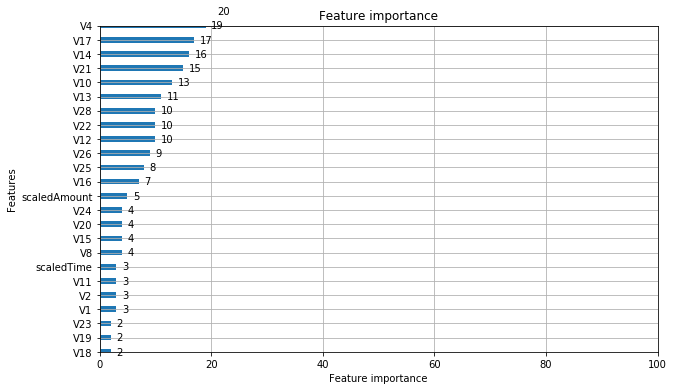

In [86]:
ax = lgb.plot_importance(gbm, height = 0.4, 
                         max_num_features = 25, 
                         xlim = (0,100), ylim = (0,23), 
                         figsize = (10,6))
plt.show()

In [87]:
gbm.best_iteration_, gbm.best_score_

(7,
 defaultdict(dict,
             {'valid_0': {'auc': 0.9410228753033087,
               'binary_logloss': 0.12453329048415222}}))

In [88]:
lgb_pred_best = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
lgb_pred_proba_best = gbm.predict_proba(X_test, num_iteration=gbm.best_iteration_)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [89]:
lgb_bestfn, lgb_bestfp, lgb_bestfpr, lgb_besttpr, lgb_bestppv, lgb_bestf1, lgb_bestauc = metrics_calc(y_test, lgb_pred_best, lgb_pred_proba_best)

print('False Positive (incorrectly predicted as fraud) =     ',lgb_bestfp)
print('False Negative (incorrectly predicted as normal) =     ',lgb_bestfn)
print('Precision =     {:.3f}'.format(lgb_bestppv))
print('Recall (TPR) =  {:.3f}'.format(lgb_besttpr))
print('Fallout (FPR) = {:.3e}'.format(lgb_bestfpr))
print('F1 = {:.3e}'.format(lgb_bestf1))
print('AUC = {:.3e}'.format(lgb_bestauc))

False Positive (incorrectly predicted as fraud) =      7
False Negative (incorrectly predicted as normal) =      42
Precision =     0.951
Recall (TPR) =  0.763
Fallout (FPR) = 7.462e-05
F1 = 8.464e-01
AUC = 8.302e-01


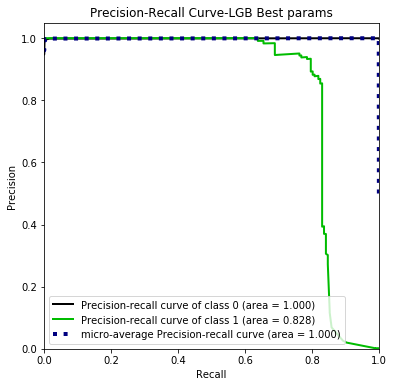

In [90]:
import scikitplot as skplt
skplt.metrics.plot_precision_recall(y_test, lgb_pred_proba_best, title='Precision-Recall Curve-LGB Best params', figsize=(6,6))
print()

### Observation

There were total of 93987 transactions in test dataset. This included 93810 non fraud and 177 fraud.
- True Positive(TP) : Out of 93810 normal txns, 93803 were correctly predicted as NORMAL
- False Negative (FN) : Out of 93810 normal txns, 7 were incorrectly predicted as FRAUD. 
- False Positive (FP) : Out of 177 fraudulent txns, 42 were incorrectly predicted as NORMAL
- True Negative (TN) : Out of 177 fraudulent txns, 135 were correctly predicted as FRAUD. 

### This performed worse than default LGBM

## 6.1) Lets normalize the data and redo lightgbm classification

In [91]:
len(y_train[y_train == 1]), len(y_train[y_train == 0]), len(y_train[y_train == 1])/len(y_train), len(y_train[y_train == 0])/len(y_train)

(315, 190505, 0.0016507703595011005, 0.9983492296404989)

In [92]:
estimator = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', 
                        n_estimators = 100, num_leaves = 38)


param_grid = {
    'n_estimators': [x for x in range(100, 1000, 100)],
    'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2, 0.01]}
gridsearch = GridSearchCV(estimator, param_grid)

gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        eval_metric = ['auc', 'binary_logloss'],
        early_stopping_rounds = 50,
        verbose=100)

Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975442	valid_0's binary_logloss: 0.00364352
Did not meet early stopping. Best iteration is:
[96]	valid_0's auc: 0.976241	valid_0's binary_logloss: 0.0035438


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975444	valid_0's binary_logloss: 0.00361313
Did not meet early stopping. Best iteration is:
[83]	valid_0's auc: 0.976876	valid_0's binary_logloss: 0.00330387


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.945745	valid_0's binary_logloss: 0.00377665
Did not meet early stopping. Best iteration is:
[98]	valid_0's auc: 0.94597	valid_0's binary_logloss: 0.00372108


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975442	valid_0's binary_logloss: 0.00364352
Early stopping, best iteration is:
[79]	valid_0's auc: 0.973672	valid_0's binary_logloss: 0.00329472


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975444	valid_0's binary_logloss: 0.00361313
Early stopping, best iteration is:
[78]	valid_0's auc: 0.976285	valid_0's binary_logloss: 0.00327614


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.945745	valid_0's binary_logloss: 0.00377665
Early stopping, best iteration is:
[75]	valid_0's auc: 0.925955	valid_0's binary_logloss: 0.00331356


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975442	valid_0's binary_logloss: 0.00364352
Early stopping, best iteration is:
[79]	valid_0's auc: 0.973672	valid_0's binary_logloss: 0.00329472


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975444	valid_0's binary_logloss: 0.00361313
Early stopping, best iteration is:
[78]	valid_0's auc: 0.976285	valid_0's binary_logloss: 0.00327614


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.945745	valid_0's binary_logloss: 0.00377665
Early stopping, best iteration is:
[75]	valid_0's auc: 0.925955	valid_0's binary_logloss: 0.00331356


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975442	valid_0's binary_logloss: 0.00364352
Early stopping, best iteration is:
[79]	valid_0's auc: 0.973672	valid_0's binary_logloss: 0.00329472


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975444	valid_0's binary_logloss: 0.00361313
Early stopping, best iteration is:
[78]	valid_0's auc: 0.976285	valid_0's binary_logloss: 0.00327614


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.945745	valid_0's binary_logloss: 0.00377665
Early stopping, best iteration is:
[75]	valid_0's auc: 0.925955	valid_0's binary_logloss: 0.00331356


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975442	valid_0's binary_logloss: 0.00364352
Early stopping, best iteration is:
[79]	valid_0's auc: 0.973672	valid_0's binary_logloss: 0.00329472


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975444	valid_0's binary_logloss: 0.00361313
Early stopping, best iteration is:
[78]	valid_0's auc: 0.976285	valid_0's binary_logloss: 0.00327614


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.945745	valid_0's binary_logloss: 0.00377665
Early stopping, best iteration is:
[75]	valid_0's auc: 0.925955	valid_0's binary_logloss: 0.00331356


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975442	valid_0's binary_logloss: 0.00364352
Early stopping, best iteration is:
[79]	valid_0's auc: 0.973672	valid_0's binary_logloss: 0.00329472


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975444	valid_0's binary_logloss: 0.00361313
Early stopping, best iteration is:
[78]	valid_0's auc: 0.976285	valid_0's binary_logloss: 0.00327614


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.945745	valid_0's binary_logloss: 0.00377665
Early stopping, best iteration is:
[75]	valid_0's auc: 0.925955	valid_0's binary_logloss: 0.00331356


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975442	valid_0's binary_logloss: 0.00364352
Early stopping, best iteration is:
[79]	valid_0's auc: 0.973672	valid_0's binary_logloss: 0.00329472


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975444	valid_0's binary_logloss: 0.00361313
Early stopping, best iteration is:
[78]	valid_0's auc: 0.976285	valid_0's binary_logloss: 0.00327614


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.945745	valid_0's binary_logloss: 0.00377665
Early stopping, best iteration is:
[75]	valid_0's auc: 0.925955	valid_0's binary_logloss: 0.00331356


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975442	valid_0's binary_logloss: 0.00364352
Early stopping, best iteration is:
[79]	valid_0's auc: 0.973672	valid_0's binary_logloss: 0.00329472


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975444	valid_0's binary_logloss: 0.00361313
Early stopping, best iteration is:
[78]	valid_0's auc: 0.976285	valid_0's binary_logloss: 0.00327614


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.945745	valid_0's binary_logloss: 0.00377665
Early stopping, best iteration is:
[75]	valid_0's auc: 0.925955	valid_0's binary_logloss: 0.00331356


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975442	valid_0's binary_logloss: 0.00364352
Early stopping, best iteration is:
[79]	valid_0's auc: 0.973672	valid_0's binary_logloss: 0.00329472


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975444	valid_0's binary_logloss: 0.00361313
Early stopping, best iteration is:
[78]	valid_0's auc: 0.976285	valid_0's binary_logloss: 0.00327614


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.945745	valid_0's binary_logloss: 0.00377665
Early stopping, best iteration is:
[75]	valid_0's auc: 0.925955	valid_0's binary_logloss: 0.00331356


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.980264	valid_0's binary_logloss: 0.00428936
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.980269	valid_0's binary_logloss: 0.00425932


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974823	valid_0's binary_logloss: 0.00410048
Did not meet early stopping. Best iteration is:
[100]	valid_0's auc: 0.974823	valid_0's binary_logloss: 0.00410048


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.960178	valid_0's binary_logloss: 0.00446042
Did not meet early stopping. Best iteration is:
[98]	valid_0's auc: 0.960811	valid_0's binary_logloss: 0.0043794


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.980264	valid_0's binary_logloss: 0.00428936
Early stopping, best iteration is:
[61]	valid_0's auc: 0.956092	valid_0's binary_logloss: 0.00335643


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974823	valid_0's binary_logloss: 0.00410048
Early stopping, best iteration is:
[62]	valid_0's auc: 0.968448	valid_0's binary_logloss: 0.00324337


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.960178	valid_0's binary_logloss: 0.00446042
Early stopping, best iteration is:
[61]	valid_0's auc: 0.926536	valid_0's binary_logloss: 0.00328585


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.980264	valid_0's binary_logloss: 0.00428936
Early stopping, best iteration is:
[61]	valid_0's auc: 0.956092	valid_0's binary_logloss: 0.00335643


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974823	valid_0's binary_logloss: 0.00410048
Early stopping, best iteration is:
[62]	valid_0's auc: 0.968448	valid_0's binary_logloss: 0.00324337


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.960178	valid_0's binary_logloss: 0.00446042
Early stopping, best iteration is:
[61]	valid_0's auc: 0.926536	valid_0's binary_logloss: 0.00328585


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.980264	valid_0's binary_logloss: 0.00428936
Early stopping, best iteration is:
[61]	valid_0's auc: 0.956092	valid_0's binary_logloss: 0.00335643


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974823	valid_0's binary_logloss: 0.00410048
Early stopping, best iteration is:
[62]	valid_0's auc: 0.968448	valid_0's binary_logloss: 0.00324337


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.960178	valid_0's binary_logloss: 0.00446042
Early stopping, best iteration is:
[61]	valid_0's auc: 0.926536	valid_0's binary_logloss: 0.00328585


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.980264	valid_0's binary_logloss: 0.00428936
Early stopping, best iteration is:
[61]	valid_0's auc: 0.956092	valid_0's binary_logloss: 0.00335643


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974823	valid_0's binary_logloss: 0.00410048
Early stopping, best iteration is:
[62]	valid_0's auc: 0.968448	valid_0's binary_logloss: 0.00324337


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.960178	valid_0's binary_logloss: 0.00446042
Early stopping, best iteration is:
[61]	valid_0's auc: 0.926536	valid_0's binary_logloss: 0.00328585


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.980264	valid_0's binary_logloss: 0.00428936
Early stopping, best iteration is:
[61]	valid_0's auc: 0.956092	valid_0's binary_logloss: 0.00335643


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974823	valid_0's binary_logloss: 0.00410048
Early stopping, best iteration is:
[62]	valid_0's auc: 0.968448	valid_0's binary_logloss: 0.00324337


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.960178	valid_0's binary_logloss: 0.00446042
Early stopping, best iteration is:
[61]	valid_0's auc: 0.926536	valid_0's binary_logloss: 0.00328585


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.980264	valid_0's binary_logloss: 0.00428936
Early stopping, best iteration is:
[61]	valid_0's auc: 0.956092	valid_0's binary_logloss: 0.00335643


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974823	valid_0's binary_logloss: 0.00410048
Early stopping, best iteration is:
[62]	valid_0's auc: 0.968448	valid_0's binary_logloss: 0.00324337


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.960178	valid_0's binary_logloss: 0.00446042
Early stopping, best iteration is:
[61]	valid_0's auc: 0.926536	valid_0's binary_logloss: 0.00328585


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.980264	valid_0's binary_logloss: 0.00428936
Early stopping, best iteration is:
[61]	valid_0's auc: 0.956092	valid_0's binary_logloss: 0.00335643


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974823	valid_0's binary_logloss: 0.00410048
Early stopping, best iteration is:
[62]	valid_0's auc: 0.968448	valid_0's binary_logloss: 0.00324337


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.960178	valid_0's binary_logloss: 0.00446042
Early stopping, best iteration is:
[61]	valid_0's auc: 0.926536	valid_0's binary_logloss: 0.00328585


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.980264	valid_0's binary_logloss: 0.00428936
Early stopping, best iteration is:
[61]	valid_0's auc: 0.956092	valid_0's binary_logloss: 0.00335643


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.974823	valid_0's binary_logloss: 0.00410048
Early stopping, best iteration is:
[62]	valid_0's auc: 0.968448	valid_0's binary_logloss: 0.00324337


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.960178	valid_0's binary_logloss: 0.00446042
Early stopping, best iteration is:
[61]	valid_0's auc: 0.926536	valid_0's binary_logloss: 0.00328585


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975609	valid_0's binary_logloss: 0.00504149
Did not meet early stopping. Best iteration is:
[97]	valid_0's auc: 0.97693	valid_0's binary_logloss: 0.00489768


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97212	valid_0's binary_logloss: 0.00483373
Did not meet early stopping. Best iteration is:
[72]	valid_0's auc: 0.976762	valid_0's binary_logloss: 0.0038084


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.96837	valid_0's binary_logloss: 0.00514963
Did not meet early stopping. Best iteration is:
[99]	valid_0's auc: 0.969411	valid_0's binary_logloss: 0.00509974


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975609	valid_0's binary_logloss: 0.00504149
Early stopping, best iteration is:
[52]	valid_0's auc: 0.943899	valid_0's binary_logloss: 0.0034349


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97212	valid_0's binary_logloss: 0.00483373
Early stopping, best iteration is:
[51]	valid_0's auc: 0.965002	valid_0's binary_logloss: 0.00328426


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.96837	valid_0's binary_logloss: 0.00514963
Early stopping, best iteration is:
[50]	valid_0's auc: 0.925166	valid_0's binary_logloss: 0.0032534


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975609	valid_0's binary_logloss: 0.00504149
Early stopping, best iteration is:
[52]	valid_0's auc: 0.943899	valid_0's binary_logloss: 0.0034349


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97212	valid_0's binary_logloss: 0.00483373
Early stopping, best iteration is:
[51]	valid_0's auc: 0.965002	valid_0's binary_logloss: 0.00328426


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.96837	valid_0's binary_logloss: 0.00514963
Early stopping, best iteration is:
[50]	valid_0's auc: 0.925166	valid_0's binary_logloss: 0.0032534


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975609	valid_0's binary_logloss: 0.00504149
Early stopping, best iteration is:
[52]	valid_0's auc: 0.943899	valid_0's binary_logloss: 0.0034349


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97212	valid_0's binary_logloss: 0.00483373
Early stopping, best iteration is:
[51]	valid_0's auc: 0.965002	valid_0's binary_logloss: 0.00328426


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.96837	valid_0's binary_logloss: 0.00514963
Early stopping, best iteration is:
[50]	valid_0's auc: 0.925166	valid_0's binary_logloss: 0.0032534


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975609	valid_0's binary_logloss: 0.00504149
Early stopping, best iteration is:
[52]	valid_0's auc: 0.943899	valid_0's binary_logloss: 0.0034349


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97212	valid_0's binary_logloss: 0.00483373
Early stopping, best iteration is:
[51]	valid_0's auc: 0.965002	valid_0's binary_logloss: 0.00328426


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.96837	valid_0's binary_logloss: 0.00514963
Early stopping, best iteration is:
[50]	valid_0's auc: 0.925166	valid_0's binary_logloss: 0.0032534


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975609	valid_0's binary_logloss: 0.00504149
Early stopping, best iteration is:
[52]	valid_0's auc: 0.943899	valid_0's binary_logloss: 0.0034349


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97212	valid_0's binary_logloss: 0.00483373
Early stopping, best iteration is:
[51]	valid_0's auc: 0.965002	valid_0's binary_logloss: 0.00328426


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.96837	valid_0's binary_logloss: 0.00514963
Early stopping, best iteration is:
[50]	valid_0's auc: 0.925166	valid_0's binary_logloss: 0.0032534


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975609	valid_0's binary_logloss: 0.00504149
Early stopping, best iteration is:
[52]	valid_0's auc: 0.943899	valid_0's binary_logloss: 0.0034349


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97212	valid_0's binary_logloss: 0.00483373
Early stopping, best iteration is:
[51]	valid_0's auc: 0.965002	valid_0's binary_logloss: 0.00328426


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.96837	valid_0's binary_logloss: 0.00514963
Early stopping, best iteration is:
[50]	valid_0's auc: 0.925166	valid_0's binary_logloss: 0.0032534


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975609	valid_0's binary_logloss: 0.00504149
Early stopping, best iteration is:
[52]	valid_0's auc: 0.943899	valid_0's binary_logloss: 0.0034349


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97212	valid_0's binary_logloss: 0.00483373
Early stopping, best iteration is:
[51]	valid_0's auc: 0.965002	valid_0's binary_logloss: 0.00328426


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.96837	valid_0's binary_logloss: 0.00514963
Early stopping, best iteration is:
[50]	valid_0's auc: 0.925166	valid_0's binary_logloss: 0.0032534


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.975609	valid_0's binary_logloss: 0.00504149
Early stopping, best iteration is:
[52]	valid_0's auc: 0.943899	valid_0's binary_logloss: 0.0034349


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.97212	valid_0's binary_logloss: 0.00483373
Early stopping, best iteration is:
[51]	valid_0's auc: 0.965002	valid_0's binary_logloss: 0.00328426


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.96837	valid_0's binary_logloss: 0.00514963
Early stopping, best iteration is:
[50]	valid_0's auc: 0.925166	valid_0's binary_logloss: 0.0032534


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.965262	valid_0's binary_logloss: 0.00338914


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.961647	valid_0's binary_logloss: 0.00324193


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955331	valid_0's binary_logloss: 0.00326697


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.965262	valid_0's binary_logloss: 0.00338914


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.961647	valid_0's binary_logloss: 0.00324193


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955331	valid_0's binary_logloss: 0.00326697


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.965262	valid_0's binary_logloss: 0.00338914


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.961647	valid_0's binary_logloss: 0.00324193


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955331	valid_0's binary_logloss: 0.00326697


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.965262	valid_0's binary_logloss: 0.00338914


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.961647	valid_0's binary_logloss: 0.00324193


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955331	valid_0's binary_logloss: 0.00326697


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.965262	valid_0's binary_logloss: 0.00338914


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.961647	valid_0's binary_logloss: 0.00324193


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955331	valid_0's binary_logloss: 0.00326697


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.965262	valid_0's binary_logloss: 0.00338914


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.961647	valid_0's binary_logloss: 0.00324193


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955331	valid_0's binary_logloss: 0.00326697


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.965262	valid_0's binary_logloss: 0.00338914


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.961647	valid_0's binary_logloss: 0.00324193


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955331	valid_0's binary_logloss: 0.00326697


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.965262	valid_0's binary_logloss: 0.00338914


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.961647	valid_0's binary_logloss: 0.00324193


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955331	valid_0's binary_logloss: 0.00326697


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.965262	valid_0's binary_logloss: 0.00338914


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[45]	valid_0's auc: 0.961647	valid_0's binary_logloss: 0.00324193


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[42]	valid_0's auc: 0.955331	valid_0's binary_logloss: 0.00326697


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[39]	valid_0's auc: 0.964464	valid_0's binary_logloss: 0.00340853


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.957456	valid_0's binary_logloss: 0.00327023


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.937362	valid_0's binary_logloss: 0.00338444


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[39]	valid_0's auc: 0.964464	valid_0's binary_logloss: 0.00340853


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.957456	valid_0's binary_logloss: 0.00327023


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.937362	valid_0's binary_logloss: 0.00338444


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[39]	valid_0's auc: 0.964464	valid_0's binary_logloss: 0.00340853


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.957456	valid_0's binary_logloss: 0.00327023


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.937362	valid_0's binary_logloss: 0.00338444


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[39]	valid_0's auc: 0.964464	valid_0's binary_logloss: 0.00340853


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.957456	valid_0's binary_logloss: 0.00327023


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.937362	valid_0's binary_logloss: 0.00338444


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[39]	valid_0's auc: 0.964464	valid_0's binary_logloss: 0.00340853


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.957456	valid_0's binary_logloss: 0.00327023


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.937362	valid_0's binary_logloss: 0.00338444


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[39]	valid_0's auc: 0.964464	valid_0's binary_logloss: 0.00340853


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.957456	valid_0's binary_logloss: 0.00327023


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.937362	valid_0's binary_logloss: 0.00338444


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[39]	valid_0's auc: 0.964464	valid_0's binary_logloss: 0.00340853


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.957456	valid_0's binary_logloss: 0.00327023


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.937362	valid_0's binary_logloss: 0.00338444


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[39]	valid_0's auc: 0.964464	valid_0's binary_logloss: 0.00340853


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.957456	valid_0's binary_logloss: 0.00327023


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.937362	valid_0's binary_logloss: 0.00338444


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[39]	valid_0's auc: 0.964464	valid_0's binary_logloss: 0.00340853


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.957456	valid_0's binary_logloss: 0.00327023


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[38]	valid_0's auc: 0.937362	valid_0's binary_logloss: 0.00338444


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.920075	valid_0's binary_logloss: 0.203866
Did not meet early stopping. Best iteration is:
[51]	valid_0's auc: 0.920954	valid_0's binary_logloss: 0.357056


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.918857	valid_0's binary_logloss: 0.428888


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[32]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.450951


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.920075	valid_0's binary_logloss: 0.203866
Early stopping, best iteration is:
[51]	valid_0's auc: 0.920954	valid_0's binary_logloss: 0.357056


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.918857	valid_0's binary_logloss: 0.428888


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[32]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.450951


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.920075	valid_0's binary_logloss: 0.203866
Early stopping, best iteration is:
[51]	valid_0's auc: 0.920954	valid_0's binary_logloss: 0.357056


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.918857	valid_0's binary_logloss: 0.428888


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[32]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.450951


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.920075	valid_0's binary_logloss: 0.203866
Early stopping, best iteration is:
[51]	valid_0's auc: 0.920954	valid_0's binary_logloss: 0.357056


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.918857	valid_0's binary_logloss: 0.428888


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[32]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.450951


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.920075	valid_0's binary_logloss: 0.203866
Early stopping, best iteration is:
[51]	valid_0's auc: 0.920954	valid_0's binary_logloss: 0.357056


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.918857	valid_0's binary_logloss: 0.428888


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[32]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.450951


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.920075	valid_0's binary_logloss: 0.203866
Early stopping, best iteration is:
[51]	valid_0's auc: 0.920954	valid_0's binary_logloss: 0.357056


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.918857	valid_0's binary_logloss: 0.428888


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[32]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.450951


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.920075	valid_0's binary_logloss: 0.203866
Early stopping, best iteration is:
[51]	valid_0's auc: 0.920954	valid_0's binary_logloss: 0.357056


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.918857	valid_0's binary_logloss: 0.428888


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[32]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.450951


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.920075	valid_0's binary_logloss: 0.203866
Early stopping, best iteration is:
[51]	valid_0's auc: 0.920954	valid_0's binary_logloss: 0.357056


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.918857	valid_0's binary_logloss: 0.428888


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[32]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.450951


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.920075	valid_0's binary_logloss: 0.203866
Early stopping, best iteration is:
[51]	valid_0's auc: 0.920954	valid_0's binary_logloss: 0.357056


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[36]	valid_0's auc: 0.918857	valid_0's binary_logloss: 0.428888


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[32]	valid_0's auc: 0.911704	valid_0's binary_logloss: 0.450951


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Training until validation scores don't improve for 50 rounds.
[100]	valid_0's auc: 0.971318	valid_0's binary_logloss: 0.00446622
Did not meet early stopping. Best iteration is:
[64]	valid_0's auc: 0.977237	valid_0's binary_logloss: 0.00335613


GridSearchCV(cv=None, error_score='raise',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.125, max_depth=-1, metric='l1',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=38, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900], 'learning_rate': [0.1, 0.125, 0.15, 0.175, 0.2, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [94]:
print('Best parameters found by grid search are:', gridsearch.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.15, 'n_estimators': 100}


In [95]:
gbm = lgb.LGBMClassifier(learning_rate = 0.15, metric = 'l1', 
                        n_estimators = 100)


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
        early_stopping_rounds=50, 
        verbose=100)

Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[48]	valid_0's auc: 0.978382	valid_0's binary_logloss: 0.0032891


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.15, max_depth=-1, metric='l1',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1)

In [96]:
gbm = lgb.LGBMClassifier(learning_rate = 0.15, metric = 'l1', 
                        n_estimators = 100, cv=10)


gbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
        early_stopping_rounds=50, 
        verbose=100)

Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[48]	valid_0's auc: 0.978382	valid_0's binary_logloss: 0.0032891


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        cv=10, learning_rate=0.15, max_depth=-1, metric='l1',
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=1)

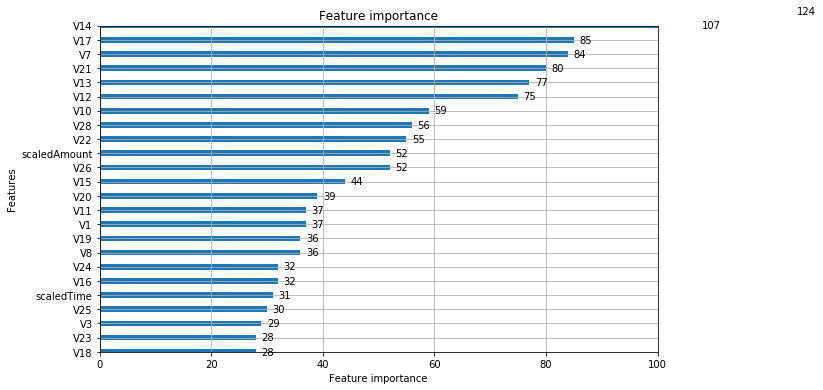

In [97]:
ax = lgb.plot_importance(gbm, height = 0.4, 
                         max_num_features = 25, 
                         xlim = (0,100), ylim = (0,23), 
                         figsize = (10,6))
plt.show()


In [98]:
gbm.best_iteration_, gbm.best_score_

(48,
 defaultdict(dict,
             {'valid_0': {'auc': 0.9783816850624263,
               'binary_logloss': 0.0032891043680774194}}))

In [99]:
lgb_pred_best_norm = gbm.predict(X_test, num_iteration=gbm.best_iteration_)
lgb_pred_proba_best_norm = gbm.predict_proba(X_test, num_iteration=gbm.best_iteration_)

D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [101]:
lgb_bestfn_n, lgb_bestfp_n, lgb_bestfpr_n, lgb_besttpr_n, lgb_bestppv_n, lgb_bestf1_n, lgb_bestauc_n = metrics_calc(y_test, lgb_pred_best_norm, lgb_pred_proba_best_norm)

print('False Positive (incorrectly predicted as fraud) =     ',lgb_bestfp_n)
print('False Negative (incorrectly predicted as normal) =     ',lgb_bestfn_n)
print('Precision =     {:.3f}'.format(lgb_bestppv_n))
print('Recall (TPR) =  {:.3f}'.format(lgb_besttpr_n))
print('Fallout (FPR) = {:.3e}'.format(lgb_bestfpr_n))
print('F1 = {:.3e}'.format(lgb_bestf1_n))
print('AUC = {:.3e}'.format(lgb_bestauc_n))

False Positive (incorrectly predicted as fraud) =      6
False Negative (incorrectly predicted as normal) =      41
Precision =     0.958
Recall (TPR) =  0.768
Fallout (FPR) = 6.396e-05
F1 = 8.527e-01
AUC = 8.303e-01


D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


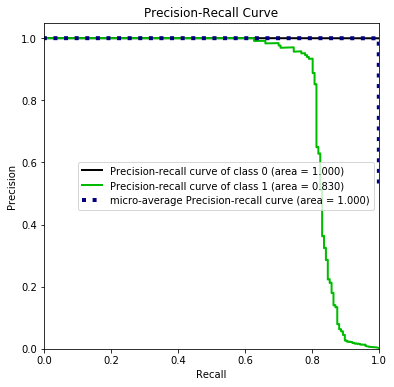

In [102]:
skplt.metrics.plot_precision_recall_curve(y_test, lgb_pred_proba_best_norm, figsize=(6,6))

### Observation

There were total of 93987 transactions in test dataset. This included 93810 non fraud and 177 fraud.
- True Positive(TP) : Out of 93810 normal txns, 93804 were correctly predicted as NORMAL
- False Negative (FN) : Out of 93810 normal txns, 6 were incorrectly predicted as FRAUD. 
- False Positive (FP) : Out of 177 fraudulent txns, 41 were incorrectly predicted as NORMAL
- True Negative (TN) : Out of 177 fraudulent txns, 136 were correctly predicted as FRAUD. 

### Default LGBM Observation

- True Positive(TP) : Out of 93810 normal txns, 93808 were correctly predicted as NORMAL
- False Negative (FN) : Out of 93810 normal txns, 2 were incorrectly predicted as FRAUD. 
- False Positive (FP) : Out of 177 fraudulent txns, 36 were incorrectly predicted as NORMAL
- True Negative (TN) : Out of 177 fraudulent txns, 141 were correctly predicted as FRAUD. 

## 6.2) Training and testing with only important features

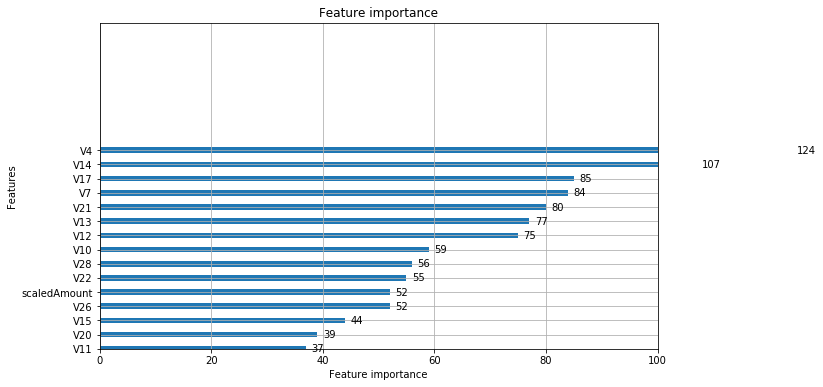

In [103]:
ax = lgb.plot_importance(gbm, height = 0.4, 
                         max_num_features = 15, 
                         xlim = (0,100), ylim = (0,23), 
                         figsize = (10,6))
plt.show()

In [104]:
len(y_train[y_train == 1]), len(y_train[y_train == 0]), len(y_train[y_train == 1])/len(y_train), len(y_train[y_train == 0])/len(y_train)

(315, 190505, 0.0016507703595011005, 0.9983492296404989)

In [105]:
len(y_test[y_test == 1]), len(y_test[y_test == 0]), len(y_test[y_test == 1])/len(y_test), len(y_test[y_test == 0])/len(y_test)

(177, 93810, 0.0018832391713747645, 0.9981167608286252)

In [106]:
dtrain = lgb.Dataset(X_train, free_raw_data=False, silent=True)
dtrain.data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaledAmount,scaledTime
169732,-0.567132,-0.669996,1.164250,-2.968871,0.194556,0.510334,-0.449416,0.196711,-2.455120,0.741254,...,-0.148581,-0.182487,-0.392192,-0.313288,0.690779,-0.032522,0.025178,0.046990,-0.261273,0.526830
127069,-0.764436,0.717186,2.443593,0.016619,-0.331366,0.151521,0.068152,0.258777,0.341374,-0.605521,...,-0.122123,-0.103916,-0.317191,-0.111452,0.300101,0.400727,0.297727,0.131455,-0.334119,-0.349874
113816,-1.830576,2.051043,1.299459,1.831527,-0.159674,1.258258,-1.072447,-2.574357,-0.656993,0.089990,...,3.214754,-0.452761,0.078672,-0.436112,0.106623,0.152219,0.213251,0.061309,-0.289380,-0.454764
270344,2.082792,-0.991640,-1.127478,-0.670212,-0.447162,0.188657,-0.790566,0.068130,-0.333943,1.013908,...,-0.344494,-0.535665,0.217781,0.078550,-0.329599,0.542222,-0.050758,-0.055737,-0.173316,1.457590
34852,-0.421338,1.126016,0.974157,-0.209536,0.434854,-0.506608,0.848719,-0.185602,0.129109,0.031669,...,-0.411928,-0.908623,-0.136704,-0.546157,-0.053024,0.103764,0.186090,-0.077120,-0.313289,-1.199456


In [107]:
lgb_params = {
        'objective': 'binary',
        'boosting_type': 'rf',
        'subsample': 0.623,
        'colsample_bytree': 0.7,
        'num_leaves': 127,
        'max_depth': 8,
        'seed': None,
        'bagging_freq': 1,
        'n_jobs': 4
    }
# Fit the model
lgbrf_clf = lgb.train(params=lgb_params, train_set=dtrain, num_boost_round=200)

lgbrf_pred = lgbrf_clf.predict(X_test)

In [108]:
# Get feature importances
feat_impt = pd.DataFrame()
feat_impt["feature"] = X_train.columns.tolist()
feat_impt["importance_gain"] = lgbrf_clf.feature_importance(importance_type='gain')
feat_impt["importance_split"] = lgbrf_clf.feature_importance(importance_type='split')
feat_impt['roc_auc_score'] = roc_auc_score(y_test, lgbrf_pred)
feat_impt['prec_score'] = average_precision_score(y_test, lgbrf_pred)

feat_impt

,feature,importance_gain,importance_split,roc_auc_score,prec_score
0,V1,0.0,0,0.5,0.001883
1,V2,0.0,0,0.5,0.001883
2,V3,0.0,0,0.5,0.001883
3,V4,0.0,0,0.5,0.001883
4,V5,0.0,0,0.5,0.001883
5,V6,0.0,0,0.5,0.001883
6,V7,0.0,0,0.5,0.001883
7,V8,0.0,0,0.5,0.001883
8,V9,0.0,0,0.5,0.001883
9,V10,0.0,0,0.5,0.001883


In [109]:
# Fit LightGBM in RF mode
lgb_params = {
        'learning_rate': 0.15,
        'metric': 'l1', 
        'n_estimators': 100,
        'objective': 'binary',
        'boosting_type': 'rf',
        'subsample': 0.623,
        'colsample_bytree': 0.7,
        'num_leaves': 127,
        'max_depth': 8,
        'seed': None,
        'bagging_freq': 1,
        'n_jobs': 4
    }
lgbm = lgb.LGBMClassifier(**lgb_params)

# Fit the model
lgbrf_clf = lgbm.fit(X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric=['auc', 'binary_logloss'],
        early_stopping_rounds=50, 
        verbose=100)  

lgbrf_pred = lgbrf_clf.predict(X_test)
lgbrf_pred_proba = lgbrf_clf.predict_proba(X_test)


Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[2]	valid_0's auc: 0.926863	valid_0's binary_logloss: 0.128285


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [110]:
lgbrf_fn, lgbrf_fp, lgbrf_fpr, lgbrf_tpr, lgbrf_ppv, lgbrf_f1, lgbrf_auc = metrics_calc(y_test, lgbrf_pred, lgbrf_pred_proba)

print('False Positive (incorrectly predicted as fraud) =     ',lgbrf_fp)
print('False Negative (incorrectly predicted as normal) =     ',lgbrf_fn)
print('Precision =     {:.3f}'.format(lgbrf_ppv))
print('Recall (TPR) =  {:.3f}'.format(lgbrf_tpr))
print('Fallout (FPR) = {:.3e}'.format(lgbrf_fpr))
print('F1 = {:.3e}'.format(lgbrf_f1))
print('AUC = {:.3e}'.format(lgbrf_auc))

False Positive (incorrectly predicted as fraud) =      13
False Negative (incorrectly predicted as normal) =      45
Precision =     0.910
Recall (TPR) =  0.746
Fallout (FPR) = 1.386e-04
F1 = 8.199e-01
AUC = 8.199e-01


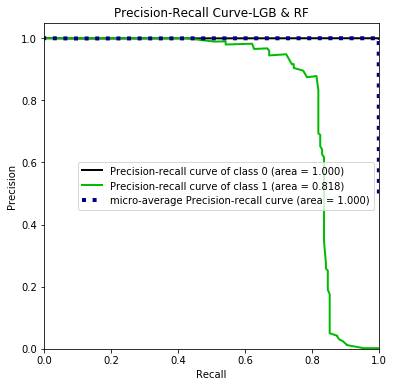

In [111]:
skplt.metrics.plot_precision_recall(y_test, lgbrf_pred_proba, title='Precision-Recall Curve-LGB & RF', figsize=(6,6))

D:\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=DeprecationWarning)


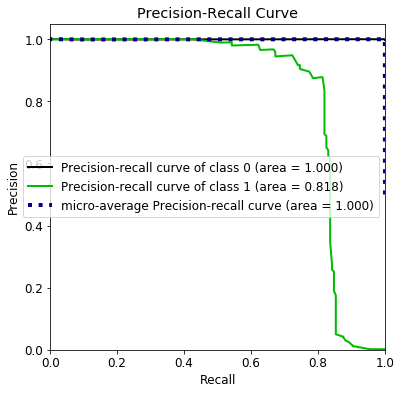

In [341]:
skplt.metrics.plot_precision_recall_curve(y_test, lgbrf_pred_proba, figsize=(6,6))

### Observation

There were total of 93987 transactions in test dataset. This included 93810 non fraud and 177 fraud.
- True Positive(TP) : Out of 93810 normal txns, 93797 were correctly predicted as NORMAL
- False Negative (FN) : Out of 93810 normal txns, 13 were incorrectly predicted as FRAUD. 
- False Positive (FP) : Out of 177 fraudulent txns, 45 were incorrectly predicted as NORMAL
- True Negative (TN) : Out of 177 fraudulent txns, 132 were correctly predicted as FRAUD. 

### Not much improvement with RF & LGBM


# AdaBoost

In [116]:
rfcmodel = RandomForestClassifier(n_estimators=100, n_jobs=-1, oob_score=True, min_samples_leaf=5, max_features=0.5, 
                                 random_state=42)
adamodel = AdaBoostClassifier(base_estimator=rfcmodel, random_state=42, n_estimators=100)
adamodel.fit(X_train, y_train)
adamodel.score(X_test,y_test)

0.999521210380159

In [117]:
ada_pred = adamodel.predict(X_test)
ada_pred_proba = adamodel.predict_proba(X_test)

In [180]:
ada_fn, ada_fp, ada_fpr, ada_tpr, ada_ppv, ada_f1, ada_auc = metrics_calc(y_test, ada_pred, ada_pred_proba)

print('False Positive (incorrectly predicted as fraud) =     ',ada_fp)
print('False Negative (incorrectly predicted as normal) =     ',ada_fn)
print('Precision =     {:.3f}'.format(ada_ppv))
print('Recall (TPR) =  {:.3f}'.format(ada_tpr))
print('Fallout (FPR) = {:.3e}'.format(ada_fpr))
print('F1 = {:.3e}'.format(ada_f1))
print('AUC = {:.3e}'.format(ada_auc))


False Positive (incorrectly predicted as fraud) =      5
False Negative (incorrectly predicted as normal) =      40
Precision =     0.965
Recall (TPR) =  0.774
Fallout (FPR) = 5.330e-05
F1 = 8.589e-01
AUC = 8.440e-01


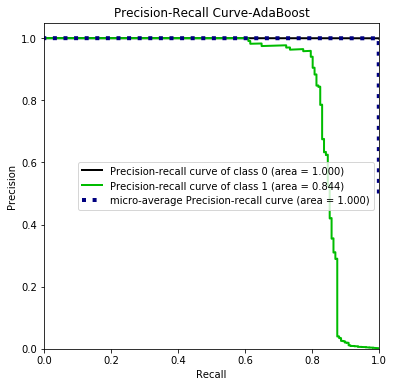

In [120]:
skplt.metrics.plot_precision_recall(y_test, ada_pred_proba, title='Precision-Recall Curve-AdaBoost', figsize=(6,6))

# Model Comparisons

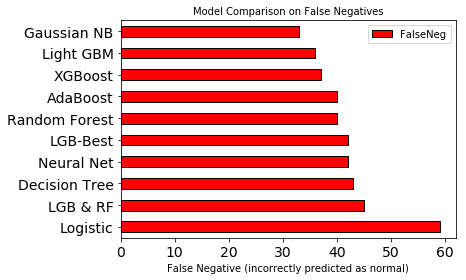

In [172]:
model_comparison = pd.DataFrame({'model': ['Logistic', 'Gaussian NB', 'Decision Tree',
                                           'Random Forest', 'Neural Net', 'XGBoost', 'Light GBM',
                                            'LGB-Best', 'LGB & RF', 'AdaBoost'],
                                 'FalseNeg': [log_fn, gauss_fn, dtree_fn, rf_fn, nn_fn, xgb_fn, lgb_fn, lgb_bestfn, lgbrf_fn, ada_fn]})

model_comparison.sort_values('FalseNeg', ascending = False).plot(x = 'model', y = 'FalseNeg', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('False Negative (incorrectly predicted as normal)'); plt.xticks(size = 14)
plt.title('Model Comparison on False Negatives', size = 10);

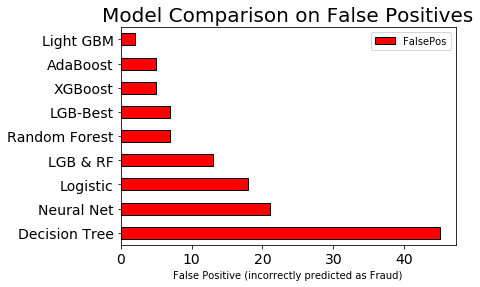

In [126]:
model_comparison = pd.DataFrame({'model': ['Logistic', 'Decision Tree',
                                           'Random Forest', 'Neural Net', 'XGBoost', 'Light GBM',
                                            'LGB-Best', 'LGB & RF', 'AdaBoost'],
                                 'FalsePos': [log_fp,  dtree_fp,  rf_fp,  nn_fp,  xgb_fp,  lgb_fp,  lgb_bestfp,  lgbrf_fp,  ada_fp]})

model_comparison.sort_values('FalsePos', ascending = False).plot(x = 'model', y = 'FalsePos', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('False Positive (incorrectly predicted as Fraud)'); plt.xticks(size = 14)
plt.title('Model Comparison on False Positives', size = 20);

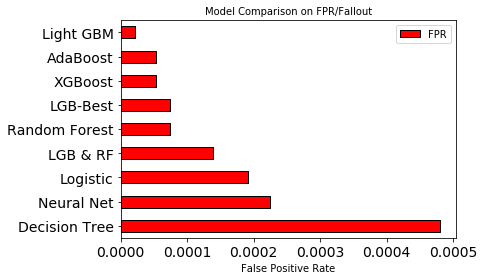

In [175]:
model_comparison = pd.DataFrame({'model': ['Logistic', 'Decision Tree',
                                           'Random Forest', 'Neural Net', 'XGBoost', 'Light GBM',
                                            'LGB-Best', 'LGB & RF', 'AdaBoost'],
                                 'FPR': [log_fpr, dtree_fpr,  rf_fpr,  nn_fpr,  xgb_fpr,  lgb_fpr,  lgb_bestfpr,  lgbrf_fpr,  ada_fpr]})

model_comparison.sort_values('FPR', ascending = False).plot(x = 'model', y = 'FPR', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('False Positive Rate'); plt.xticks(size = 14)
plt.title('Model Comparison on FPR/Fallout', size = 10);

### True Positive Rate/Recall/Sensitivity: 
When it's actually yes, how often does it predict yes?  T P / (T P + F N)  Recall score provides an effective means to evaluate model performance in the presence of class imbalance. Recall score is the metric in the selection of the best model when there is a high cost associated with False Negative. In our case, the consequences will be bad if a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative).

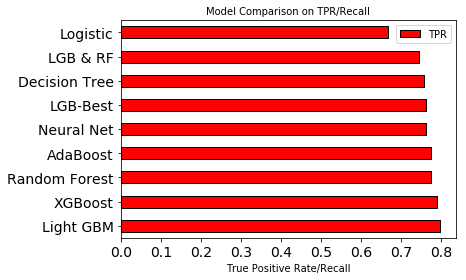

In [176]:
model_comparison = pd.DataFrame({'model': ['Logistic', 'Decision Tree',
                                           'Random Forest', 'Neural Net', 'XGBoost', 'Light GBM',
                                            'LGB-Best', 'LGB & RF', 'AdaBoost'],
                                 'TPR': [log_tpr,  dtree_tpr,  rf_tpr,  nn_tpr,  xgb_tpr,  lgb_tpr,  lgb_besttpr,  lgbrf_tpr,  ada_tpr]})

model_comparison.sort_values('TPR', ascending = False).plot(x = 'model', y = 'TPR', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('True Positive Rate/Recall'); plt.xticks(size = 14)
plt.title('Model Comparison on TPR/Recall', size = 10);

### Precision or positive predictive value (PPV): 
When it predicts yes, how often is it correct?  T P / (T P + F P)  

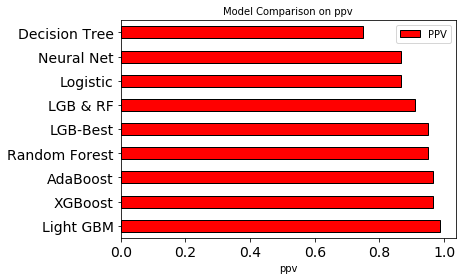

In [177]:
model_comparison = pd.DataFrame({'model': ['Logistic', 'Decision Tree',
                                           'Random Forest', 'Neural Net', 'XGBoost', 'Light GBM',
                                            'LGB-Best', 'LGB & RF', 'AdaBoost'],
                                 'PPV': [log_ppv,  dtree_ppv,  rf_ppv,  nn_ppv,  xgb_ppv,  lgb_ppv,  lgb_bestppv,  lgbrf_ppv,  ada_ppv]})

model_comparison.sort_values('PPV', ascending = False).plot(x = 'model', y = 'PPV', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('ppv'); plt.xticks(size = 14)
plt.title('Model Comparison on ppv', size = 10);

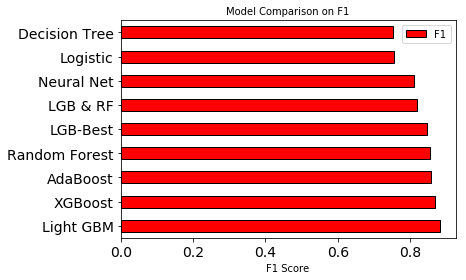

In [178]:
model_comparison = pd.DataFrame({'model': ['Logistic', 'Decision Tree',
                                           'Random Forest', 'Neural Net', 'XGBoost', 'Light GBM',
                                            'LGB-Best', 'LGB & RF', 'AdaBoost'],
                                 'F1': [log_f1,  dtree_f1,  rf_f1,  nn_f1,  xgb_f1,  lgb_f1,  lgb_bestf1,  lgbrf_f1,  ada_f1]})

model_comparison.sort_values('F1', ascending = False).plot(x = 'model', y = 'F1', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('F1 Score'); plt.xticks(size = 14)
plt.title('Model Comparison on F1', size = 10);

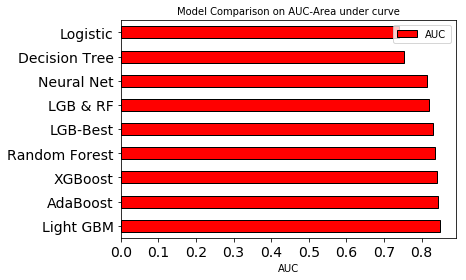

In [179]:
model_comparison = pd.DataFrame({'model': ['Logistic', 'Decision Tree',
                                           'Random Forest', 'Neural Net', 'XGBoost', 'Light GBM',
                                            'LGB-Best', 'LGB & RF', 'AdaBoost'],
                                 'AUC': [log_auc,  dtree_auc,  rf_auc,  nn_auc,  xgb_auc,  lgb_auc ,  lgb_bestauc,  lgbrf_auc ,  ada_auc ]})

model_comparison.sort_values('AUC', ascending = False).plot(x = 'model', y = 'AUC', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# Plot formatting
plt.ylabel(''); plt.yticks(size = 14); plt.xlabel('AUC'); plt.xticks(size = 14)
plt.title('Model Comparison on AUC-Area under curve', size = 10);

In [140]:
pl_list = ['log_predicted_prob', 'gauss_predicted_prob', 'dtree_predicted_prob', 'rf_predicted_prob', 
           'nn_predicted_prob', 'xgb_predicted_prob', 'lgb_pred_proba', 'lgb_pred_proba_best',
           'lgbrf_pred_proba', 'ada_pred_proba']

In [152]:
pl_dict = {"Logistic":log_predicted_prob, "Gaussian":gauss_predicted_prob, "Decision-Tree":dtree_predicted_prob,
           "Random Forest":rf_predicted_prob, "Neural Net":nn_predicted_prob, "XGBoost":xgb_predicted_prob,
           "Light GBM": lgb_pred_proba, "LGBM-Best":lgb_pred_proba_best, "LGBM & RF":lgbrf_pred_proba, "AdaBoost":ada_pred_proba}

In [156]:
pl_dict.values()

dict_values([array([[9.99922903e-01, 7.70970156e-05],
       [9.99829292e-01, 1.70708076e-04],
       [9.99967559e-01, 3.24413780e-05],
       ...,
       [9.99138363e-01, 8.61637254e-04],
       [9.99046607e-01, 9.53392884e-04],
       [9.99762531e-01, 2.37469225e-04]]), array([[1.00000000e+00, 2.25506355e-16],
       [1.00000000e+00, 1.19268155e-17],
       [1.00000000e+00, 3.68273970e-17],
       ...,
       [1.00000000e+00, 1.86100656e-17],
       [1.00000000e+00, 1.21161763e-17],
       [1.00000000e+00, 7.62458734e-16]]), array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]]), array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]]), array([[9.99997523e-01, 2.47670190e-06],
       [9.99999863e-01, 1.37354865e-07],
       [9.99991988e-01, 8.01212720e-06],
       ...,
       [9.99961408e-01, 3.85918006e-05],
       [9.99977945e-01, 2.20547341e-05],
       [9.99459338

In [169]:
plk, plv = zip(*pl_dict.items())

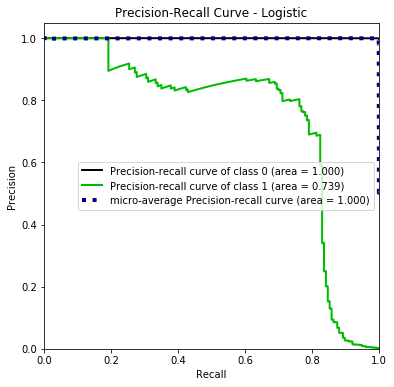

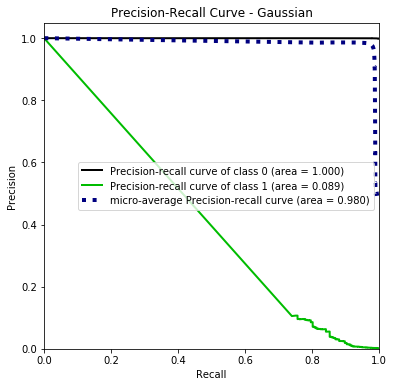

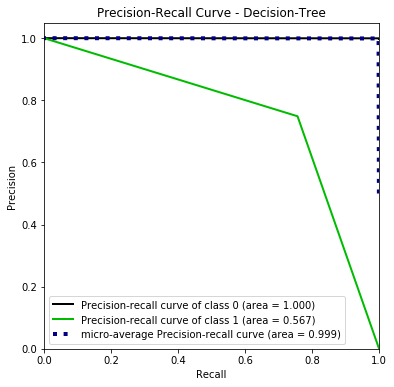

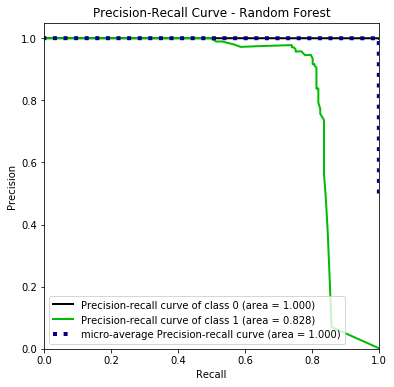

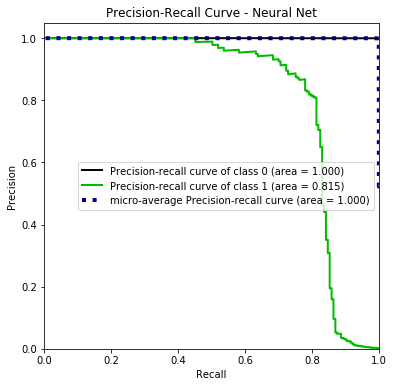

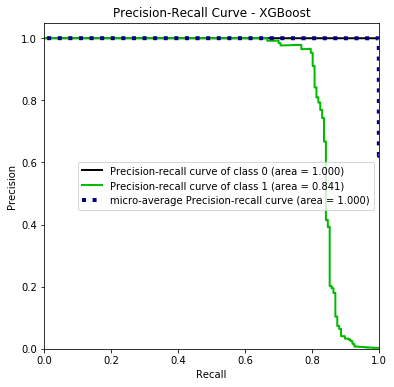

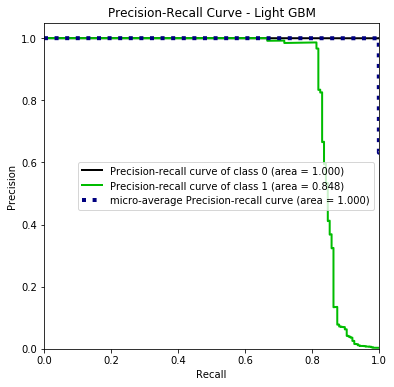

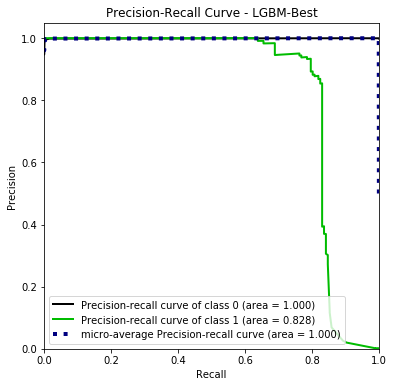

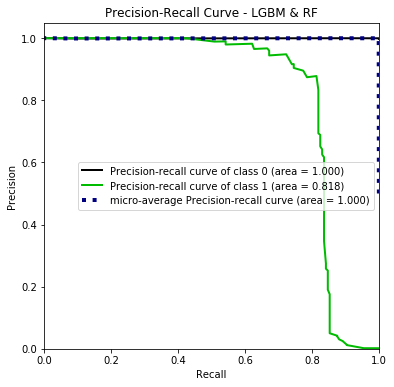

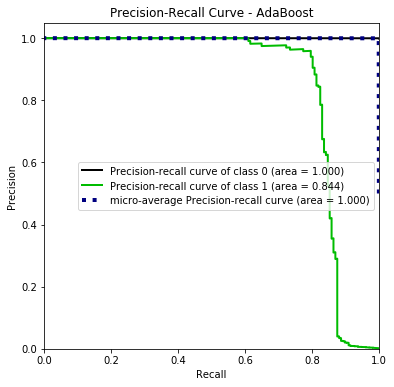

In [171]:
for i in range(len(plk)):
    skplt.metrics.plot_precision_recall(y_test, plv[i], title='Precision-Recall Curve - ' + str(plk[i]), figsize=(6,6))
    #print(plk[i])

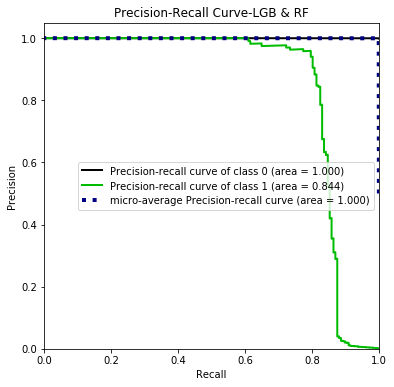

In [138]:
skplt.metrics.plot_precision_recall(y_test, ada_pred_proba, title='Precision-Recall Curve-LGB & RF', figsize=(6,6))